In [119]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 13 

In [2]:
energy = pd.read_excel('loads16_20.xlsx')

# DATA EXPLORATION

In [3]:
energy.set_index('date',inplace=True)

energy.index = pd.to_datetime(energy.index)

energy.head(10)

,Loads
date,
2016-01-01 01:00:00,24503.560
2016-01-01 02:00:00,23167.599
2016-01-01 03:00:00,22045.998
2016-01-01 04:00:00,20808.194
2016-01-01 05:00:00,19860.541
2016-01-01 06:00:00,19841.279
2016-01-01 07:00:00,20992.911
2016-01-01 08:00:00,21617.950
2016-01-01 09:00:00,21929.585


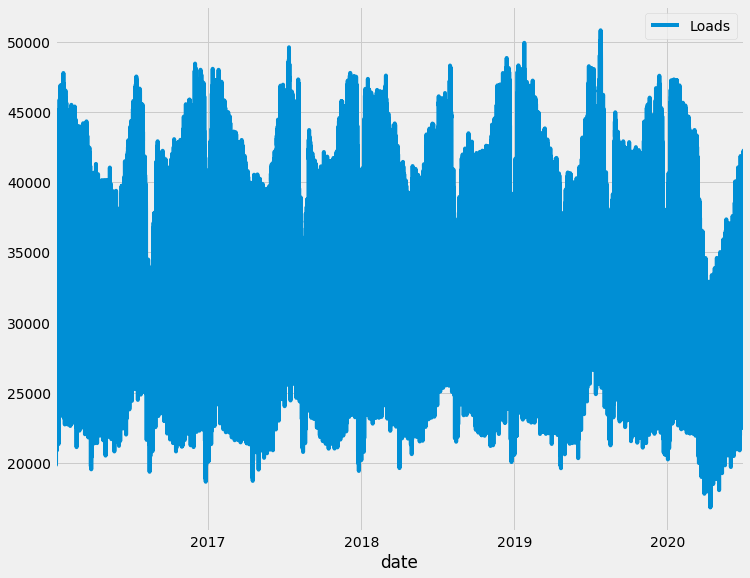

In [199]:
energy.plot()

plt.show()

In [7]:
daily_energy = energy.resample(rule='D').sum()

daily_energy = daily_energy.asfreq('D')

daily_energy.head(10)

,Loads
date,
2016-01-01,565049.332
2016-01-02,657830.231
2016-01-03,618118.573
2016-01-04,732609.803
2016-01-05,750515.760
2016-01-06,662418.567
2016-01-07,829258.562
2016-01-08,847881.634
2016-01-09,741592.693


In [8]:
daily_energy = daily_energy.drop([daily_energy.index.min(), daily_energy.index.max()])

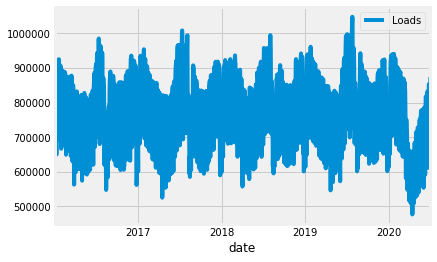

In [9]:
daily_energy.plot()

plt.show()

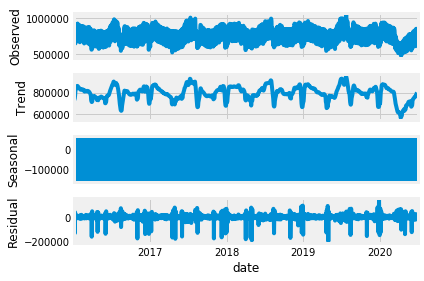

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_energy, model='additive')

fig = decomposition.plot()
plt.show()

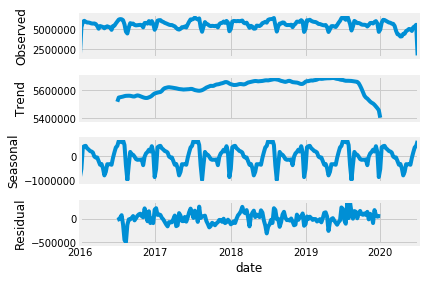

In [11]:
weekly_energy = energy.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_energy, model='additive') # Aggregate to weekly level

fig = decomposition.plot()
plt.show()

# Heatmap

In [12]:
heatmap_daily = daily_energy.copy()

heatmap_daily['Weekday_Name'] = daily_energy.index.weekday_name

heatmap_daily['Year'] =  heatmap_daily.index.year
heatmap_daily = heatmap_daily.groupby(['Year', 'Weekday_Name']).sum()

heatmap_daily = heatmap_daily.reset_index()

heatmap_daily = heatmap_daily[heatmap_daily['Year'] != 2020]

heatmap_daily= heatmap_daily.pivot(index='Year', columns='Weekday_Name', values='Loads')

heatmap_daily = heatmap_daily[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

heatmap_daily.head(100)

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2016,4.163497e+07,4.380854e+07,4.423816e+07,4.404725e+07,4.396102e+07,3.830529e+07,3.311213e+07
2017,4.212648e+07,4.418636e+07,4.474296e+07,4.493814e+07,4.413123e+07,3.803701e+07,3.403919e+07
2018,4.349353e+07,4.482976e+07,4.504705e+07,4.519473e+07,4.487082e+07,3.823292e+07,3.389353e+07
2019,4.311093e+07,4.567096e+07,4.511456e+07,4.498273e+07,4.462141e+07,3.831004e+07,3.401857e+07


Text(0.5, 1, 'Heatmap - by Day of Week')

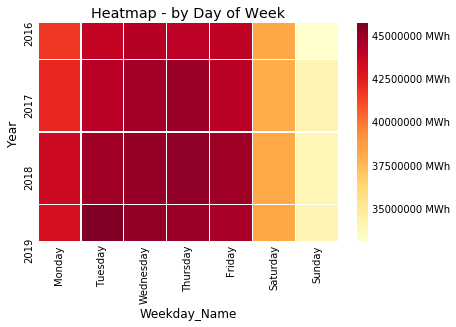

In [13]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_daily, linewidths=.7, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')

In [14]:
# Create new dataset for heatmap
heatmap_hour = energy.copy()

# First we need to add weekdays as a column
heatmap_hour['Hour'] = heatmap_hour.index.hour

# Next we add the year as column and group the data up to annual day of week level
heatmap_hour['Year'] =  heatmap_hour.index.year
heatmap_hour = heatmap_hour.groupby(['Year', 'Hour']).sum()

# Reset index 
heatmap_hour = heatmap_hour.reset_index()

# We drop off 2018 because it's not a full year
heatmap_hour = heatmap_hour[heatmap_hour['Year'] != 2020]

# Pivot it to a uniform data format for heatmaps
heatmap_hour = heatmap_hour.pivot(index='Year', columns='Hour', values='Loads')

heatmap_hour.head(100)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2016,1.090063e+07,1.010159e+07,9520240.425,9191776.250,9044379.583,9077228.602,9414772.155,1.044738e+07,1.193535e+07,1.323588e+07,...,1.285024e+07,1.297409e+07,1.313220e+07,1.334114e+07,1.369291e+07,1.391585e+07,1.399738e+07,1.370422e+07,1.300706e+07,1.200861e+07
2017,1.102340e+07,1.015286e+07,9550883.130,9211364.343,9065878.232,9079496.667,9439516.459,1.053599e+07,1.204413e+07,1.336321e+07,...,1.298087e+07,1.315202e+07,1.330976e+07,1.355077e+07,1.387735e+07,1.411620e+07,1.414955e+07,1.388767e+07,1.319926e+07,1.210950e+07
2018,1.111593e+07,1.026264e+07,9703050.094,9389892.825,9260491.359,9279793.851,9623164.377,1.071758e+07,1.217771e+07,1.349767e+07,...,1.315859e+07,1.333272e+07,1.347695e+07,1.371417e+07,1.401889e+07,1.421111e+07,1.422932e+07,1.393491e+07,1.323925e+07,1.217795e+07
2019,1.101212e+07,1.025034e+07,9668239.637,9317933.195,9182467.412,9212789.777,9586546.065,1.078493e+07,1.230157e+07,1.358560e+07,...,1.313913e+07,1.334247e+07,1.349885e+07,1.375853e+07,1.406241e+07,1.428153e+07,1.433998e+07,1.400763e+07,1.325796e+07,1.214616e+07


Text(0.5, 1, 'Heatmap - by Hour of Day')

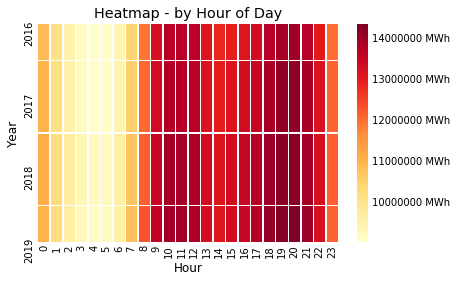

In [15]:
sns.heatmap(heatmap_hour, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Hour of Day')

In [16]:
# Create new dataset for heatmap
heatmap_day = daily_energy.copy()

# First we need to add weekdays as a column
heatmap_day['Month'] = daily_energy.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_day['Year'] =  heatmap_day.index.year
heatmap_day = heatmap_day.groupby(['Year', 'Month']).sum()

# Reset index
heatmap_day = heatmap_day.reset_index()

# We drop off 2018 because it's not a full year
heatmap_day = heatmap_day[heatmap_day['Year'] != 2020]

# Pivot it to a uniform data format for heatmaps
heatmap_day = heatmap_day.pivot(index='Year', columns='Month', values='Loads')

# Reorder columns
heatmap_day = heatmap_day[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

heatmap_day.head(10)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,2.431691e+07,2.394456e+07,2.449672e+07,2.257476e+07,2.320135e+07,2.340230e+07,2.714758e+07,2.249848e+07,2.416109e+07,2.404913e+07,2.438648e+07,2.492801e+07
2017,2.594280e+07,2.321072e+07,2.461141e+07,2.169297e+07,2.327816e+07,2.516598e+07,2.755908e+07,2.422363e+07,2.373203e+07,2.378340e+07,2.428948e+07,2.471170e+07
2018,2.562411e+07,2.404904e+07,2.551543e+07,2.215908e+07,2.393971e+07,2.471858e+07,2.747694e+07,2.426916e+07,2.425584e+07,2.456942e+07,2.424973e+07,2.473530e+07
2019,2.631811e+07,2.358851e+07,2.460047e+07,2.238292e+07,2.353838e+07,2.488970e+07,2.847691e+07,2.441870e+07,2.461153e+07,2.467865e+07,2.400884e+07,2.431651e+07


Text(0.5, 1, 'Heatmap - by Day of Week')

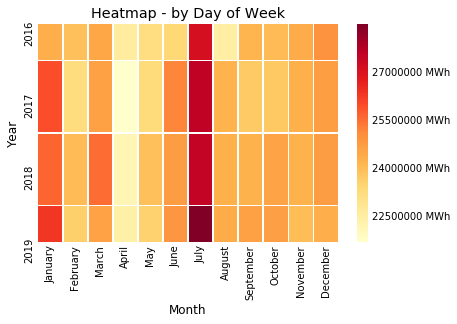

In [17]:
# Visualise electricity load via Heatmap
sns.heatmap(heatmap_day, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')

# XGBOOST MULTI

In [98]:
daily_energy=energy.loc['2016-01-01':'2019-12-31']

In [99]:
# First we split it up between train and test
# We will aim for a 12 month forecast horizon (ie predict the last 12 months in the dataset)
cutoff = '2019-12-25'

daily_energy.sort_index()

train = daily_energy[:cutoff]
test = daily_energy[cutoff:]


In [100]:
# Feature Engineering first

def preprocess_xgb_data(df, lag_start=1, lag_end=168):
    '''
    Takes data and preprocesses for XGBoost.
    
    :param lag_start default 1 : int
        Lag window start - 1 indicates one-day behind
    :param lag_end default 365 : int
        Lag window start - 365 indicates one-year behind
        
    Returns tuple : (data, target)
    '''
    # Default is add in lag of 365 days of data - ie make the model consider 365 days of prior data
    for i in range(lag_start,lag_end):
        df[f'Loads {i}'] = df.shift(periods=i, freq='H')['Loads']

    df.reset_index(inplace=True)

    # Split out attributes of timestamp - hopefully this lets the algorithm consider seasonality
    df['date_epoch'] = pd.to_numeric(df['date']) # Easier for algorithm to consider consecutive integers, rather than timestamps
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.weekofyear
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    x = df.drop(columns=['date', 'Loads']) #Don't need timestamp and target
    y = df['Loads'] # Target prediction is the load
    
    return x, y

In [101]:
example_data = train.copy() #Otherwise it becomes a pointer

example_x, example_y = preprocess_xgb_data(example_data)

example_x.head(10)

,Loads 1,Loads 2,Loads 3,Loads 4,Loads 5,Loads 6,Loads 7,Loads 8,Loads 9,Loads 10,...,Loads 166,Loads 167,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451610000000000000,4,1,1,53,1,1,2016
1,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451613600000000000,4,1,1,53,1,1,2016
2,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451617200000000000,4,1,1,53,1,1,2016
3,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451620800000000000,4,1,1,53,1,1,2016
4,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451624400000000000,4,1,1,53,1,1,2016
5,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451628000000000000,4,1,1,53,1,1,2016
6,19841.279,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,...,NaN,NaN,1451631600000000000,4,1,1,53,1,1,2016
7,20992.911,19841.279,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,...,NaN,NaN,1451635200000000000,4,1,1,53,1,1,2016
8,21617.950,20992.911,19841.279,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,...,NaN,NaN,1451638800000000000,4,1,1,53,1,1,2016
9,21929.585,21617.950,20992.911,19841.279,19860.541,20808.194,22045.998,23167.599,24503.56,NaN,...,NaN,NaN,1451642400000000000,4,1,1,53,1,1,2016


In [102]:
xtrain = train.copy() #Otherwise it becomes a pointer
xtest = test.copy() # Otherwise it becomes a pointer

train_feature, train_label = preprocess_xgb_data(xtrain)
test_feature, test_label = preprocess_xgb_data(xtest)

In [103]:
# So because we need the lag data, we need to preprocess then do the split
all_data = daily_energy.copy()

feature, label = preprocess_xgb_data(all_data, lag_start=168, lag_end=336)

# We will aim for a 12 month forecast horizon (ie predict the last 365 days in the dataset)
train_feature = feature[:-144]
train_label = label[:-144]

test_feature = feature[-144:]
test_label = label[-144:]

In [104]:
xtrain


,date,Loads,Loads 1,Loads 2,Loads 3,Loads 4,Loads 5,Loads 6,Loads 7,Loads 8,...,Loads 166,Loads 167,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
0,2016-01-01 01:00:00,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451610000000000000,4,1,1,53,1,1,2016
1,2016-01-01 02:00:00,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451613600000000000,4,1,1,53,1,1,2016
2,2016-01-01 03:00:00,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451617200000000000,4,1,1,53,1,1,2016
3,2016-01-01 04:00:00,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451620800000000000,4,1,1,53,1,1,2016
4,2016-01-01 05:00:00,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,...,NaN,NaN,1451624400000000000,4,1,1,53,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,2019-12-25 19:00:00,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,27084.012,26744.756,...,39823.113,42641.441,1577300400000000000,2,25,359,52,4,12,2019
34915,2019-12-25 20:00:00,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,27084.012,...,36685.103,39823.113,1577304000000000000,2,25,359,52,4,12,2019
34916,2019-12-25 21:00:00,28926.863,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,...,33158.219,36685.103,1577307600000000000,2,25,359,52,4,12,2019
34917,2019-12-25 22:00:00,28131.526,28926.863,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,...,30161.279,33158.219,1577311200000000000,2,25,359,52,4,12,2019


In [105]:
train_feature

,Loads 168,Loads 169,Loads 170,Loads 171,Loads 172,Loads 173,Loads 174,Loads 175,Loads 176,Loads 177,...,Loads 334,Loads 335,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451610000000000000,4,1,1,53,1,1,2016
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451613600000000000,4,1,1,53,1,1,2016
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451617200000000000,4,1,1,53,1,1,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451620800000000000,4,1,1,53,1,1,2016
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1451624400000000000,4,1,1,53,1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,43805.273,45034.740,43328.944,41720.327,40976.554,39820.711,40187.410,42136.329,42627.425,43085.941,...,42376.861,44795.763,1577300400000000000,2,25,359,52,4,12,2019
34915,42641.441,43805.273,45034.740,43328.944,41720.327,40976.554,39820.711,40187.410,42136.329,42627.425,...,39456.739,42376.861,1577304000000000000,2,25,359,52,4,12,2019
34916,39823.113,42641.441,43805.273,45034.740,43328.944,41720.327,40976.554,39820.711,40187.410,42136.329,...,36017.766,39456.739,1577307600000000000,2,25,359,52,4,12,2019
34917,36685.103,39823.113,42641.441,43805.273,45034.740,43328.944,41720.327,40976.554,39820.711,40187.410,...,32577.623,36017.766,1577311200000000000,2,25,359,52,4,12,2019


In [106]:
train_label

0        24503.560
1        23167.599
2        22045.998
3        20808.194
4        19860.541
           ...    
34914    29560.877
34915    29828.167
34916    28926.863
34917    28131.526
34918    26817.384
Name: Loads, Length: 34919, dtype: float64

In [107]:
test_feature

,Loads 168,Loads 169,Loads 170,Loads 171,Loads 172,Loads 173,Loads 174,Loads 175,Loads 176,Loads 177,...,Loads 334,Loads 335,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
34919,30161.279,33158.219,36685.103,39823.113,42641.441,43805.273,45034.740,43328.944,41720.327,40976.554,...,27414.608,29204.717,1577318400000000000,3,26,360,52,4,12,2019
34920,27685.960,30161.279,33158.219,36685.103,39823.113,42641.441,43805.273,45034.740,43328.944,41720.327,...,26755.410,27414.608,1577322000000000000,3,26,360,52,4,12,2019
34921,26116.622,27685.960,30161.279,33158.219,36685.103,39823.113,42641.441,43805.273,45034.740,43328.944,...,26583.914,26755.410,1577325600000000000,3,26,360,52,4,12,2019
34922,25544.607,26116.622,27685.960,30161.279,33158.219,36685.103,39823.113,42641.441,43805.273,45034.740,...,26973.197,26583.914,1577329200000000000,3,26,360,52,4,12,2019
34923,25184.397,25544.607,26116.622,27685.960,30161.279,33158.219,36685.103,39823.113,42641.441,43805.273,...,28413.678,26973.197,1577332800000000000,3,26,360,52,4,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,35336.650,35456.262,32872.458,31121.093,30235.527,30543.258,30994.112,31635.605,31964.625,32365.268,...,40193.755,42736.937,1577818800000000000,1,31,365,1,4,12,2019
35059,34639.571,35336.650,35456.262,32872.458,31121.093,30235.527,30543.258,30994.112,31635.605,31964.625,...,37111.102,40193.755,1577822400000000000,1,31,365,1,4,12,2019
35060,32367.549,34639.571,35336.650,35456.262,32872.458,31121.093,30235.527,30543.258,30994.112,31635.605,...,33465.052,37111.102,1577826000000000000,1,31,365,1,4,12,2019
35061,29844.394,32367.549,34639.571,35336.650,35456.262,32872.458,31121.093,30235.527,30543.258,30994.112,...,30201.314,33465.052,1577829600000000000,1,31,365,1,4,12,2019


In [108]:
test_label

34919    24637.626
34920    23208.431
34921    21815.604
34922    21436.551
34923    21027.678
           ...    
35058    36423.472
35059    35535.418
35060    33183.690
35061    30677.031
35062    28272.786
Name: Loads, Length: 144, dtype: float64

In [109]:
len(test_label)

144

In [110]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, train_test_split

# We will try with 1000 trees and a maximum depth of each tree to be 5
# Early stop if the model hasn't improved in 100 rounds
model = XGBRegressor(
    max_depth=6 # Default - 6
    ,n_estimators=10000
    ,booster='gbtree'
    ,colsample_bytree=1 # Subsample ratio of columns when constructing each tree - default 1
    ,eta=0.3 # Learning Rate - default 0.3
    ,importance_type='gain' # Default is gain
)
model.fit(
    train_feature
    ,train_label
    ,eval_set=[(train_feature, train_label)]
    ,eval_metric='mae'
    ,verbose=True
    ,early_stopping_rounds=100 # Stop after 100 rounds if it doesn't after 100 times
)

xtrain['Loads Prediction'] = model.predict(train_feature)
XGB_prediction_no_lag = xtrain[['date', 'Loads Prediction']].set_index('date')
XGB_prediction_no_lag = XGB_prediction_no_lag.rename(columns={'Loads Prediction': 'Loads'})


[0]	validation_0-mae:23448.42383
Will train until validation_0-mae hasn't improved in 100 rounds.
[1]	validation_0-mae:16422.95703
[2]	validation_0-mae:11508.25195
[3]	validation_0-mae:8088.75781
[4]	validation_0-mae:5720.85840
[5]	validation_0-mae:4085.57764
[6]	validation_0-mae:2972.18262
[7]	validation_0-mae:2216.65088
[8]	validation_0-mae:1718.51269
[9]	validation_0-mae:1387.66003
[10]	validation_0-mae:1197.84778
[11]	validation_0-mae:1069.97070
[12]	validation_0-mae:985.98297
[13]	validation_0-mae:925.13361
[14]	validation_0-mae:895.73273
[15]	validation_0-mae:874.92779
[16]	validation_0-mae:838.96924
[17]	validation_0-mae:821.33752
[18]	validation_0-mae:810.72577
[19]	validation_0-mae:799.43353
[20]	validation_0-mae:781.59326
[21]	validation_0-mae:772.49176
[22]	validation_0-mae:755.17731
[23]	validation_0-mae:745.94067
[24]	validation_0-mae:735.75256
[25]	validation_0-mae:730.37592
[26]	validation_0-mae:721.82947
[27]	validation_0-mae:710.12689
[28]	validation_0-mae:700.10498
[2

[250]	validation_0-mae:273.43808
[251]	validation_0-mae:272.68802
[252]	validation_0-mae:271.90390
[253]	validation_0-mae:271.16464
[254]	validation_0-mae:270.43744
[255]	validation_0-mae:269.74417
[256]	validation_0-mae:269.43805
[257]	validation_0-mae:268.79297
[258]	validation_0-mae:267.59482
[259]	validation_0-mae:267.00015
[260]	validation_0-mae:266.46790
[261]	validation_0-mae:265.88809
[262]	validation_0-mae:265.36124
[263]	validation_0-mae:264.62506
[264]	validation_0-mae:264.18655
[265]	validation_0-mae:263.14673
[266]	validation_0-mae:262.67932
[267]	validation_0-mae:262.01840
[268]	validation_0-mae:261.28046
[269]	validation_0-mae:260.72485
[270]	validation_0-mae:259.45749
[271]	validation_0-mae:258.94388
[272]	validation_0-mae:258.14172
[273]	validation_0-mae:257.63150
[274]	validation_0-mae:257.07501
[275]	validation_0-mae:256.74377
[276]	validation_0-mae:256.44617
[277]	validation_0-mae:255.87245
[278]	validation_0-mae:255.57697
[279]	validation_0-mae:254.95358
[280]	vali

[499]	validation_0-mae:156.00914
[500]	validation_0-mae:155.33948
[501]	validation_0-mae:155.13419
[502]	validation_0-mae:154.46176
[503]	validation_0-mae:153.98601
[504]	validation_0-mae:153.63042
[505]	validation_0-mae:153.42944
[506]	validation_0-mae:153.32872
[507]	validation_0-mae:153.27936
[508]	validation_0-mae:152.96777
[509]	validation_0-mae:152.55211
[510]	validation_0-mae:152.39420
[511]	validation_0-mae:152.09155
[512]	validation_0-mae:151.84032
[513]	validation_0-mae:151.64603
[514]	validation_0-mae:151.43117
[515]	validation_0-mae:151.05154
[516]	validation_0-mae:150.71947
[517]	validation_0-mae:150.25507
[518]	validation_0-mae:150.01675
[519]	validation_0-mae:149.68724
[520]	validation_0-mae:149.31493
[521]	validation_0-mae:148.96530
[522]	validation_0-mae:148.53606
[523]	validation_0-mae:148.31171
[524]	validation_0-mae:147.94026
[525]	validation_0-mae:147.70901
[526]	validation_0-mae:147.34158
[527]	validation_0-mae:147.03603
[528]	validation_0-mae:146.62035
[529]	vali

[749]	validation_0-mae:92.47890
[750]	validation_0-mae:92.25871
[751]	validation_0-mae:92.01017
[752]	validation_0-mae:91.83099
[753]	validation_0-mae:91.68219
[754]	validation_0-mae:91.50071
[755]	validation_0-mae:91.42796
[756]	validation_0-mae:91.21721
[757]	validation_0-mae:90.92172
[758]	validation_0-mae:90.76317
[759]	validation_0-mae:90.55520
[760]	validation_0-mae:90.34943
[761]	validation_0-mae:90.15154
[762]	validation_0-mae:89.93185
[763]	validation_0-mae:89.72819
[764]	validation_0-mae:89.51176
[765]	validation_0-mae:89.41082
[766]	validation_0-mae:89.18563
[767]	validation_0-mae:89.02684
[768]	validation_0-mae:88.85083
[769]	validation_0-mae:88.71725
[770]	validation_0-mae:88.55935
[771]	validation_0-mae:88.39459
[772]	validation_0-mae:88.15982
[773]	validation_0-mae:88.05877
[774]	validation_0-mae:87.99503
[775]	validation_0-mae:87.85346
[776]	validation_0-mae:87.76784
[777]	validation_0-mae:87.66056
[778]	validation_0-mae:87.53105
[779]	validation_0-mae:87.41753
[780]	va

[1005]	validation_0-mae:56.84050
[1006]	validation_0-mae:56.73393
[1007]	validation_0-mae:56.60921
[1008]	validation_0-mae:56.52664
[1009]	validation_0-mae:56.45118
[1010]	validation_0-mae:56.32273
[1011]	validation_0-mae:56.19543
[1012]	validation_0-mae:56.02156
[1013]	validation_0-mae:55.91689
[1014]	validation_0-mae:55.85436
[1015]	validation_0-mae:55.74941
[1016]	validation_0-mae:55.64001
[1017]	validation_0-mae:55.49039
[1018]	validation_0-mae:55.35816
[1019]	validation_0-mae:55.27516
[1020]	validation_0-mae:55.17276
[1021]	validation_0-mae:55.07603
[1022]	validation_0-mae:54.98415
[1023]	validation_0-mae:54.92886
[1024]	validation_0-mae:54.74464
[1025]	validation_0-mae:54.57157
[1026]	validation_0-mae:54.46158
[1027]	validation_0-mae:54.36931
[1028]	validation_0-mae:54.29716
[1029]	validation_0-mae:54.19893
[1030]	validation_0-mae:54.11991
[1031]	validation_0-mae:54.06294
[1032]	validation_0-mae:53.99445
[1033]	validation_0-mae:53.82919
[1034]	validation_0-mae:53.72334
[1035]	val

[1254]	validation_0-mae:36.02677
[1255]	validation_0-mae:35.96192
[1256]	validation_0-mae:35.87889
[1257]	validation_0-mae:35.80579
[1258]	validation_0-mae:35.71676
[1259]	validation_0-mae:35.60503
[1260]	validation_0-mae:35.58958
[1261]	validation_0-mae:35.53948
[1262]	validation_0-mae:35.48888
[1263]	validation_0-mae:35.40869
[1264]	validation_0-mae:35.32261
[1265]	validation_0-mae:35.26129
[1266]	validation_0-mae:35.18351
[1267]	validation_0-mae:35.12701
[1268]	validation_0-mae:35.04015
[1269]	validation_0-mae:34.97829
[1270]	validation_0-mae:34.93059
[1271]	validation_0-mae:34.86467
[1272]	validation_0-mae:34.79234
[1273]	validation_0-mae:34.72804
[1274]	validation_0-mae:34.67366
[1275]	validation_0-mae:34.64199
[1276]	validation_0-mae:34.60913
[1277]	validation_0-mae:34.55223
[1278]	validation_0-mae:34.46341
[1279]	validation_0-mae:34.35679
[1280]	validation_0-mae:34.30069
[1281]	validation_0-mae:34.23840
[1282]	validation_0-mae:34.19761
[1283]	validation_0-mae:34.15251
[1284]	val

[1503]	validation_0-mae:23.17714
[1504]	validation_0-mae:23.16570
[1505]	validation_0-mae:23.14107
[1506]	validation_0-mae:23.07624
[1507]	validation_0-mae:23.04037
[1508]	validation_0-mae:23.00557
[1509]	validation_0-mae:22.97455
[1510]	validation_0-mae:22.92603
[1511]	validation_0-mae:22.89895
[1512]	validation_0-mae:22.87366
[1513]	validation_0-mae:22.82071
[1514]	validation_0-mae:22.72908
[1515]	validation_0-mae:22.69038
[1516]	validation_0-mae:22.65619
[1517]	validation_0-mae:22.62752
[1518]	validation_0-mae:22.59630
[1519]	validation_0-mae:22.56166
[1520]	validation_0-mae:22.52365
[1521]	validation_0-mae:22.49073
[1522]	validation_0-mae:22.44187
[1523]	validation_0-mae:22.39758
[1524]	validation_0-mae:22.34727
[1525]	validation_0-mae:22.29600
[1526]	validation_0-mae:22.23960
[1527]	validation_0-mae:22.19352
[1528]	validation_0-mae:22.17342
[1529]	validation_0-mae:22.12415
[1530]	validation_0-mae:22.09419
[1531]	validation_0-mae:22.05177
[1532]	validation_0-mae:22.02961
[1533]	val

[1752]	validation_0-mae:15.31159
[1753]	validation_0-mae:15.28404
[1754]	validation_0-mae:15.25246
[1755]	validation_0-mae:15.22822
[1756]	validation_0-mae:15.19247
[1757]	validation_0-mae:15.17705
[1758]	validation_0-mae:15.15894
[1759]	validation_0-mae:15.12709
[1760]	validation_0-mae:15.09073
[1761]	validation_0-mae:15.06638
[1762]	validation_0-mae:15.04044
[1763]	validation_0-mae:15.01669
[1764]	validation_0-mae:14.99832
[1765]	validation_0-mae:14.96843
[1766]	validation_0-mae:14.94474
[1767]	validation_0-mae:14.90514
[1768]	validation_0-mae:14.89786
[1769]	validation_0-mae:14.88797
[1770]	validation_0-mae:14.85588
[1771]	validation_0-mae:14.83443
[1772]	validation_0-mae:14.80737
[1773]	validation_0-mae:14.77897
[1774]	validation_0-mae:14.74647
[1775]	validation_0-mae:14.72397
[1776]	validation_0-mae:14.67979
[1777]	validation_0-mae:14.64529
[1778]	validation_0-mae:14.62742
[1779]	validation_0-mae:14.60875
[1780]	validation_0-mae:14.57907
[1781]	validation_0-mae:14.56673
[1782]	val

[2001]	validation_0-mae:10.04785
[2002]	validation_0-mae:10.01991
[2003]	validation_0-mae:10.00345
[2004]	validation_0-mae:9.98635
[2005]	validation_0-mae:9.96167
[2006]	validation_0-mae:9.93471
[2007]	validation_0-mae:9.91531
[2008]	validation_0-mae:9.89142
[2009]	validation_0-mae:9.87213
[2010]	validation_0-mae:9.85590
[2011]	validation_0-mae:9.83804
[2012]	validation_0-mae:9.81601
[2013]	validation_0-mae:9.78956
[2014]	validation_0-mae:9.77889
[2015]	validation_0-mae:9.76772
[2016]	validation_0-mae:9.76103
[2017]	validation_0-mae:9.73903
[2018]	validation_0-mae:9.72692
[2019]	validation_0-mae:9.71846
[2020]	validation_0-mae:9.69789
[2021]	validation_0-mae:9.68303
[2022]	validation_0-mae:9.67414
[2023]	validation_0-mae:9.65511
[2024]	validation_0-mae:9.64088
[2025]	validation_0-mae:9.62272
[2026]	validation_0-mae:9.61938
[2027]	validation_0-mae:9.60251
[2028]	validation_0-mae:9.58619
[2029]	validation_0-mae:9.57417
[2030]	validation_0-mae:9.55289
[2031]	validation_0-mae:9.54104
[2032

[2257]	validation_0-mae:6.57104
[2258]	validation_0-mae:6.56091
[2259]	validation_0-mae:6.55443
[2260]	validation_0-mae:6.54174
[2261]	validation_0-mae:6.53234
[2262]	validation_0-mae:6.51871
[2263]	validation_0-mae:6.51061
[2264]	validation_0-mae:6.50360
[2265]	validation_0-mae:6.49056
[2266]	validation_0-mae:6.47879
[2267]	validation_0-mae:6.46868
[2268]	validation_0-mae:6.45610
[2269]	validation_0-mae:6.44578
[2270]	validation_0-mae:6.42924
[2271]	validation_0-mae:6.41111
[2272]	validation_0-mae:6.40170
[2273]	validation_0-mae:6.39333
[2274]	validation_0-mae:6.37617
[2275]	validation_0-mae:6.36770
[2276]	validation_0-mae:6.35974
[2277]	validation_0-mae:6.34603
[2278]	validation_0-mae:6.33628
[2279]	validation_0-mae:6.32794
[2280]	validation_0-mae:6.31644
[2281]	validation_0-mae:6.29821
[2282]	validation_0-mae:6.28290
[2283]	validation_0-mae:6.27209
[2284]	validation_0-mae:6.25781
[2285]	validation_0-mae:6.24488
[2286]	validation_0-mae:6.22888
[2287]	validation_0-mae:6.21316
[2288]	v

[2514]	validation_0-mae:4.36604
[2515]	validation_0-mae:4.35640
[2516]	validation_0-mae:4.35006
[2517]	validation_0-mae:4.34251
[2518]	validation_0-mae:4.33373
[2519]	validation_0-mae:4.32519
[2520]	validation_0-mae:4.32430
[2521]	validation_0-mae:4.31669
[2522]	validation_0-mae:4.30830
[2523]	validation_0-mae:4.30167
[2524]	validation_0-mae:4.29775
[2525]	validation_0-mae:4.29020
[2526]	validation_0-mae:4.28115
[2527]	validation_0-mae:4.27215
[2528]	validation_0-mae:4.26608
[2529]	validation_0-mae:4.25990
[2530]	validation_0-mae:4.24882
[2531]	validation_0-mae:4.23976
[2532]	validation_0-mae:4.23173
[2533]	validation_0-mae:4.22752
[2534]	validation_0-mae:4.21669
[2535]	validation_0-mae:4.20999
[2536]	validation_0-mae:4.20314
[2537]	validation_0-mae:4.19454
[2538]	validation_0-mae:4.18599
[2539]	validation_0-mae:4.17588
[2540]	validation_0-mae:4.17025
[2541]	validation_0-mae:4.16416
[2542]	validation_0-mae:4.15659
[2543]	validation_0-mae:4.15116
[2544]	validation_0-mae:4.14286
[2545]	v

[2771]	validation_0-mae:2.84438
[2772]	validation_0-mae:2.83785
[2773]	validation_0-mae:2.83242
[2774]	validation_0-mae:2.82975
[2775]	validation_0-mae:2.82345
[2776]	validation_0-mae:2.81854
[2777]	validation_0-mae:2.81593
[2778]	validation_0-mae:2.81229
[2779]	validation_0-mae:2.80746
[2780]	validation_0-mae:2.80221
[2781]	validation_0-mae:2.79817
[2782]	validation_0-mae:2.79516
[2783]	validation_0-mae:2.79260
[2784]	validation_0-mae:2.79121
[2785]	validation_0-mae:2.78959
[2786]	validation_0-mae:2.78644
[2787]	validation_0-mae:2.78377
[2788]	validation_0-mae:2.78104
[2789]	validation_0-mae:2.78016
[2790]	validation_0-mae:2.77456
[2791]	validation_0-mae:2.77136
[2792]	validation_0-mae:2.76717
[2793]	validation_0-mae:2.76210
[2794]	validation_0-mae:2.75678
[2795]	validation_0-mae:2.75223
[2796]	validation_0-mae:2.74829
[2797]	validation_0-mae:2.74093
[2798]	validation_0-mae:2.73300
[2799]	validation_0-mae:2.72904
[2800]	validation_0-mae:2.72446
[2801]	validation_0-mae:2.72006
[2802]	v

[3028]	validation_0-mae:1.88985
[3029]	validation_0-mae:1.88885
[3030]	validation_0-mae:1.88654
[3031]	validation_0-mae:1.88222
[3032]	validation_0-mae:1.87826
[3033]	validation_0-mae:1.87453
[3034]	validation_0-mae:1.87152
[3035]	validation_0-mae:1.86750
[3036]	validation_0-mae:1.86563
[3037]	validation_0-mae:1.86330
[3038]	validation_0-mae:1.85996
[3039]	validation_0-mae:1.85693
[3040]	validation_0-mae:1.85320
[3041]	validation_0-mae:1.84902
[3042]	validation_0-mae:1.84485
[3043]	validation_0-mae:1.84089
[3044]	validation_0-mae:1.83834
[3045]	validation_0-mae:1.83606
[3046]	validation_0-mae:1.83418
[3047]	validation_0-mae:1.83185
[3048]	validation_0-mae:1.82702
[3049]	validation_0-mae:1.82304
[3050]	validation_0-mae:1.81944
[3051]	validation_0-mae:1.81734
[3052]	validation_0-mae:1.81345
[3053]	validation_0-mae:1.81105
[3054]	validation_0-mae:1.80741
[3055]	validation_0-mae:1.80585
[3056]	validation_0-mae:1.80225
[3057]	validation_0-mae:1.79829
[3058]	validation_0-mae:1.79618
[3059]	v

[3285]	validation_0-mae:1.24930
[3286]	validation_0-mae:1.24587
[3287]	validation_0-mae:1.24310
[3288]	validation_0-mae:1.24144
[3289]	validation_0-mae:1.24028
[3290]	validation_0-mae:1.23798
[3291]	validation_0-mae:1.23598
[3292]	validation_0-mae:1.23336
[3293]	validation_0-mae:1.23148
[3294]	validation_0-mae:1.23010
[3295]	validation_0-mae:1.22837
[3296]	validation_0-mae:1.22734
[3297]	validation_0-mae:1.22553
[3298]	validation_0-mae:1.22249
[3299]	validation_0-mae:1.22135
[3300]	validation_0-mae:1.22087
[3301]	validation_0-mae:1.21899
[3302]	validation_0-mae:1.21638
[3303]	validation_0-mae:1.21541
[3304]	validation_0-mae:1.21362
[3305]	validation_0-mae:1.21349
[3306]	validation_0-mae:1.21115
[3307]	validation_0-mae:1.21022
[3308]	validation_0-mae:1.20977
[3309]	validation_0-mae:1.20736
[3310]	validation_0-mae:1.20648
[3311]	validation_0-mae:1.20617
[3312]	validation_0-mae:1.20596
[3313]	validation_0-mae:1.20539
[3314]	validation_0-mae:1.20474
[3315]	validation_0-mae:1.20257
[3316]	v

[3542]	validation_0-mae:0.83830
[3543]	validation_0-mae:0.83755
[3544]	validation_0-mae:0.83571
[3545]	validation_0-mae:0.83437
[3546]	validation_0-mae:0.83295
[3547]	validation_0-mae:0.83124
[3548]	validation_0-mae:0.82991
[3549]	validation_0-mae:0.82760
[3550]	validation_0-mae:0.82667
[3551]	validation_0-mae:0.82518
[3552]	validation_0-mae:0.82432
[3553]	validation_0-mae:0.82309
[3554]	validation_0-mae:0.82130
[3555]	validation_0-mae:0.81992
[3556]	validation_0-mae:0.81816
[3557]	validation_0-mae:0.81651
[3558]	validation_0-mae:0.81564
[3559]	validation_0-mae:0.81422
[3560]	validation_0-mae:0.81271
[3561]	validation_0-mae:0.81124
[3562]	validation_0-mae:0.81027
[3563]	validation_0-mae:0.80871
[3564]	validation_0-mae:0.80746
[3565]	validation_0-mae:0.80628
[3566]	validation_0-mae:0.80482
[3567]	validation_0-mae:0.80355
[3568]	validation_0-mae:0.80206
[3569]	validation_0-mae:0.80100
[3570]	validation_0-mae:0.79958
[3571]	validation_0-mae:0.79819
[3572]	validation_0-mae:0.79802
[3573]	v

[3799]	validation_0-mae:0.56379
[3800]	validation_0-mae:0.56287
[3801]	validation_0-mae:0.56165
[3802]	validation_0-mae:0.56072
[3803]	validation_0-mae:0.55994
[3804]	validation_0-mae:0.55915
[3805]	validation_0-mae:0.55793
[3806]	validation_0-mae:0.55760
[3807]	validation_0-mae:0.55638
[3808]	validation_0-mae:0.55534
[3809]	validation_0-mae:0.55438
[3810]	validation_0-mae:0.55357
[3811]	validation_0-mae:0.55316
[3812]	validation_0-mae:0.55230
[3813]	validation_0-mae:0.55148
[3814]	validation_0-mae:0.55060
[3815]	validation_0-mae:0.54996
[3816]	validation_0-mae:0.54934
[3817]	validation_0-mae:0.54878
[3818]	validation_0-mae:0.54759
[3819]	validation_0-mae:0.54661
[3820]	validation_0-mae:0.54549
[3821]	validation_0-mae:0.54491
[3822]	validation_0-mae:0.54446
[3823]	validation_0-mae:0.54330
[3824]	validation_0-mae:0.54180
[3825]	validation_0-mae:0.54066
[3826]	validation_0-mae:0.54010
[3827]	validation_0-mae:0.53930
[3828]	validation_0-mae:0.53859
[3829]	validation_0-mae:0.53785
[3830]	v

[4056]	validation_0-mae:0.37291
[4057]	validation_0-mae:0.37248
[4058]	validation_0-mae:0.37215
[4059]	validation_0-mae:0.37153
[4060]	validation_0-mae:0.37052
[4061]	validation_0-mae:0.37006
[4062]	validation_0-mae:0.36949
[4063]	validation_0-mae:0.36875
[4064]	validation_0-mae:0.36788
[4065]	validation_0-mae:0.36684
[4066]	validation_0-mae:0.36626
[4067]	validation_0-mae:0.36540
[4068]	validation_0-mae:0.36489
[4069]	validation_0-mae:0.36446
[4070]	validation_0-mae:0.36349
[4071]	validation_0-mae:0.36273
[4072]	validation_0-mae:0.36192
[4073]	validation_0-mae:0.36139
[4074]	validation_0-mae:0.36066
[4075]	validation_0-mae:0.35973
[4076]	validation_0-mae:0.35924
[4077]	validation_0-mae:0.35875
[4078]	validation_0-mae:0.35870
[4079]	validation_0-mae:0.35809
[4080]	validation_0-mae:0.35755
[4081]	validation_0-mae:0.35728
[4082]	validation_0-mae:0.35672
[4083]	validation_0-mae:0.35632
[4084]	validation_0-mae:0.35585
[4085]	validation_0-mae:0.35490
[4086]	validation_0-mae:0.35422
[4087]	v

[4313]	validation_0-mae:0.24757
[4314]	validation_0-mae:0.24692
[4315]	validation_0-mae:0.24648
[4316]	validation_0-mae:0.24604
[4317]	validation_0-mae:0.24569
[4318]	validation_0-mae:0.24489
[4319]	validation_0-mae:0.24441
[4320]	validation_0-mae:0.24401
[4321]	validation_0-mae:0.24344
[4322]	validation_0-mae:0.24299
[4323]	validation_0-mae:0.24249
[4324]	validation_0-mae:0.24205
[4325]	validation_0-mae:0.24174
[4326]	validation_0-mae:0.24156
[4327]	validation_0-mae:0.24118
[4328]	validation_0-mae:0.24075
[4329]	validation_0-mae:0.24017
[4330]	validation_0-mae:0.23978
[4331]	validation_0-mae:0.23949
[4332]	validation_0-mae:0.23921
[4333]	validation_0-mae:0.23885
[4334]	validation_0-mae:0.23864
[4335]	validation_0-mae:0.23818
[4336]	validation_0-mae:0.23765
[4337]	validation_0-mae:0.23722
[4338]	validation_0-mae:0.23684
[4339]	validation_0-mae:0.23654
[4340]	validation_0-mae:0.23622
[4341]	validation_0-mae:0.23579
[4342]	validation_0-mae:0.23541
[4343]	validation_0-mae:0.23515
[4344]	v

[4570]	validation_0-mae:0.16225
[4571]	validation_0-mae:0.16187
[4572]	validation_0-mae:0.16146
[4573]	validation_0-mae:0.16119
[4574]	validation_0-mae:0.16088
[4575]	validation_0-mae:0.16072
[4576]	validation_0-mae:0.16035
[4577]	validation_0-mae:0.16004
[4578]	validation_0-mae:0.15980
[4579]	validation_0-mae:0.15943
[4580]	validation_0-mae:0.15916
[4581]	validation_0-mae:0.15897
[4582]	validation_0-mae:0.15886
[4583]	validation_0-mae:0.15859
[4584]	validation_0-mae:0.15838
[4585]	validation_0-mae:0.15801
[4586]	validation_0-mae:0.15764
[4587]	validation_0-mae:0.15722
[4588]	validation_0-mae:0.15693
[4589]	validation_0-mae:0.15663
[4590]	validation_0-mae:0.15637
[4591]	validation_0-mae:0.15613
[4592]	validation_0-mae:0.15580
[4593]	validation_0-mae:0.15543
[4594]	validation_0-mae:0.15503
[4595]	validation_0-mae:0.15473
[4596]	validation_0-mae:0.15458
[4597]	validation_0-mae:0.15441
[4598]	validation_0-mae:0.15432
[4599]	validation_0-mae:0.15423
[4600]	validation_0-mae:0.15413
[4601]	v

[4827]	validation_0-mae:0.10867
[4828]	validation_0-mae:0.10848
[4829]	validation_0-mae:0.10833
[4830]	validation_0-mae:0.10816
[4831]	validation_0-mae:0.10799
[4832]	validation_0-mae:0.10785
[4833]	validation_0-mae:0.10767
[4834]	validation_0-mae:0.10742
[4835]	validation_0-mae:0.10719
[4836]	validation_0-mae:0.10704
[4837]	validation_0-mae:0.10686
[4838]	validation_0-mae:0.10674
[4839]	validation_0-mae:0.10653
[4840]	validation_0-mae:0.10634
[4841]	validation_0-mae:0.10616
[4842]	validation_0-mae:0.10600
[4843]	validation_0-mae:0.10581
[4844]	validation_0-mae:0.10562
[4845]	validation_0-mae:0.10543
[4846]	validation_0-mae:0.10525
[4847]	validation_0-mae:0.10518
[4848]	validation_0-mae:0.10494
[4849]	validation_0-mae:0.10482
[4850]	validation_0-mae:0.10458
[4851]	validation_0-mae:0.10438
[4852]	validation_0-mae:0.10414
[4853]	validation_0-mae:0.10390
[4854]	validation_0-mae:0.10376
[4855]	validation_0-mae:0.10358
[4856]	validation_0-mae:0.10335
[4857]	validation_0-mae:0.10325
[4858]	v

[5084]	validation_0-mae:0.07085
[5085]	validation_0-mae:0.07073
[5086]	validation_0-mae:0.07059
[5087]	validation_0-mae:0.07051
[5088]	validation_0-mae:0.07038
[5089]	validation_0-mae:0.07028
[5090]	validation_0-mae:0.07019
[5091]	validation_0-mae:0.07006
[5092]	validation_0-mae:0.07005
[5093]	validation_0-mae:0.06994
[5094]	validation_0-mae:0.06987
[5095]	validation_0-mae:0.06978
[5096]	validation_0-mae:0.06967
[5097]	validation_0-mae:0.06955
[5098]	validation_0-mae:0.06940
[5099]	validation_0-mae:0.06926
[5100]	validation_0-mae:0.06912
[5101]	validation_0-mae:0.06895
[5102]	validation_0-mae:0.06885
[5103]	validation_0-mae:0.06874
[5104]	validation_0-mae:0.06865
[5105]	validation_0-mae:0.06860
[5106]	validation_0-mae:0.06853
[5107]	validation_0-mae:0.06841
[5108]	validation_0-mae:0.06830
[5109]	validation_0-mae:0.06817
[5110]	validation_0-mae:0.06802
[5111]	validation_0-mae:0.06791
[5112]	validation_0-mae:0.06771
[5113]	validation_0-mae:0.06762
[5114]	validation_0-mae:0.06751
[5115]	v

[5341]	validation_0-mae:0.04812
[5342]	validation_0-mae:0.04800
[5343]	validation_0-mae:0.04793
[5344]	validation_0-mae:0.04787
[5345]	validation_0-mae:0.04778
[5346]	validation_0-mae:0.04771
[5347]	validation_0-mae:0.04765
[5348]	validation_0-mae:0.04760
[5349]	validation_0-mae:0.04752
[5350]	validation_0-mae:0.04743
[5351]	validation_0-mae:0.04735
[5352]	validation_0-mae:0.04729
[5353]	validation_0-mae:0.04725
[5354]	validation_0-mae:0.04720
[5355]	validation_0-mae:0.04712
[5356]	validation_0-mae:0.04702
[5357]	validation_0-mae:0.04691
[5358]	validation_0-mae:0.04685
[5359]	validation_0-mae:0.04677
[5360]	validation_0-mae:0.04674
[5361]	validation_0-mae:0.04666
[5362]	validation_0-mae:0.04662
[5363]	validation_0-mae:0.04662
[5364]	validation_0-mae:0.04655
[5365]	validation_0-mae:0.04648
[5366]	validation_0-mae:0.04644
[5367]	validation_0-mae:0.04635
[5368]	validation_0-mae:0.04623
[5369]	validation_0-mae:0.04612
[5370]	validation_0-mae:0.04608
[5371]	validation_0-mae:0.04601
[5372]	v

[5598]	validation_0-mae:0.03185
[5599]	validation_0-mae:0.03179
[5600]	validation_0-mae:0.03175
[5601]	validation_0-mae:0.03173
[5602]	validation_0-mae:0.03170
[5603]	validation_0-mae:0.03165
[5604]	validation_0-mae:0.03159
[5605]	validation_0-mae:0.03155
[5606]	validation_0-mae:0.03151
[5607]	validation_0-mae:0.03144
[5608]	validation_0-mae:0.03135
[5609]	validation_0-mae:0.03131
[5610]	validation_0-mae:0.03126
[5611]	validation_0-mae:0.03120
[5612]	validation_0-mae:0.03117
[5613]	validation_0-mae:0.03113
[5614]	validation_0-mae:0.03110
[5615]	validation_0-mae:0.03107
[5616]	validation_0-mae:0.03103
[5617]	validation_0-mae:0.03099
[5618]	validation_0-mae:0.03093
[5619]	validation_0-mae:0.03090
[5620]	validation_0-mae:0.03089
[5621]	validation_0-mae:0.03083
[5622]	validation_0-mae:0.03079
[5623]	validation_0-mae:0.03075
[5624]	validation_0-mae:0.03067
[5625]	validation_0-mae:0.03063
[5626]	validation_0-mae:0.03059
[5627]	validation_0-mae:0.03055
[5628]	validation_0-mae:0.03050
[5629]	v

[5855]	validation_0-mae:0.02123
[5856]	validation_0-mae:0.02119
[5857]	validation_0-mae:0.02116
[5858]	validation_0-mae:0.02112
[5859]	validation_0-mae:0.02109
[5860]	validation_0-mae:0.02104
[5861]	validation_0-mae:0.02102
[5862]	validation_0-mae:0.02098
[5863]	validation_0-mae:0.02093
[5864]	validation_0-mae:0.02090
[5865]	validation_0-mae:0.02086
[5866]	validation_0-mae:0.02083
[5867]	validation_0-mae:0.02080
[5868]	validation_0-mae:0.02076
[5869]	validation_0-mae:0.02072
[5870]	validation_0-mae:0.02070
[5871]	validation_0-mae:0.02067
[5872]	validation_0-mae:0.02064
[5873]	validation_0-mae:0.02060
[5874]	validation_0-mae:0.02056
[5875]	validation_0-mae:0.02052
[5876]	validation_0-mae:0.02048
[5877]	validation_0-mae:0.02045
[5878]	validation_0-mae:0.02042
[5879]	validation_0-mae:0.02038
[5880]	validation_0-mae:0.02036
[5881]	validation_0-mae:0.02035
[5882]	validation_0-mae:0.02034
[5883]	validation_0-mae:0.02030
[5884]	validation_0-mae:0.02026
[5885]	validation_0-mae:0.02022
[5886]	v

[6112]	validation_0-mae:0.01409
[6113]	validation_0-mae:0.01406
[6114]	validation_0-mae:0.01405
[6115]	validation_0-mae:0.01402
[6116]	validation_0-mae:0.01400
[6117]	validation_0-mae:0.01399
[6118]	validation_0-mae:0.01396
[6119]	validation_0-mae:0.01394
[6120]	validation_0-mae:0.01391
[6121]	validation_0-mae:0.01388
[6122]	validation_0-mae:0.01387
[6123]	validation_0-mae:0.01385
[6124]	validation_0-mae:0.01383
[6125]	validation_0-mae:0.01380
[6126]	validation_0-mae:0.01377
[6127]	validation_0-mae:0.01375
[6128]	validation_0-mae:0.01373
[6129]	validation_0-mae:0.01371
[6130]	validation_0-mae:0.01369
[6131]	validation_0-mae:0.01366
[6132]	validation_0-mae:0.01364
[6133]	validation_0-mae:0.01361
[6134]	validation_0-mae:0.01359
[6135]	validation_0-mae:0.01357
[6136]	validation_0-mae:0.01356
[6137]	validation_0-mae:0.01354
[6138]	validation_0-mae:0.01351
[6139]	validation_0-mae:0.01349
[6140]	validation_0-mae:0.01347
[6141]	validation_0-mae:0.01346
[6142]	validation_0-mae:0.01345
[6143]	v

[6369]	validation_0-mae:0.00960
[6370]	validation_0-mae:0.00959
[6371]	validation_0-mae:0.00957
[6372]	validation_0-mae:0.00955
[6373]	validation_0-mae:0.00954
[6374]	validation_0-mae:0.00954
[6375]	validation_0-mae:0.00952
[6376]	validation_0-mae:0.00950
[6377]	validation_0-mae:0.00948
[6378]	validation_0-mae:0.00946
[6379]	validation_0-mae:0.00945
[6380]	validation_0-mae:0.00944
[6381]	validation_0-mae:0.00942
[6382]	validation_0-mae:0.00941
[6383]	validation_0-mae:0.00939
[6384]	validation_0-mae:0.00937
[6385]	validation_0-mae:0.00936
[6386]	validation_0-mae:0.00935
[6387]	validation_0-mae:0.00933
[6388]	validation_0-mae:0.00932
[6389]	validation_0-mae:0.00931
[6390]	validation_0-mae:0.00930
[6391]	validation_0-mae:0.00928
[6392]	validation_0-mae:0.00927
[6393]	validation_0-mae:0.00926
[6394]	validation_0-mae:0.00925
[6395]	validation_0-mae:0.00923
[6396]	validation_0-mae:0.00922
[6397]	validation_0-mae:0.00921
[6398]	validation_0-mae:0.00920
[6399]	validation_0-mae:0.00919
[6400]	v

[6626]	validation_0-mae:0.00660
[6627]	validation_0-mae:0.00659
[6628]	validation_0-mae:0.00658
[6629]	validation_0-mae:0.00656
[6630]	validation_0-mae:0.00655
[6631]	validation_0-mae:0.00654
[6632]	validation_0-mae:0.00654
[6633]	validation_0-mae:0.00653
[6634]	validation_0-mae:0.00652
[6635]	validation_0-mae:0.00651
[6636]	validation_0-mae:0.00650
[6637]	validation_0-mae:0.00649
[6638]	validation_0-mae:0.00648
[6639]	validation_0-mae:0.00647
[6640]	validation_0-mae:0.00647
[6641]	validation_0-mae:0.00646
[6642]	validation_0-mae:0.00645
[6643]	validation_0-mae:0.00645
[6644]	validation_0-mae:0.00644
[6645]	validation_0-mae:0.00643
[6646]	validation_0-mae:0.00641
[6647]	validation_0-mae:0.00641
[6648]	validation_0-mae:0.00641
[6649]	validation_0-mae:0.00640
[6650]	validation_0-mae:0.00639
[6651]	validation_0-mae:0.00638
[6652]	validation_0-mae:0.00637
[6653]	validation_0-mae:0.00636
[6654]	validation_0-mae:0.00635
[6655]	validation_0-mae:0.00634
[6656]	validation_0-mae:0.00633
[6657]	v

[6883]	validation_0-mae:0.00487
[6884]	validation_0-mae:0.00487
[6885]	validation_0-mae:0.00486
[6886]	validation_0-mae:0.00485
[6887]	validation_0-mae:0.00485
[6888]	validation_0-mae:0.00485
[6889]	validation_0-mae:0.00484
[6890]	validation_0-mae:0.00484
[6891]	validation_0-mae:0.00483
[6892]	validation_0-mae:0.00483
[6893]	validation_0-mae:0.00483
[6894]	validation_0-mae:0.00482
[6895]	validation_0-mae:0.00482
[6896]	validation_0-mae:0.00481
[6897]	validation_0-mae:0.00481
[6898]	validation_0-mae:0.00480
[6899]	validation_0-mae:0.00480
[6900]	validation_0-mae:0.00479
[6901]	validation_0-mae:0.00479
[6902]	validation_0-mae:0.00478
[6903]	validation_0-mae:0.00478
[6904]	validation_0-mae:0.00478
[6905]	validation_0-mae:0.00477
[6906]	validation_0-mae:0.00477
[6907]	validation_0-mae:0.00477
[6908]	validation_0-mae:0.00476
[6909]	validation_0-mae:0.00476
[6910]	validation_0-mae:0.00475
[6911]	validation_0-mae:0.00475
[6912]	validation_0-mae:0.00475
[6913]	validation_0-mae:0.00474
[6914]	v

In [114]:
xtrain

,date,Loads,Loads 1,Loads 2,Loads 3,Loads 4,Loads 5,Loads 6,Loads 7,Loads 8,...,Loads 167,date_epoch,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year,Loads Prediction
0,2016-01-01 01:00:00,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1451610000000000000,4,1,1,53,1,1,2016,24503.548828
1,2016-01-01 02:00:00,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1451613600000000000,4,1,1,53,1,1,2016,23167.597656
2,2016-01-01 03:00:00,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1451617200000000000,4,1,1,53,1,1,2016,22046.017578
3,2016-01-01 04:00:00,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,NaN,...,NaN,1451620800000000000,4,1,1,53,1,1,2016,20808.173828
4,2016-01-01 05:00:00,19860.541,20808.194,22045.998,23167.599,24503.560,NaN,NaN,NaN,NaN,...,NaN,1451624400000000000,4,1,1,53,1,1,2016,19860.542969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34914,2019-12-25 19:00:00,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,27084.012,26744.756,...,42641.441,1577300400000000000,2,25,359,52,4,12,2019,29560.878906
34915,2019-12-25 20:00:00,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,27084.012,...,39823.113,1577304000000000000,2,25,359,52,4,12,2019,29828.166016
34916,2019-12-25 21:00:00,28926.863,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,26381.600,...,36685.103,1577307600000000000,2,25,359,52,4,12,2019,28926.863281
34917,2019-12-25 22:00:00,28131.526,28926.863,29828.167,29560.877,28718.297,25865.739,24163.183,23706.505,24375.536,...,33158.219,1577311200000000000,2,25,359,52,4,12,2019,28131.523438


In [115]:
XGB_prediction_no_lag


,Loads
date,
2016-01-01 01:00:00,24503.548828
2016-01-01 02:00:00,23167.597656
2016-01-01 03:00:00,22046.017578
2016-01-01 04:00:00,20808.173828
2016-01-01 05:00:00,19860.542969
...,...
2019-12-25 19:00:00,29560.878906
2019-12-25 20:00:00,29828.166016
2019-12-25 21:00:00,28926.863281


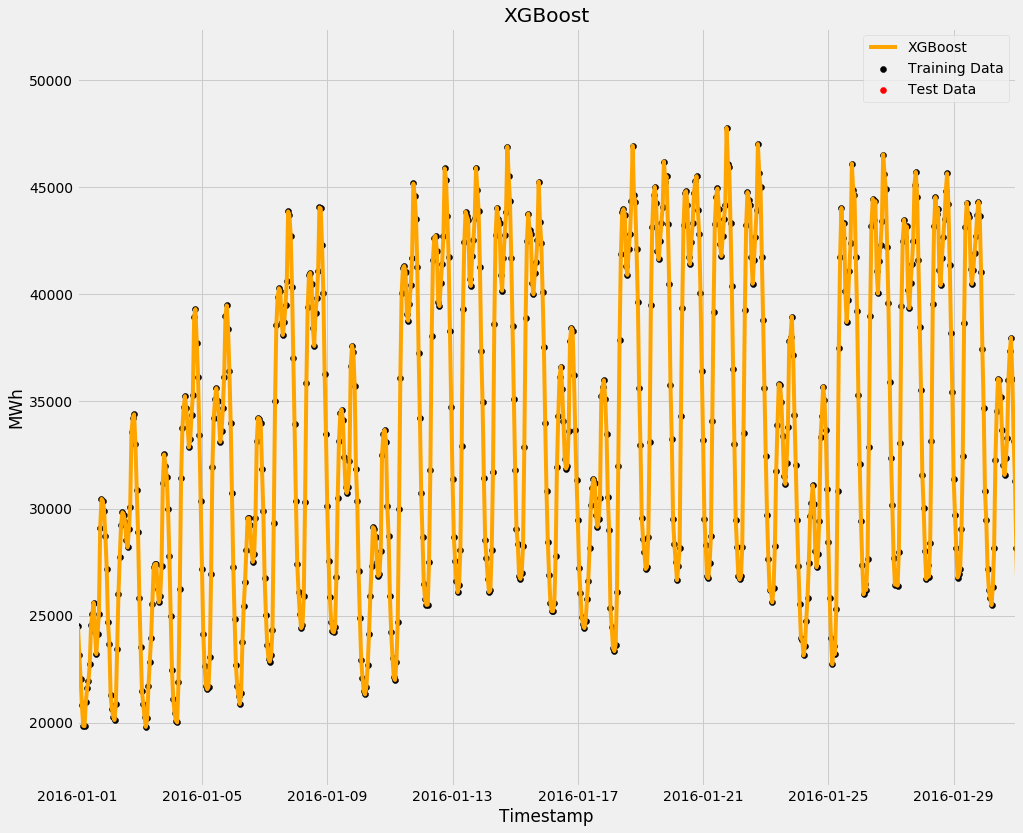

In [123]:
# Let's visually see the results
plt.scatter(x=train.index, y=train['Loads'], label='Training Data', color='black')
plt.scatter(x=test.index, y=test['Loads'], label='Test Data', color='red')
plt.plot(XGB_prediction_no_lag, label='XGBoost', color='orange')

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("MWh")
plt.legend(loc='best')
plt.title('XGBoost')

# For clarify,data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABCcAAANBCAYAAADTP9RtAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeVzVVeL/8TeCCKKCEZsLS4qkjpqJojZmqblSaopZTS4kqFimjoYm30q9ZTZlmgsaLuPM2KJWqOVSbomKElZjZSEVXDUBlQLMZJXfH/6401VcKrkfltfz8biP5HzO59zz+XD+4d1Z7HJyckoFAAAAAABgkFpGdwAAAAAAANRshBMAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBMAAFRT//rXv+Tm5qbQ0FBdvHix3DpRUVFyc3PTiy++eMW1/fv3KyoqSsHBwWrSpIk8PDwUGBio0NBQvfrqqzpx4sQV94wfP15ubm5Wn4YNG8rPz099+/bVypUrVVJSctOf9WZq06aN3NzcjO4GAAA1il1OTk6p0Z0AAAAV49FHH9WHH36o2bNna+LEiVbXNm7cqJEjR6pDhw7avn27HBwcJEm//PKLnnzySb3//vuqXbu2unbtqpYtW8rFxUXZ2dn67LPP9OWXX8rBwUGbN29W586dLW2OHz9eb731lvr37682bdpIkoqLi3Xy5Elt3bpVeXl5GjZsmN544w3bvYTfqU2bNjpx4oRycnKM7goAADWGg9EdAAAAFef1119XcnKyTCaT7r33XktgkJGRoUmTJsnFxUVvvPGGJZi4ePGiRo8erY8//lh33XWXli1bpqZNm17RbmpqqubNm6fc3Nxyv3fAgAF69NFHrcrS09N11113ad26dZo5c6b8/Pxu8tMCAICqimUdAABUY+7u7lq8eLEKCwsVGRmp/Px8lZaWKioqSj///LNeeOEFNWvWzFJ/w4YN+vjjj9WsWTOtW7eu3GBCkgIDA7VixQr17Nnzhvvi7++v5s2bS5Kys7OvuL53716FhYUpICBAnp6eateunaKjo3XmzJly28vKytK0adPUrl07eXp6KiAgQMOGDdO+ffuuqFtaWqr//Oc/6t27t5o1ayYvLy+1atVK999/v9asWSNJMpvNcnNzsyxX+e3SlAEDBtzwcwIAgN+PmRMAAFRz9913n8aMGaMVK1boueeek6+vr3bv3q2+fftq1KhRVnX/+c9/SpImTpwoFxeX67ZdNuPiRpw4cULfffed6tevr8DAQKtrq1ev1pQpU+Ts7KyBAwfK29tbhw4d0vLly/Xhhx9q69atVkGJ2WxWv379dOrUKd1111168MEHlZmZqfj4eO3YsUMLFizQiBEjLPWff/55LVy4UL6+vho0aJBcXV2VlZWlr776Sm+//bZGjhwpV1dXRUdHKzY2Vnl5eYqOjrbc7+vre8PPCQAAfj/2nAAAoAa4cOGCunfvrtTUVNWuXVuurq46cOCAPDw8LHVKSkrk4+OjwsJCff755woICPjd31PenhMlJSWWPSccHBz0+uuvW81EOH78uIKDg1W7dm3t2LFDLVu2tFwzmUx65ZVX1Lt3b61bt85S/uCDD2rXrl2aPn26pk+fbin/+uuv1atXL128eFGHDx9WkyZNJF2ateHs7Kzk5OQrQpfs7Gy5u7tbfmbPCQAAbI+ZEwAA1ADOzs565plnNGrUKBUWFmru3LlWwYQk/fTTTyosLJQk+fj4XNHG/v37tXfvXquyVq1aaeDAgVfU3bJli7Zs2WJV5uDgoNGjR6tTp05W5evWrVNhYaHGjRtnFUxI0rRp07R27Vp99NFHOnXqlBo1aqQff/xRu3btUqNGjTRlyhSr+q1bt1Z4eLiWLFmid955R3//+98lSbVq1VLt2rXLnenx22ACAAAYgz0nAACoAQoLC/Xqq69aft64ceMVdUpLrz2Z8sCBA5o3b57Vp7x2JGnJkiXKyclRTk6OsrOzdeTIEU2bNk0rVqzQfffdZ7WR5n//+19J0t13331FO3Xq1LGcBnLkyBGr/3bu3FmOjo5X3HPPPfdYtStJw4YN0/Hjx9WpUyc999xz2rZtm37++edrPi8AALAdwgkAAGqAOXPm6Msvv9SoUaPUuXNnbd68WW+99ZZVHXd3d9WuXVuSlJmZeUUb06ZNswQOmzdvvuHvtre3l6+vr6KjoxUWFqb09HTFxcVZrufl5UmSPD09y73fy8vLqt7vrS9JL7zwgl5++WW5urrq9ddf1/Dhw9WsWTMNHjxYX3755Q0/CwAAqBiEEwAAVHMJCQlasmSJmjdvrhdffFHLli1TvXr1FB0dbTmZQroUIgQHB0uSPvnkkwrpS4cOHSRJn332maWsQYMGkqTTp0+Xe09WVpZVvd9bX7r0bJGRkdq7d6++//57rV27VsOGDdOePXs0ePBg/fTTT3/msQAAwJ9EOAEAQDWWk5Oj8ePHq1atWnrjjTdUt25d+fv768UXX1ReXp6ioqKslnOUnd6xePFi/frrrxXSH8l6CUm7du0kXQpRLldQUKBDhw5Z1Wvbtq0k6dChQ5Y9Mn6rLFi54447yu3DLbfcogEDBmjZsmUaMmSIzp49q4MHD1qu29vbS7q0kScAALANwgkAAKqxqVOn6uTJk5o2bZruvPNOS/mIESPUr18/JSQkaOnSpZbysLAw9ejRQ6mpqRo+fLhOnjxZbru/3TPiRuXk5Gjt2rWSpL/+9a+W8mHDhsnR0VErV67UsWPHrO6ZP3++Tp06pd69e1s26WzcuLF69uypH3/8UQsXLrSq/80332jVqlWqU6eOhg0bJulSwLFnzx5dvHjRqm5paanOnDkjSXJycrKUl22Q+dtZJQAAoGJxlCgAANXUunXrFBkZqY4dO2rbtm2WGQFlzpw5o65du+rcuXPas2ePbr/9dknSuXPnFBUVpc2bN6t27dq666671LJlS9WtW1fZ2dn69ttvdejQITk4OGj27NkaP368pc2rHSV66tQpbdu2TT/99JPuvPNOffjhh3J2drbct3r1ak2ZMkV169bVoEGD5OXlpUOHDmn//v1q3Lixtm3bpqZNm1rqm81m9e3bVxkZGerWrZs6duyozMxMxcfH68KFC1q4cKFGjBgh6VIo4u/vryZNmqhjx45q2rSpioqKtG/fPn355ZcKDg7Wtm3bLCd5lB1f2qZNG/Xu3VtOTk5q2rSphg8fXjG/KAAAQDgBAEB1dPLkSXXt2lUlJSVKSEjQbbfdVm69rVu36uGHH1a7du20Y8cOy4aYkrR37169+eabSkpKUlZWlgoLC+Xm5qYWLVqoe/fuGj58uHx9fa3aKwsnLle/fn0FBgZq0KBBioyMtJqpUOaTTz7RokWLlJycrPPnz8vHx0d9+/bV1KlTy938MisrS6+88oq2bdumzMxMubi4qGPHjpo4caK6detmqVdUVKTY2FglJCTom2++0dmzZ+Xs7Cw/Pz8NHTpUo0ePlouLi6X+hQsX9Nxzz2nLli3KzMxUcXGx7rrrLn344YfXf/EAAOAPIZwAAAAAAACGYs8JAAAAAABgKMIJAAAAAABgKMIJAAAAAABgKMIJAAAAAABgKMIJAAAAAABgKMIJAAAAAABgKMIJAAAAAABgKMIJ2ExqaqrRXUANw5iDLTHeYGuMOdgS4w22xpireQgnAAAAAACAoQgnAAAAAACAoQgnAAAAAACAoQgnAAAAAACAoRyM7gAAAAAA1BTFxcU6f/680d2o9JycnJSbm2t0NyodBwcHubi4GN2NCkE4AQAAAAA2UFxcrHPnzsnNzU12dnZGd6dSq1OnjpycnIzuRqVz/vx5FRQUqE6dOkZ35aZjWQcAAAAA2MD58+cJJvCn1K1bV/n5+UZ3o0IQTgAAAACAjRBM4M+ozuOHcAIAAAAAABiKcAIAAAAAABiKcAIAAAAAABiKcAIAAAAAUK6LFy+qX79+Gj58uFX5r7/+quDgYE2ZMsVStm/fPg0fPlzNmjWTp6en2rVrpxEjRuiTTz6x1ElISJCbm5vl4+Pjo65du+qtt96y2TNJ0tq1a9W4cWObfieujXACAAAAAFCuWrVqKTY2VgkJCfr3v/9tKX/uuedUXFysOXPmSJJWr16tBx54QK6urlq1apWSkpIUFxenv/71r4qOjr6i3YMHDyolJUWJiYkaNmyYoqKi9Omnn9rsuVD5EE4AAAAAAK7K399fc+bM0TPPPKPjx4/rk08+0apVqxQbGysXFxedPHlS0dHRGjdunJYvX67u3bvL399fnTp1UmRkpBITE69o08PDQ15eXvL399ekSZPUsGFDHTlyxHK9oKBA06dPV2BgoLy8vNSrV68r2tm/f7969uwpLy8vBQYGasaMGSosLLS63qtXLzVu3Fi+vr7q2bOnjh49qoSEBE2YMMFytKubm5vmzp1bcS8QN8TB6A4AAAAAQE3m+qGbTb8vd0DO774nPDxcH3zwgcaOHasTJ05owoQJ6tKliyRp48aNKiws1FNPPVXuvdc6/vLixYvasmWLcnNzdeedd1rK58yZo82bN2vx4sXy9/fXkiVLNHToUB0+fFje3t46deqUwsLC9NBDD2np0qVKS0vTxIkTVatWLb3wwgsqLi7WI488oscee0xxcXEqKirSf//7X9nb2yskJERz587VnDlz9Pnnn0uSXFxcfvc7wc1FOAEAAAAAuK758+erffv2CggI0MyZMy3l33//vRo0aCAvLy9L2bZt2/T4449bfl6/fr26du1q+blt27aSLs2QKC0t1axZs9S+fXtJ0vnz57VmzRq9/vrr6tOnjyTptdde0969e7VixQrFxMRo5cqV8vLy0quvvqpatWopKChIzz33nCZPnqyZM2eqoKBAubm56tu3rwICAiRJLVq0sHx/gwYNZGdnZ9VnGItwAgAAAABwXf/5z3/k7OysU6dOKT09XUFBQVet261bNyUkJCgnJ0c9evRQSUmJ1fXNmzfLzc1NBQUFOnz4sKKjo1W/fn2NHDlSaWlpKioqUufOnS317e3t1alTJ3377beSpJSUFHXs2FG1av1vp4IuXbqosLBQP/zwg/7yl7/okUce0ZAhQ9S9e3fdfffdGjRokJo0aXKT3wpuFvacAAAAAABc02effaYFCxZozZo1uueeexQVFWUJHJo1a6a8vDxlZmZa6ru4uOi2226Tn59fue35+fnptttuU8uWLfW3v/1Nw4YN08svvyxJKi0tlVT+cpCystLS0qsuFykrX7p0qXbs2KGuXbtq69atCg4O1s6dO//gG0BFY+YEAAAAABjoj+wBYUv5+fkaN26cHnnkEd13331q27atOnfurIULF2rKlCkaOHCgnn/+ec2fP98SMPxe9vb2+vXXXyVJt912mxwdHZWYmCh/f39JUklJiZKSkjR06FBJ0u233673339fFy9etMyeSExMlKOjo2UZhyS1adNGbdq00aRJkzR06FC99dZb6tmzpxwdHa+YzQFjEU4AAAAAAK5q1qxZys/P1wsvvCBJ8vLy0iuvvKLx48erb9++atWqlebOnatp06YpJydHjz76qPz9/ZWTk6ONGzdKuhQ+/NaZM2dUXFysgoICffbZZ3rnnXf0wAMPSLo062LkyJGaNWuW3N3d5efnp6VLl+rMmTMaM2aMJOnxxx9XbGys/v73v2vcuHFKT0/XrFmzFBERobp16yo9PV3//Oc/1a9fP/n4+Cg9PV1ff/21wsPDJUm+vr7Kz8/X7t271bZtWzk7O6tu3bq2eqUoB+EEAAAAAKBc+/fv1xtvvKH4+HjVr1/fUj5kyBBt3rxZUVFR2rFjh8aMGaMWLVpoyZIlGj16tPLy8tSwYUMFBwfrrbfestoMU5JlPwkHBwc1btxYo0aN0vTp0y3XY2JiZG9vrwkTJig3N1dt27bVhg0b5O3tLUlq1KiR1q9fr2effVbdunWTq6urhg4dqmeffVaSVLduXX333XcaNWqUsrOz5enpqbCwME2aNEmSFBISovDwcD3++OP66aefFB0drRkzZlTou8S12eXk5JQa3QnUDKmpqQoMDDS6G6hBGHOwJcYbbI0xB1tivN0cubm5cnV1NbobVUJ+fr6cnJyM7kalVF3HERtiAgAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAAQxFOAAAAAAAMER4erhEjRvyue3r16qWYmJgK6hGM4mB0BwAAAAAAlZObm9s1rz/88MOKjY39w+2/9tprKi0t/V33rF+/Xg4OFf+n7PPPP68FCxZIkuzt7dWgQQMFBQWpX79+ioiIUN26dW+4rWPHjqlTp046cOCAWrVqVVFdrtIIJwAAAAAA5UpJSbH8e/v27Zo4caJVmZOTU7n3FRUVqXbt2tdt39XV9Xf3qWHDhr/7nj/qL3/5i959911dvHhRP//8sxITE/Xqq69q7dq12rp1q9zd3W3Wl+qOZR0AAAAAgHJ5eXlZPmVBwuVlx44dk5ubm+Lj49W/f395eXnprbfe0unTpzV69Gi1bNlSPj4+6tKli9atW2fV/uXLOnr16qUZM2Zo1qxZ8vf3V4sWLTR79myr2RWXL+to0aKFFixYoAkTJqhJkyZq3bq1li1bZvU93377rfr06SMvLy+FhIRo9+7dcnd317vvvnvN53dwcJCXl5d8fHzUqlUrPf744/roo4+UmZmpOXPmWOpt3bpVffr0ka+vrwICAhQWFqbvv/9ekpSfn69OnTpJkrp27So3NzcNGTJEknTo0CENHDhQAQEB8vX1Vb9+/fTZZ5/d8O+nOiGcAAAAAIAqxGw2KyIiQqGhoYqIiJDZbDa6S5IuLYOIiorSoUOHdN999+nChQsKDg7WO++8o8TERIWHh2v8+PFKTEy8Zjtr165VgwYNtHPnTplMJi1YsEAffPDBNe9ZtGiROnTooL1792rcuHGaPn26vvjiC0lScXGxHnnkEdWrV087d+7UggULNHv2bF28ePEPPWeTJk00ePBgbdq0yVJ24cIFPfnkk9qzZ482btyo2rVr6+GHH1ZxcbGcnJy0detWSdIHH3yglJQUrVy5UpJ0/vx5/e1vf9P27dv18ccfKygoSGFhYcrNzf1DfavKWNYBAAAAAFWE2WzWoEGDlJaWZilLTk5WfHy8/Pz8DOyZNGHCBIWGhl5RViYiIkK7d+/We++9py5duly1nbZt22ry5MlycnJSs2bNtHr1au3du1f333//Ve/p06ePwsPDJUlPPvmkli1bpoSEBN1xxx3avn27Tpw4oe3bt8vDw0PSpSBl4MCBf/hZg4KCtGbNGuXl5alBgwZ68MEHra4vXbpU/v7++vLLL9W+fXvL8o9bbrlFXl5elno9evSwum/+/PmKj4/Xnj17/lT/qiJmTgAAAABAFWEymayCCUlKS0uTyWQyqEf/0759e6ufi4uL9dJLL6lr167y9/dX48aN9dFHH+nEiRPXbKd169ZWP3t7e+vMmTN/+J7U1FT5+vpagglJCg4Ovu7zXEvZMhM7OztJ0nfffafRo0erXbt2atq0qaU/13vWzMxMPfnkk7rzzjvl6+urpk2bKjc397r3VUfMnAAAAACAKiIjI6Pc8szMTBv35EqXn17xyiuvaMWKFZo7d65uv/12ubi4aObMmSosLLxmO5dvpGlnZ6eSkpLffU/Zso3S0lJLiHCzpKSkyN3dXfXr11dpaamGDh2qwMBAvf766/L29pYkde7cWUVFRddsZ8yYMbpw4YLmzZunJk2aqE6dOurbt+9176uOCCcAAAAAoIrw8fEpt7zsD+LK5ODBgwoNDVVYWJgk6eLFi/r+++/VtGlTm/ajRYsWOn78uM6ePatbb71VknT48OE/3N7JkycVHx+voUOHSroUGKWnp+uNN96wbHx56NAhq008HR0dJckqZCktLdWhQ4cUGxur++67T5L0448/XneWSHXFsg4AAAAAqCJiYmIUEBBgVRYQEGB1ekVl0bx5c+3cuVNJSUlKSUnRpEmTDJnh0adPHzVp0kTjx4/XV199pYMHD2rWrFmys7O77oyK4uJiZWVlKTMzU0ePHtXKlSvVu3dveXt7a+bMmZIkDw8Pubq6avXq1frhhx/0ySefaPr06VZte3l5ydHRUTt37tSZM2eUl5cnOzs7NWvWTG+//baOHTum5ORkjRkzRs7OzhX6PiorwgkAAAAAqCL8/PwUHx+vsLAwdevWTWFhYZViM8zyzJgxQ61bt9bgwYMVGhoqDw8PPfDAAzbvh4ODg958803l5uaqR48emjhxop5++mlJUp06da5571dffaWgoCC1bt1a/fv317p16xQZGWk5ilS6tKRk1apV+uyzz9SlSxfNmDFDzz//vGrV+t+f287OznrxxRcVFxenoKAgjR49WpK0bNkynT17Vt26dVNkZKQiIiKsNsysSexycnJKr18N+PNSU1MVGBhodDdQgzDmYEuMN9gaYw62xHi7OXJzc+Xq6mp0N6qE/Px8OTk5VVj7ycnJ6tWrlxITE9WyZcsK+56KUF3HEXtOAAAAAACqtfj4eLm5uSkgIEDp6emaMWOGOnToUOWCieqMcAIAAAAAUK3l5eVp1qxZOnXqlG655RbdfffdeuGFF4zuFn7DsD0n5s6dKzc3N6tPixYtLNdLS0stR854e3trwIAB+uabb6zayMnJUWRkpHx9feXr66vIyEjl5ORY1fn666/Vv39/eXt7q2XLlpo3b57VrqmStHHjRoWEhMjT01MhISHavHlzxT04AAAAAMCmRowYoc8//1xZWVn65ptvtHz5csvJHagcDN0QMzAwUCkpKZbPgQMHLNcWLlyoJUuWaN68edq1a5c8PDw0ePBgnTt3zlJnzJgxOnLkiNavX68NGzboyJEjGjt2rOV6Xl6eBg8eLE9PT+3atUsvvfSSFi1apMWLF1vqJCUlKTw8XGFhYUpISFBYWJhGjRql5ORk27wEAAAAAABqOEOXdTg4OJS7E2lpaaliY2M1adIkDRw4UJIUGxurwMBAbdiwQaNHj1ZKSop27Nihbdu2KSQkRJL02muvqV+/fpYNe9avX68LFy4oNjZWzs7OatWqlY4dO6alS5fqiSeekJ2dnWJjY9WtWzdNnTpVkhQUFKSEhATFxsZq5cqVtnsZAAAAAADUUIbOnEhPT1fLli3Vtm1bhYeHKz09XZJkNpuVlZWlHj16WOo6Ozura9euOnTokKRLMx7q1atnCSYkqXPnznJxcbGq06VLF6tzYnv27KmMjAyZzWZJ0qeffmr1PWV1ytoAAAAAAAAVy7CZE8HBwVq6dKkCAwN19uxZ/eMf/1Dv3r118OBBZWVlSZI8PDys7vHw8FBGRoYk6fTp03J3d5ednZ3lup2dnW699VadPn3aUqdRo0ZXtFF2zd/fX1lZWeV+T1kb15Kamvo7nxq8M9gaYw62xHiDrTHmYEuMtz/PyclJderUMbobVUZ+fr7RXaiU8vLyyv17taof92tYOHHfffdZ/RwcHKw77rhDb775pjp27ChJVsGDdGm5x+VhxOWuV6dsM8zr1Smv7ctV9V++rXE+NmyNMQdbYrzB1hhzsCXG282Rm5srJycno7tRJeTn5/OurqJBgwZq2rSp0d246Qxd1vFb9erV0+23364ffvjBsg/F5WnQ2bNnLbMcPD09dfbsWauTN0pLS5WdnW1Vp7w2pP/NoPDy8rrm9wAAAAAAgIpVacKJ/Px8paamysvLS35+fvLy8tLu3butricmJlr2mOjUqZN++eUXJSUlWeokJSXp/PnzVnUSExOtpgPt3r1bPj4+8vPzkyR17NjR6nvK6vx2LwsAAAAAAFBxDAsnYmJitG/fPqWnpys5OVkjR47Ur7/+qocfflh2dnYaP368FixYoE2bNuno0aOKioqSi4uLhg4dKunSqRq9evXS5MmT9emnnyopKUmTJ09Wnz59LFPOhg4dKmdnZ0VFReno0aPatGmTFixYoKioKMuyjXHjxmnv3r2aP3++jh07pvnz5yshIUHjx4836tUAAAAAQKXg5uZ2zc/N+Lvp2LFjcnNz09GjR69ZLz8/3+q7fXx81L59e0VGRlr9T+sbFR4erhEjRvzRbuMmM2zPiVOnTmnMmDHKzs7WrbfequDgYH388cfy9fWVJD311FO6cOGCpk2bppycHHXo0EHvvfee6tevb2kjLi5O0dHRevDBByVJ/fr108svv2y57urqqvfff19Tp07VvffeKzc3N02YMEFPPPGEpU5ISIhWrVolk8mkuXPnKiAgQKtWrVJwcLCN3gQAAAAAVE4pKSmWf2/fvl0TJ060KjNiX4jly5frnnvuUX5+vtLT0/Wf//xHffv21dy5czV27Fib9wc3h11OTk7p9asBfx4bKcHWGHOwJcYbbI0xB1tivN0cubm5cnV1Nbobf9jGjRs1cuRI5eTkXHHt+PHj+r//+z/t3r1b9vb2CgkJ0UsvvSR/f39JUnp6uqKjo3Xw4EEVFRWpadOmmjlzpnr37i1vb2+rtnr27Km1a9deEXzk5+fL29tbb7/9tvr27Wt17ZlnnlFcXJwOHz4sX19fFRQUaPLkyUpISNCZM2fUuHFjhYeHW2bRP//881qwYIFVGx9//LE6duyoZ555Rtu2bdOpU6fk6empsLAwRUdHy9HR8Sa8xT+vqo+jqzFs5gQAAAAA4PezM5vlZDKpVkaGLvr4KD8mRqX/f089I5w7d06hoaG69957tXXrVjk4OGj+/PkaPHiwDh48qDp16mjSpElydHTUli1b5OLiomPHjsnR0VFOTk7aunWr+vXrpw8++ECBgYF/6LjVJ598UkuXLtW2bdsUGRmp4uJi+fr66l//+pcaNmyo5ORkTZo0SR4eHho2bJimTp2qY8eOqaSkRK+//rok6ZZbbpF06TSMZcuWycvLS0ePHtXkyZPl7OysqVOn3tT3BmuEEwAAAABQRdiZzXIZNEj2aWmWMvvkZJ2PjzcsoHjnnXfk4uKihQsXWsoWL7iGEdQAACAASURBVF6sgIAA7dy5U/3799eJEyf02GOPqXXr1pJkmVEhSe7u7pIuhQNlJzf+9lCDG+Hj46MGDRooPT1dkuTi4qLp06dbrvv7+ys5OVnvvvuuhg0bpnr16snJyUnFxcWW7yzz2/v8/PyUlpamf//734QTFYxwAgAAAACqCCeTySqYkCT7tDQ5mUy6EBdnSJ+++OILHTt2TI0bN7Yq//XXX5X2//s6fvx4TZ8+XVu3btXdd9+t+++/X23btr3pfSk7+EC6tDfFm2++qZMnTyo/P19FRUVq3rz5ddvYsGGD3njjDaWnp+v8+fMqLi6uNEs6qrNKc5QoAAAAAODaamVklF+emWnjnvzPxYsXFRwcrISEBKvP4cOH9eijj0qSxowZo88//1wPPfSQUlJS1LNnT7322ms3rQ+nTp1SXl6eZUbGm2++qeeff14jR47Ue++9p4SEBI0YMUJFRUXXbGffvn0aO3as+vXrp3feeUd79+7V008/rcLCwpvWV5SPmRMAAAAAUEVc9PEpv/yyTSVtqV27dtq+fbs8PDysTle8XNOmTRUeHq7w8HC99NJL+uc//6nJkydbZiWUlJT84T4sWrRIjo6Olo0yDx48qC5duig8PNxS5/vvv7e6p3bt2iooKLAqO3jwoAICAjR58mRL2fHjx/9wv3DjmDkBAAAAAFVEfkyMSgICrMpKAgKUHxNjUI+khx9+WPXq1dOjjz6qAwcOKD09Xfv27VN0dLTlD/tp06Zp165dSk9P1xdffKE9e/bo9ttvlyR5eXnJ0dFRO3fu1JkzZ5SXl3fN78vNzVVWVpaOHz+uTz75RJGRkVq2bJnmzJmjpk2bSpKaN2+u5ORk7d69W999951MJpMOHz5s1Y6vr6+++uorff/998rOzlZxcbGaN28us9ms999/X2lpaVq2bJk2bdpUAW8NlyOcAAAAAIAqotTPT+fj41UYFqbibt1UGBZm6GaY0qXTLbZt2yZvb2899thjCgkJ0YQJE3ThwgU1aNBAklRUVKQpU6YoJCREQ4cOVdOmTbVo0SJJkrOzs1588UXFxcUpKChIo0ePvub3jR07VkFBQerUqZOeeuopSdK2bds0duxYS53IyEj1799fI0eOVM+ePXX27FlFRkZatfP444/Lz89Pd999t5o1a6bPP/9cAwcOVGRkpP7+97+rW7duOnjwoKKjo2/m68JV2OXk5JQa3QnUDJyPDVtjzMGWGG+wNcYcbInxdnPk5ubK1dXV6G5UCfn5+XJycjK6G5VSdR1HzJwAAAAAAACGIpwAAAAAAACGIpwAAAAAAACGIpwAAAAAAACGIpwAAAAAAACGIpwAAAAAAACGIpwAAAAAABtwcHDQ+fPnVVpaanRXUEUVFhaqVq3q+We8g9EdAAAAAICawMXFRQUFBcrLyzO6K5VeXl6eGjRoYHQ3Kp1atWqpXr16RnejQhBOAAAAAICN1KlTR3Xq1DG6G5Xe6dOn1bRpU6O7ARuqnvNBAAAAAABAlUE4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADEU4AQAAAAAADFVpwolXX31Vbm5umjZtmqVs/PjxcnNzs/r06tXL6r6CggJNmzZNt912mxo1aqThw4frxx9/tKpz4sQJPfTQQ2rUqJFuu+02Pf300yosLLSqs2/fPnXv3l1eXl5q166dVq1aVXEPCwAAAAAALCpFOPHpp59qzZo1at269RXX7rnnHqWkpFg+69evt7o+Y8YMbd68WStXrtSWLVt07tw5PfTQQyopKZEklZSU6KGHHtIvv/yiLVu2aOXKldq0aZNmzpxpaSM9PV3Dhg1Tp06dtHfvXk2ZMkVPP/20Nm7cWLEPDgAAAAAA5GB0B3JzcxUREaFFixbp5ZdfvuJ6nTp15OXlddV7//3vf2vJkiW69957JUnLly9XmzZttGfPHvXs2VO7du3SN998oy+//FJNmjSRJM2aNUsTJ07U//3f/6lBgwZavXq1vL299Y9//EOSFBQUpOTkZC1evFgDBw6soCcHAAAAAABSJZg5MWnSJA0cOFDdu3cv93piYqKaN2+uDh06aOLEiTpz5ozl2hdffKGioiL16NHDUtakSRMFBQXp0KFDkqSkpCQFBQVZgglJ6tmzpwoKCvTFF19Y6vy2jbI6n3/+uYqKim7aswIAAAAAgCsZOnNizZo1+uGHH7R8+fJyr/fq1Uv333+//Pz8dPz4cZlMJj3wwAPas2eP6tSpo9OnT8ve3l7u7u5W93l4eOj06dOSpNOnT8vDw8Pquru7u+zt7a3q3HPPPVe0UVxcrOzsbHl7e5fbv9TU1D/y2DUa7wy2xpiDLTHeYGuMOdgS4w22xpj7fQIDA43uwp9iWDiRmpqq2bNna+vWrXJ0dCy3zpAhQyz/bt26te644w61adNG27dv1wMPPHDVtktLS2VnZ2f5+bf//q1r1SktLb3mvVLV/+XbWmpqKu8MNsWYgy0x3mBrjDnYEuMNtsaYq3kMW9aRlJSk7OxsdenSRe7u7nJ3d9f+/fu1YsUKubu7q6Cg4Ip7fHx81KhRI/3www+SJE9PT5WUlCg7O9uq3tmzZy2zJTw9PS0zJMpkZ2erpKTkmnXOnj0rBwcH3XLLLTftmQEAAAAAwJUMCycGDBigAwcOKCEhwfJp3769hgwZooSEhHJnU2RnZysjI8OyQeYdd9yh2rVra/fu3ZY6P/74o1JSUhQSEiJJ6tSpk1JSUqyOF929e7fq1KmjO+64w1Jnz549Vt+1e/dutW/fXrVr177Zjw4AAAAAAH7DsGUdbm5ucnNzsyqrW7euGjZsqFatWumXX37RSy+9pAceeEBeXl46fvy4Zs+eLQ8PD4WGhkqSXF1d9dhjj+nZZ5+Vh4eHGjZsqJkzZ6p169aWPSR69Oihli1baty4cTKZTPr555/17LPPasSIEWrQoIEkafTo0YqLi9P06dM1evRoHTp0SG+++aZWrFhh03cCAAAAAEBNZPhRoldjb2+vo0eP6u2331Zubq68vLzUrVs3rV69WvXr17fUe/HFF2Vvb6/Ro0crPz9fd999t5YtWyZ7e3tLO++8846mTp2qvn37ysnJSUOHDpXJZLK04e/vr3Xr1umZZ57RqlWr5O3trXnz5nGMKAAAAAAANmCXk5NTanQnUDOwqQ1sjTEHW2K8wdYYc7AlxhtsjTFX8xi25wQAAAAAAIBEOAEAAAAAAAxGOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOAEAAAAAAAxFOIErmM1mRUREKDQ0VBERETKbzUZ3CQAAAABQjTkY3QFULmazWYMGDVJaWpqlLDk5WfHx8fLz8zOwZwAAAACA6oqZE7BiMpmsgglJSktLk8lkMqhHAAAAAIDqjnACVjIyMsotz8zMtHFPAAAAAAA1BeEErPj4+JRb7u3tbeOeAAAAAABqCsIJWImJiVFAQIBVWUBAgGJiYgzqEQAAAACgumNDTFjx8/NTfHy8TCaTMjMz5e3trZiYGDbDBAAAAABUGMIJXMHPz09xcXFGdwMAAAAAUEOwrAMAAAAAABiKcAIAAAAAABiKcAIAAAAAABiKcAIAAAAAABiKcKIKMZvNioiIUGhoqCIiImQ2m43uEgAAAAAAfxqndVQRZrNZgwYNUlpamqUsOTlZ8fHxHPMJAAAAAKjSmDlRRZhMJqtgQpLS0tJkMpkM6hEAAAAAADcH4UQVkZGRUW55ZmamjXsCAAAAAMDNRThRRfj4+JRb7u3tbeOeAAAAAABwcxFOVBExMTEKCAiwKgsICFBMTIxBPQIAAAAA4OYgnKgi/Pz8FB8fr7CwMHXr1k1hYWE22wyTU0IAAAAAABWJ0zqqED8/P8XFxdn0OzklBAAAAABQ0Zg5UYXZYkYDp4QAAAAAACoaMyeqKFvNaOCUEAAAAABARWPmRBVlqxkNnBICAAAAAKhohBNVlK1mNHBKCAAAAACgorGso4qy1YyGslNCTCaTMjMz5e3trZiYGDbDBAAAAADcNIQTVVRMTIySk5OtlnZU1IwGI04JAQAAAADUHIQTVRQzGgAAAAAA1QXhRBXGjAYAAAAAQHXAhpgAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBMAAAAAAMBQhBPVhNlsVkREhEJDQxURESGz2Wx0lwAAAAAAuCGc1lENmM1mDRo0SGlpaZay5ORkxcfH3/DRomazWSaTSRkZGfLx8eFYUgAAAACAzRBOVAMmk8kqmJCktLQ0mUymGzpq9GaEGwAAAAAA/FEs66gGMjIyyi3PzMy8ofuvFW4AAAAAAFDRCCeqAR8fn3LLvb29b+j+PxtuAAAAAADwZxBOVAMxMTEKCAiwKgsICFBMTMwN3f9nww0AAAAAAP4MwolqwM/PT/Hx8QoLC1O3bt0UFhb2u/aL+LPhBgAAAAAAfwYbYlZyN3qKhp+f3w1tflmesnDDZDIpMzNT3t7enNYBAAAAALAZwolKzJanaPyZcAMAAAAAgD+DZR2VGKdoAAAAAABqAsKJSqwynqJhNpsVERGh0NBQRUREyGw2G9YXAAAAAED1wLKOSqyynaJhy2UmAAAAAICag5kTlVhlO0WDZSYAAAAAgIrAzIlKrLKdolEZl5kAAAAAAKo+wolKrjKdolHZlpkAAAAAAKoHlnXghlW2ZSYAAAAAgOqBmRO4YZVtmQkAAAAAoHognMDvUpmWmQAAAAAAqgeWdQAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAEMRTgAAAAAAAENVmnDi1VdflZubm6ZNm2YpKy0t1dy5c3X77bfL29tbAwYM0DfffGN1X05OjiIjI+Xr6ytfX19FRkYqJyfHqs7XX3+t/v37y9vbWy1bttS8efNUWlpqVWfjxo0KCQmRp6enQkJCtHnz5op7WAAAAAAAYFEpwolPP/1Ua9asUevWra3KFy5cqCVLlmjevHnatWuXPDw8NHjwYJ07d85SZ8yYMTpy5IjWr1+vDRs26MiRIxo7dqzlel5engYPHixPT0/t2rVLL730khYtWqTFixdb6iQlJSk8PFxhYWFKSEhQWFiYRo0apeTk5Ip/eAAAAAAAajjDw4nc3FxFRERo0aJFcnNzs5SXlpYqNjZWkyZN0sCBA9WqVSvFxsbql19+0YYNGyRJKSkp2rFjhxYsWKCQkBB16tRJr732mrZv367U1FRJ0vr163XhwgXFxsaqVatWGjhwoJ566iktXbrUMnsiNjZW3bp109SpUxUUFKSpU6fqr3/9q2JjY23/QgAAAAAAqGEMDyfKwofu3btblZvNZmVlZalHjx6WMmdnZ3Xt2lWHDh2SdGnGQ7169RQSEmKp07lzZ7m4uFjV6dKli5ydnS11evbsqYyMDJnNZkmXZm789nvK6pS1UV2ZzWZFREQoNDRUERERlvcBAAAAADBQSb5UlHP9etWIg5FfvmbNGv3www9avnz5FdeysrIkSR4eHlblHh4eysjIkCSdPn1a7u7usrOzs1y3s7PTrbfeqtOnT1vqNGrU6Io2yq75+/srKyur3O8pa+NqymZnVEU//vijnnjiCZ08edJSlpiYqMWLF6tx48YV9r1V+Z2hamLMwZYYb7A1xhxsifEGW6upY65u/rdq/uMUOZac0WnXITruNf2G7gsMDKzgnlUsw8KJ1NRUzZ49W1u3bpWjo+NV6/02eJAuLfe4PIy43PXqlC3nuF6d8tr+rar8y3/55ZetgglJOnnypNauXau4uLgK+c7U1NQq/c5Q9TDmYEuMN9gaYw62xHiDrdXkMef82Vw5lpyRJHnmvivn9s/ookszg3tV8Qxb1pGUlKTs7Gx16dJF7u7ucnd31/79+7VixQq5u7vrlltukaQrZi+cPXvWMsvB09NTZ8+etTp5o7S0VNnZ2VZ1ymtD+t8MCi8vr2t+T3VUNvvkcpmZmTbuCQAAAACgjP35Y1Y/2104YVBPbMuwcGLAgAE6cOCAEhISLJ/27dtryJAhSkhIUPPmzeXl5aXdu3db7snPz1diYqJlj4lOnTrpl19+UVJSkqVOUlKSzp8/b1UnMTFR+fn5ljq7d++Wj4+P/Pz8JEkdO3a0+p6yOr/dy6K68fHxKbfc29vbxj0BAAAAAJSxKzhr/fPFIoN6YluGhRNubm5q1aqV1adu3bpq2LChWrVqJTs7O40fP14LFizQpk2bdPToUUVFRcnFxUVDhw6VJAUFBalXr16aPHmyPv30UyUlJWny5Mnq06ePZQrQ0KFD5ezsrKioKB09elSbNm3SggULFBUVZVm2MW7cOO3du1fz58/XsWPHNH/+fCUkJGj8+PFGvZ4KFxMTo4CAAKuygIAAxcTEGNQjAAAAAKjhSktlV5htXXax0Ji+2JihG2Jez1NPPaULFy5o2rRpysnJUYcOHfTee++pfv36ljpxcXGKjo7Wgw8+KEnq16+fXn75Zct1V1dXvf/++5o6daruvfdeubm5acKECXriiScsdUJCQrRq1SqZTCbNnTtXAQEBWrVqlYKDg233sDbm5+en+Ph4mUwmZWZmytvbWzExMZbZJAAAAAAAGyvOlV3pZTMlSouN6YuN2eXk5JRevxrw59XkTW1gDMYcbInxBltjzMGWGG+wtZo65mr98p3qf2L9P8l/vSNORY3DDOqR7Ri2rAMAAAAAAPyPXeHZKwsvn0lRTRFO1DBms1kREREKDQ1VRESEzGaz0V0CAAAAAOgq4UQN2RCzUu85gZvLbDZr0KBBSktLs5QlJycrPj6evSYAAAAAwGDlhROc1oFqx2QyWQUTkpSWliaTyWRQjwAAAAAAZWoVlLeso2ac1kE4UYNkZGSUW56ZmWnjngAAAAAALmdXeObKwos147QOwokaxMfHp9xyb29vG/cEAAAAAHA5u8LsK8suMnMC1UxMTIwCAgKsygICAhQTE2NQjwAAAAAAZWryaR1siFmD+Pn5KT4+XiaTSZmZmfL29lZMTAybYQIAAABAJVCroLxlHYQTqKLMZrNMJpMyMjLk4+NjFUD4+fkpLi7O4B4CAAAAAC5X7rIOZk6gKuK4UAAAAACogkpLy1/WwZ4TqIo4LhQAAAAAqqDiXNmVlnMyB6d1oCriuFAAAAAAqHpqFZQza0KSXSkzJ1AFcVwoAAAAAFQ95S7pkGrMhpiEE9UMx4UCAAAAQNVjV1jOSR0SR4miauK4UAAAAACoeso7qUOS7GrIzAnCiWqI40IBAAAAoGq52p4TnNYBAAAAAABs4urLOjitAwAAAAAA2MDVl3UwcwIAAAAAAFSAOqmvqP5Ht8nlQB/ZXTh59dM6asiGmIQT1ZzZbFZERIRCQ0MVEREhs9lsdJcAAAAAoEardf57OR0zqVbRT3L4+ZCcjs1VrYKrLOtgQ0xUdWazWYMGDVJaWpqlLDk5WfHx8ZzeAQAAAAAGqZX3tdXPDmd2XrVuTTmtg5kT1ZjJZLIKJiQpLS1NJpPJoB4BAAAAAOyKcqx+rlWQqVoFmeVXZlkHqrqMjIxyyzMzrzLoAQAAAAAVzq7opxuvzMwJVHX/j703j3LjqtP+n1slqdXuxXvc7TgonZCdxSGJl4CDISEwQweapcMQZhgSRgOZzBvO/Mg7bIIfi4YfkHeYeQ9hSwOBYRiGNMx0MIGBAZIhJnaSDiH74iRtOXa6baftuN3tVmup+/tDraVuVUkltZaS9HzO4eAq3SrdVqSS7ree7/P09/fb7u/r66vzTAghhBBCCCGEZNESR12PZVoHaXoikQgGBgZM+wYGBhCJRBo0I0IIIYQQQgghZSknZKp2E/EQNMRsYUKhEMbGxhCNRjE1NYW+vj5EIhGaYRJCCCGkKdCP7Ib/4O1IrdmO1NpLGz0dQgipGqIM5QTaRDnB4kSLEwqFMDIy0uhpEEIIIYSUhXb8CXTvehMAIPDsVzG3+T+RXvPaBs+KEEKqg0iWUZygISYhhBBCCCGNwT/1s9y/BQx03feuBs6GEEKqSznFCUaJElKCWCyGcDiMwcFBhMNhxGKxRk+JEEIIIS2CfvRe07Yw4tDmnm3QbAghpLqU1dbRJsoJtnWQiojFYhgaGsLExERu3/j4OMbGxuhpQQghhJAlIwOrLPsC+76H+DmfacBsCCGkikhZliGmMBKAlIAQNZxU46FyglRENBo1FSYAYGJiAtFotEEzIoQQQkgrIZIvWvb59/+gbYzhCCEtjDEPYSyUd4xM12YuHoLFCVIRk5OTtvunpqbqPBNCCCGEtCJ2xQkt8QL8U7c3YDaEEFI9RKKMGNEssvULsyxOkIro7++33d/X11fnmRDSvtD3hRDSyjiZxQX23VLnmRBCSHUpK6kjSxuYYtJzglREJBLB+Pi4qbVjYGAAkUikgbMipH2g7wshpNWxU04AgG/6d9DmnoHRdXqdZ0QIsUPEYghGo9AmJ2H09yMeiUDyt0hRVDNMw78KmuJBIfUuiPRc/hgjCVmX2TUOFidIRYRCIYyNjSEajWJqagp9fX2IRCJcFBFSJ4r5voyMjDRoVoQQUiWkLHpnMbDvu4if87k6TogQYoeIxdA1NAS94DeJvmsX0q94BbSZGRYrHFCvb+lVm4FjD0OL789sd58FkXzRVJxoh8QOFidIxYRCIS6CCGkQ9H0hhLQ06RMZd3oH/M99H/EzPgr4uuo4KUKISjAaNRUmAEDfvx/6/v357fFxzI2NsUBRgFqckP7VOPHKr6HzsY8CAOZf9mUs++NfmQ9qAzNgek4QQkgTQt8XQkgro7Z0SF8vDP/K3LaWfBGB/T+s97QIIQqaw82SQvSJCQSZ6GdCUwwxZWAV0msuwewld2P2kruRXrUFUvhNY4RM1XOKDYHFCUIIaUIikQgGBgZM++j7QghpFdS7ikbwZCReco1pX2Dv1wFp1HNahBAFw+FmiYpGZacJq3JipXWQFjBvUzlBCCHEi2R9X4aHh7Ft2zYMDw/TDJMQ0jJYlBP+FUic+lemO4n63DPwHfpVvadGCCkgHokgrdwsscOgstOEGiVqBFbZDFIcGJjWQQghxKvQ94UQ0qpY7ioGVkAG+5Fc/zYEDtya298x8TWk1r2p3tMjhCwiQyHMjY1l0jqmpmB0d0N/+GGT50R6YABxKjtNWJUTKyxjpKKcEDTEJIQQ0izEYjFEo1FMTk6iv7+fCTqEkKZFjdnL/nBfGPgbU3HCN/07aDMPw+h9eV3nRwjJI0MhzBfcLMlFi05NwejrY1qHDa7aOhTPCSonCCGENAWxWAxDQ0OmeNHx8XG2ehBCmhKRPGbazv5wN5ZvRGrVxfAduTv3WMfE1zH/yq/VdX6EEGfUYgWxYinA2rV1aGpxgp4ThBBCmoBoNGoqTADAxMQEonTHJoQ0IcXuKi4M/I3pMf/z/wkYre9iTwhpHdwoJ6TGtA5CCCFNyKRDlNcU3bEJIU1IsX7s1Lo/gfT15sca8xAps9KCEEI8i5QWQ0xb5YRgWgchhJAmpN8hyquP7tiEkCbEmtZRcFdR6JD+XvMBqeN1mBUhhFSB9JzJ3FJqQUDvtI7TFAeGNjDEZHGCEEJagEgkggElymtgYAARumMTQpoQa1qHWfIs9R7z+NRczedECCHVwJVqAjZpHTTEJIQQ0gyE1Osd0AAAIABJREFUQiGMjY0hGo1iamoKfX19TOsghDQtmkNaR27b12XaFmkWJwghzYGbGNHMQKZ1EEIIaVJCoRBG6I5NCGkBirZ1AICuFCeonCCENAmuYkQBa1qHpOcEIYQQQgghdaXUj3fp6zYfQM8JQkiTYFGGObR1qMoJ0QapRCxOEEIIIYQQ7yDTEKkZ8y7FAJNtHYQ0ByIWQ2c4jK7BQXSGwxCxWKOn1HDcKidUz4l2SOtgWwchhBBCCPEMImmOBZW+5YDQzft0s3KCbR2EeA8Ri6FraAj6xERunz4+jrmxMcg29sRSDTENJ+UE0zqIF4jFYgiHwxgcHEQ4HEaMFUZCCCGEtAmuzOIU5QSonCDEcwSjUVNhAgD0iQkEo9EGzcgbuPacEEzrIA0mFothaGgIEwUf5PHxcYyNjdF1nxBCCCEtj2qGaQSsP9xVzwlBzwlCPIc2OWm/f2qqzjPxFiKpRIk6tnWohpitX5ygcsJjRKNRU2ECACYmJhBt8wojIYQQQtoDYYkRtSlOqGkdVE4Q4jmM/n77/X19dZ6Jt7Bc42wKsACsaR1t4DnB4oTHmHSoME61eYWREEIIIe2Bm7YOq3KCxQlCvEY8EkF6YMC0Lz0wgHgk0qAZeQP3bR2qcqL10zrY1uEx+h0qjH1tXmEkhBBCSHugtnXY/nBXlBNIzdZwRoSQSpChEObGxhCMRqFNTcHo60M8EmlrM0zATjlhb4iptnWINlBOsDjhMSKRCMbHx02tHQMDA4i0eYWREEIIIe2Bm7uKFuUE2zoI8SQyFML8yEijp+EpKlZO0BCT1JtQKISxsTFEo1FMTU2hr68PkUiEZpiEEEIIaQtctXWonhNUThBCmgEp3RcnNHNaRzsYYrI44UFCoRBGWGEkhBBCSBtiaesI2EWJmpUTjBIlhDQFqeMQBd4RUl8G6EHboVKYl+rtECVKQ0xCCCGEEOIZrGkdbgwxqZwghHgfa4yovd8EAKtygsUJQgghzUgsFkM4HMbg4CDC4TBisVijp0QIIa4QyWOmbVdRokzrIIQ0Aa6UYVnY1kEIIaTZicViGBoaMhnrjo+PY2xsjP41hBDP484QUylOsK2DkPoiJfyT/wGxcBiJDe8G/MsbPaOmQEuoygkHvwnYtXW0floHlROEENJiRKNRU2ECACYmJhCNRhs0I0IIcY8bQ0zoiudEahaQsoazIoQU0vH0jVj2wPvR+dhH0b37zfz8ucR6fSujraPAq6JVYXGCEEJajMnJSdv9U1NTdZ4JIYSUiZQ2smebO4uaD1LLm8gJGIAxX+vZEUIW8U/elvu3PvMItBN7GzeZJkL11DHsrm9ZNDVKlMoJQgghTUZ/f7/t/r6+vjrPhBBCysSYhzAWcptS6wC0TtuhltYO+k4QUjdE6rh5h7pNbCnHEFMKc3GCaR2EEEKajkgkgoGBAdO+gYEBRCKRBs2IEELcYZvUIYT9YMUUk3GihNQR5S5+O/ghVAM3njo5VOUEDTEJIYQ0G6FQCGNjY4hGo5iamkJfXx8ikQjNMAkhnsfS0lHMLM4mTpRd74TUiQKFk+02sUWohphF2zraL0qUxQlCCGlBQqEQRkZGGj0NQggpi3LuKkrdWpwghNQHi1KiDe7qV4NiBVgRiyEYjUKbnITR34/Eh99hPla2vjqFxQlCCCGEEOIJrMUJ53hCxokS0kAUpYRIUznhBiflhIjF0DU0BL0gbU3fdzdwfcFgo/XTOlicIIQQQgghnsByVzERQGc4nLuTGI9EILMtaqrnBJUThNQHaUCosZZs63CFU5RoMBo1FSYAQI8dMB/cBr4eLE4QQgghhBBPIBLm4oTv9juhjc7ktvXxccyNjUGGQraeE4SQOmBTiKAhpjtU5QQOzqHz/wnD98tfWgcr9R/RBq0zTOsghBBCCCGeQFVOaM/PmLb1iQkEo1EANoaYbOsgpD7YqSTawA9hyUjDco1b9mfvR2B0FNrMjHV8WtluA0NMFicIIYQQQognUCXPsKk3aFNTmX8obR0ixeIEIfXA1l+CyonSpGYgYOQ2ZdIH/em9jsPT619i3kHlBCGEEEIIIfXBTXHC6OsDYDXEBJUThNQHu7YOGmKWREso17d53XacsXw5EsPDmPv+D0z7BZUThBBCCCGE1AdV8pzuXmfaNrq6oE1MoDMcBmbMP9RF6njN50cIcfCXYFtHSSxmmEan7bjU5ZdjfmQEMnS6+YE2KE7QEJMQQgghhHgC1dQy/ukvwr/8dmgTE9Affxza3By08XFgfByGXAO8rfBYKicIqQs0xKwI1QzTOPksyIFDppSO9MAA4pHI4gF+8wnaoABE5QQhhBBCCPEEqqmlseF0zI+MwBgYgJgzP6btf8F8MNs6CKkLtoUIRomWRFVOGL3rMTc2hsTwMFLbtmVaORbTiDIHmHUEQqYBaaCVoXKCEEIIIYR4g/QJ8/ai6aU2OWkdq6yFqJwgpE7YFSKonCiJqpyQ/pWQoRDmR0YcDhCQwm+OEDWSgN5Rw1k2FionCCGEEEKIJxBKcULqywAARn+/dfC8eiw9JwipC2zrqAiL50RgVemDtIB5u8UTO1icIIQQQgghnkBVP2SLE/FIBOmBAdNj6dXrix5LCKkN9m0dLE6UwlKc8K9wcZDS2tHipphs6yCEEEIIIY1HSmtbx2JcqAyFMDc2hmA0Cm1qCkZfHxL/+8/Rveet+bH0nCCkPtgqJ+g5UQqRKF85IbUAhGkHixOEEEIIIYTUFmMeAjK3KbUgIPT8ttKbLeKTwJ784WrSByGkNtgWIlwUJ0QslikwTk7C6O9HPBLJmz+2AVblxMrSB2lKYkeLK1RYnCCEEEIIIQ1HpOz9JpyQi2aZ+eOpnCDERHoBHc/8E/SZR5B4yV8iddIbqnNe2+JE8Tv6IhZD19CQKTZTHx83p1O0OCJpNcQsfZAaJ5qq4oy8Bz0nCCGkiYjFYgiHwxgcHEQ4HEYsFmv0lAghpDqkFeWDr3hxItvykT9+ruVj9ggph0DsWwju+QL8B3+GZfddCRF/vjontrl7X6qtIxiNmgoTAKBPTCAYjVZnTk1AZW0d5uJEqxuPUjlBCCFNQiwWw9DQECYKvtzHx8cxNjaGUJvcdSCEtC7WpI4uh5HZA3RIrRPCyMR2CEggPW8tWhDSpvheuDP3bwEJ35HdSK5/+5LPK9LlR4lqk5NAN4ArAawBcDuARwFtamrJ82kWKlJOqGkdLW6ISeUEIYQ0CdFo1FSYAICJiQlE2+iuAyHE22jHH8ey+96FZff/BbS5idIHFGBt6yhdZJC+buUc9J0gJIu2cNC8o1qfD1vlRPHihNHfnylMXArglQBuANABGH191ZmT15FpiOQx8y5XbR2KlqDFDTFZnCCEkCZhcnLSdv9UG911IIR4FxGfQteuP4X/0C/hn9qBzoc/VN4J1LSNIp4TIhZDZzgMcfi4eT8TOwjJIRYOm7fV1qlKz2vrOVG8OBH/xMczhYksASD9mj7EI5GqzMnriOSM2fDX1wtozk0M2Wuctsdc5GWUKCGEEE/Q399vu7+vXe46EEK8i5TofOg6aAVu9PqRuzPxoEIUOTCPWliQDu0ZJmO98wEsL3iQyglCMkgDIqEUJ6qmnCg/rUOsjlv2xT/7WZph2o0tvMadDWBdwYMt7jlB5QQhhDQJkUgEAwMDpn0DAwOItMldh2pCY1FCqov/ue/Df/g3pn1CpoDUMYcjrLhN6zAZ6ynrHSonCMkgkkczn8HCfVVKtLFr4ShliOk7crd150mrqzKfZkA1wzQCzsUJ0zVODedo8bSOipUTTz75JPbu3YujR49CSml5/N3vfveSJkYIIcRMKBTC2NgYotEopqam0NfXh0gkQjPMMqGxKCHVRZzYi87HPm77mLZwGIZ/hbsTKYaYcPCc0Apb3NTiBJUThAAAxMIh686aKieKtxvodsWJFlcBFFKOcsJ0jUsr52nx16zs4kQsFsMHPvAB3HvvvbZFCQAQQrA4QQghNSAUCmFkZKTR02hqnIxFL7vsMmzfvp0FH0JcoM09A9+h/4b+4v3wTd/l2MuekZWf4eqc1rYOe+WEUdjipq6RqJwgBIB9caJanhN2xYmiygkp4Ztu8+JEGTGipmucRTlBzwkTf/d3f4eHHnoI//AP/4BXv/rVWLHCZTWctDSxWAzRaBSTk5Po7+/nj3tCiGdxMhY9fPgwRkdHqaIgxAlpwHf4Nwjs/YalhcMJsfCC69OrknOntI54JAJ9fDwje6ZyghBbNMUME6je56NcQ0ztxAS0Bet3b6lWkFaiHOWE6RqnKCdaPUq07OLErl27cP311+Paa6+txXxIE0KJNCGkmXAyFs2SjWelQoWQPNrsU1j2h/dBP/5Yeccl3BcnrG0d9soJGQphbmwMwWgUvpU7oSG/6KlWTz0hzY5QY0SB6imL7AoRRQoN+pHfO5ynnYoTinKiSHHCfI27ExryhSZhJNHx1BfQ8fSNMDpfghMX/gBGz7k1m3e9KdsQc/ny5Vi9un3MS0hpnCTS0Wi0QTMihBBn7IxFVRjPSoiZ4OOfLFqYkEJHcu0bkDjlvab9alpAMSxtHUWiRGUohPmRESSG/kw5B5UThAD2n71aKidE2rnQYGuGidb3TyjE2tbhXJwA8te41PbXm/ZrJybQseeLEDIN/cQEOp7+ctXn2kjKLk5cddVVGBsbq8VcSJPiJJHmj/s8TAYgxDtkjUWHh4exdu1a2zGMZyXEjH70Hsu+1IqLMH/25zC79ReYeeNzOLFpFOmes01jymrrUJQT0tftYmJK6weVE4QAADQ7z4lqfT7mXrTuS5yAcPh9a+s3AbS5csLZc8KEFjBvHn8MAnnfR23u6SXPzUuUbOu4//77TduXX3457rjjDlxxxRW4+uqrsWHDBui6bjnuggsuqN4siadxkkjzx30Gtr0Q4j2yxqJ2n0/GsxJiRiSOQEvmFyNSC2Ju6+1Ir7D+1pOBNcqxZbR1qAunIsqJ3PP5zMUJKicIyWBviHm8KufWn3kSOEk5tw8IRj+H+ZFvmffP74c273BTrp2UE2W0dZjGCb9pW/USEWnFeKfJKVmcuOyyyyCEMO3LpnT8/vfW/iEpJYQQOHLkiOWxQkZGRnDLLbfgueeeAwCcffbZuOGGG/DGN74RAHDttdfihz/8oemYCy+8EL/+9a9z2wsLC4hEIvjJT36CeDyOSy65BP/4j/+Ik08+OTfmueeeww033IC77roLwWAQ73znOxGNRhEI5KtQO3fuxCc+8Qk88cQT6Ovrw4c+9CFcc801pV4askgkEsH4+Dh/3CtkTULvvPNOHD5svpCwp50Qb8B4VkJKo96ZM7pOsy1MAIAMmNVIdqZ8TpTT1pEbo6graIhJSAY75US1lEUiZb8g1g5b1dS+I7ucz9NOyomEYohZJK3DhGYuTojEtHlb9eppckoWJ7761a/W5InXr1+Pz3zmMzj99NNhGAZ++MMf4j3veQ/uvPNOvOxlLwMAbN++Hd/85jdzxxQWFADgYx/7GH7+85/j29/+NlauXIlPfOITeNe73oX/+Z//ga7rSKfTeNe73oWVK1fi5z//OY4ePYprr70WUkrceOONAIC9e/fiyiuvxHve8x7cfPPN2L17Nz784Q9j9erVeOtb31qTv73V4I97K3Z3Y1XY9kKIN2A8KyHF0eaeMW0bXac7jjU6KldOWNs67NM6TOhqcYJtHYQAgKhhWocM+iBs9hv91lZJRzNMAEhTOVH6QLU4oVxTjTZTTlx11VU1eeI3v/nNpu1PfvKT+Pa3v4377rsvV5zo6OjAunXrbI8/duwYvv/97+OrX/0qXve61wEAvvnNb+LlL3857rzzTlx66aX47W9/i8cffxwPP/wwNmzYAAD4zGc+g+uvvx6f/OQn0dvbi1tuuQV9fX25YsVZZ52F8fFx3HTTTSxOlAF/3JuxMwlVYdsLIYSQZkAtTqSLFCeW1NZhSesoXZywFDCqlUZASDMjDYiETVuHTGZaKRQfg7JPv34tELeq5Bdu+JBln6PfBNpLOaFZlBMu2zqU/1ZW5URrFSdcGWJ+/etfx4MPPgjDMGoyiXQ6jZ/85CeYm5vDpk2bcvt37dqFl770pbjgggtw/fXXm6Txf/zjH5FMJvH61+cdTDds2ICzzjoL99yTMW269957cdZZZ+UKEwBw6aWXYmFhAX/84x9zYwrPkR3zwAMPIJls7RxZUjucTEKzsO2ltaEBKiGklbAoJ5ad5jhWBsyJbiIxDci0q+dRVQ+VtXWwOEGISB6FcPjcVUU9oUvb3XK9YkSRnoc+95TzedqlOGGkIFIzpl3Sv8LdsZpZSyCgrMfbra0DAD7+8Y9DCIGuri5cdNFF2Lp1K7Zs2YKLLroIwWCw4id/9NFHcfnllyMej6Orqwv/+q//ivPOOw9AxuviiiuuQCgUwr59+xCNRvGWt7wFd955Jzo6OnDo0CHoum6JNV27di0OHcpUCg8dOmRxYl+9ejV0XTeN2b59u+UcqVQK09PTRe9u79mzp+K/vV1pl9esu9veYXzVqlXYtGkTPvjBDyKRSLTN69FI6v0aHzhwAH/7t3+L/fv35/bt2rULN910k8kPh7Qm/EyTelOP99y5Rx5F4b27fUeDmF1wft6NWi98RuaHuIDExBPjSPlK91e/PH4MhRbrE88dQiJQ/A5vZ/wIzivYTpx4gZ/DGsLXtjkILjyDlzk8tvfpR5Dw25vZu+XlC7OwxiEAe599ColAfrHsSx3BxiLnmXnxMGIl3lOt8J7zpY6aXoeU1oM9Tz/r6tj+I8dR7NejkCnseerxjCMpgDPOOKPyiXoAV8WJ22+/Hbt378bu3btx77334o477oAQAj6fD6985SuxdevWXMFi5UqX/TPIvHh33XUXjh07hp/+9Ke49tpr8bOf/Qznnnsu3vGOd+TGnXfeedi4cSNe/vKX45e//CXe8pa3OJ4za8iZRTXztNvvZPjpdGzh/Il79uzZ0zav2Re/+EU8+eSTFpNQJnTUl0a85770pS+ZChMAsH//fvzgBz9oWOtT1px1cnIS/f39be8JUyva6RpHvEFd3nNSovOZA6Zd6896LWTQvu0WAMSBk4C5/F3C0zf0wugpPU//XnP/+akvPQ+y4ySH0Rm0OQ3Yl9/u0FP8HNYIXuOaB/2F5wEH0ebAKWtcfR6L4Y8ZQMrm3C9Zbzq3OLEPKLIGX94dLPqeapX3nDa7x/Q6iOAa139XQOsDpouPOeO0DYCvZwkz9A6uihMXX3wxLr744tz2Y489ht27d2PXrl2455578JWvfAVf+cpXIITAWWedha1bt+LLX/5yyfMGAgGcdlpGGnj++efjD3/4A772ta/hpptusozt7+/H+vXr8eyzmf+yJ510EtLpNKanp7FmTb6/8YUXXsjN9aSTTsq1eGSZnp5GOp3OKSpOOumknIqi8Bw+nw+rVrl0USVEgSah7YtTS0+jDFAZZUsIWQpi4aApRUP6ekoWDGRgLVCQ8CEWDgM955R+rpRiiOnGc0JXo0TZ1kGIbVLHIlVpfXJqx1D2i1JmjW0SJVqxGSZgSeuwPX96HrJFihOuPCdUzj33XFxzzTUYGRnBQw89hMceeww333wzNm3ahCeeeALf/e53K5qMYRhIJOzfpNPT05icnMwZZG7cuBF+vx933HFHbsyBAwfw5JNPYvPmzQCATZs24cknn8SBA/mK/x133IGOjg5s3LgxN+bOO+80Pdcdd9yB888/H35/6TcDIU5kTUJ37NiBkZERLgTbhP5+e6lkowxQ7cxZs1G2hBBSCkuM6LLTgBLKUqkkdmhuTDFlGsKYN+/TO0sfRs8JQiyIosWJpXtOCIeigmV/et52XH58e3hOVBwjCljSOmwp8To3E66UE3bE43Hcd999uXaP++67D8ePH8eKFStMppZOfPrTn8bll1+Ok08+GbOzs/jxj3+MnTt34tZbb8Xs7Cy+8IUv4C1veQvWrVuHffv24bOf/SzWrl2LwcFBAMDy5cvxF3/xF/jUpz6FtWvX5qJEzzvvvJyHxOtf/3qcc845+OAHP4hoNIqjR4/iU5/6FN773veit7cXAHD11VdjZGQEH/3oR3H11Vfjnnvuwb/927/hW9/6VqUvDSGkjYlEIhgfH7e09DTKANVrSg5CSHOhzZk12enul5Y8xqgksUONEdWXAcLFPTTFNFOk5wBpuDuWkBalmHIC6SoYYjoVFaS5OFEySYLKiZKoaR2250/HYW9R2ny4Lk5MT09j165duWLEQw89hGQyiYGBAWzevBmf+9znsHnzZpx99tmuznfw4EH89V//NQ4dOoTe3l6cd955+PGPf4xLL70U8/PzeOyxx/Dv//7vOHbsGNatW4dt27bhlltuQU9PXrLy+c9/Hrqu4+qrr0Y8Hscll1yCb3zjG9D1jEWLruv40Y9+hBtuuAFvetObEAwG8c53vtN0x/DUU0/Frbfeio9//OP4zne+g76+Pnzxi19kjCghpCK81tLjNSWH16E/ByFmdDvlRAkscaILhx1GFoyxtHSUTurIHKhB6l3mdo70XMv0XxNSCXYxornHlqqckAaEtDGcAKzFhhJtHW2rnHCb1AHkjC6LoqrOmhhXxYlNmzbh6aefRiAQwCte8Qps3boVH/rQh7BlyxZLGoZbvv71rzs+1tnZif/4j/8oeY5gMIgbb7wRN954o+OYU045BT/60Y+Knuc1r3kNfve735V8PkIIcUO2pccLeE3J4WXoz0GIFUuMaFdp5YTsMP82dKOcEGocntviBADpMxcnRGquZfqvCamEYgXBJbc+FSkoiLTiOaG0G0hfrzlSs12VE+W0dbhSTrRZcWLPnj3w+Xz40z/9U2zfvh1btmzBmWeeWeu5EUIIWSJeU3J4mWL+HF4pNhFSb6zFidNLHqMqJzQXyglVaq56SRR9Pr0bQP5OsUjNtozEmZBKqGlbRzG1g/qYopywFifaRTmxlLYON4aYJdpnmoiyo0Q/9alPYWZmJuctsWXLFmzevBkXXHABAiWyqAlpdSgJJ17ES0oOL0N/DkIUZBraCXPBzk1xwuo5USIHD0to6wAAn5LqUY2eekKamFoaYjqZYQKAkEnztqqc8PcCBevotmnrWIpywo0hZru1dahRoo8++ijuuece7N69G9/5znfwmc98BoFAABs3bsTmzZuxefNmvPnNb67ZpAnxIpSEE9Lc0J+DEDNifr9p8WD4V0EGSt/xs7Z1uPCcWEpbh87EDkJySKPoZ27JnhPF7tKrUaLKWOlfroxv07aOGkSJtgoVWRmfd955uOaaa3DzzTfnokRvuukmCCFw00034b3vfW+150mI52FkI7EjFoshHA5jcHAQ4XAYsVis0VMiDkQiEQwMDJj20Z+DtDO6ktThRjUBVNrWYS4olKOcsMaJUjlB2heRPAoh086Pp5dWvCumnLAaYqqeE+biRLsoJzSLIWZ10zoYJQrnKFEA6OjoqNoECWkWKAknKlTTNBf05yDETCV+E0BGsiwhIBadH0TqWGbRUuRHtqp2KMtzQmnrEGzrcETEYghGo9AmJ2H09yMeiUDyGtdSiIWDxQcstXhXzBDTKB4l2q7KCaSOmTarndbRdp4TgH2UaCqVgpQSK1aswMUXX4ytW7diy5YteNWrXlXLORPiSSgJJyo0WGw+6M9BSB5NjRF1WZyA0CEDq00pHSIxDRm0/54EltbWYYkNpXLCFhGLoWtoCHrB95I+Po65sTEWKFqIUtG9S217Kq6cUAoXFs8JtTjRHsoJkZwxbVteh2JQOWElGyUKAFJKbNiwAUNDQ7lixDnnnFPTSRLSDDCykahQTUMIaWY0S1tH6RjRLDKwBigsTiwcLlqcWFpbh7k4YUoDIDm1hO/OO6EdNi9c9YkJBKNRzLMo2zKoSR1GYDW0AlNakT6+tCcoRzlhSetQ2zraQDkhZUY9VrjL1+v+eBeGmKLdDDF9Ph+uueYabNmyBVu3bsXJJ59c63kR0nRQEk5UqKYhhDQzqnIi3XWa62MtvhOJaRhFxqvKCal3OYy0eS56Tjhip5ZQ0VgwbynUtg5j2Wnm4sRSDWPLiRIt2dbRBsqJ9JzJA0RqnYDu3gLBTZRoUZPSJsNVceLuu++u9TwIaQkoCSeFUE1DCGlajCS0ebOBr+u2DgBGmYkdlgWTGg9aBKtyYol3hluIYDRatDABAAYL5i2FakBrLBsAXrwvv6OGUaIwSkSJ+nrMfjQyDcg0IPQlzcnLiKTqN1FGSwfgTjmhtsU1Ma6KE5s3by7rpEII7N69u6IJEUJIq0A1DSGkWRGJF0x3+4zAGqAck0pFOVGqDx4W5cRS2jpYnMiiObQXZkkPDCDOgnlLIRJKW0eXOYVqqWkdxds6lMeUtg5oQUDrMO83FsrzmGkyLC0d5RYn3HhOqK9zE+OqOPHUU0+hs7MTGzduhKZVlD5KCCFtCdU0hJCmRL07qgfLOlx2KMWJAlm5HeqCqZziBA0xnTEc2guNtWuR2r6daR0tiFA9J5aZ27GW2vZUTpSoRTmhBzOLbVNxItHaxQlVOeErrzghNTdpHW3mOXH++efjgQcewLPPPou3v/3tuPLKK7Fx48Zaz40QQpqGWCyGaDSKyclJ9Pf3Oyok3I4jhJBGImTKtC1dSItN4wPmtg6tRFuHqpxgW0d1iEci0MfHTa0d6YEBJnS0MBZDTDvlhDQAUeEN56UoJ/ROSK0DwjSfBcjyLi/1x0jBd/i/If0rkF61taxDl97WUVo50XbFid/+9rd49tln8aMf/Qg//vGP8Y1vfAOnn346rrzySgwPD+PUU0+t8TQJIcS7xGIxDA0NmbwlxsfHMTY2Zio8uB1HCCENR+kdd9P3bDo8sNp8eJnxhuW1ddAQ0wkZCmFubAzBaBTa1BSMvj6qJVoc9bMW+PQ/Q75Og/AXWNIY1RFxAAAgAElEQVSm56yKI7cUNcQsoZzItnW4PZ9HWPaHv4T/4O0AgPmzP4vE6de7PnbJxYk2M8R0XTI77bTT8LGPfQz3338/fvWrX2H79u0YGRnBq171KrzhDW/AyMgIjhw5Usu5EkKIJ4lGo6aCAwBMTEwgGo1WNI4QQhqOKt128wO5AGkxxHzBYeTi40pbR/CT/4DOcBgiFnM4ouC5GCVaFBkKYX5kBHM7dmB+ZISFiRZHVQ4Fbv05xAlDGVO574RIuy9OWBbNeiek4qHg9ThRsXA4V5gAgI693yzv+KXEiMJdWkcrRYlWpOe58MILceONN+Lxxx/Hrbfeio6ODnzkIx9hXzUhpC2ZdDAcm1Li2dyOU4nFYgiHwxgcHEQ4HEbMxY91QghZCpa2jnKLE4HyihNqW4c+/ggCo6PoGhoqWaBgWwchBUhF9ZQCoKxdl73/Pa6LfxaKFBPUtg6htHVkPCeaSzmhXru0+AEg+aL74+uQ1oF2a+uw49ixY7jtttswOjqKu+++G729vTjjjDOqOTdCCGkK+h0Mx/qUeDa34wphKwghpCEssa1DTevQFkooJ1KK58TiekWfmEAwGsV8sRtgNMQkJI/62U0j93nK4nv0fmDv/dDHx8v2H7H4ShR9bmXRrHVa0ic8r5ywKXbqs08hvXKTu+Pr0NbRSp4TZSknkskkduzYgfe+970466yz8Pd///dYuXIlvve97+Gpp57C29/+9lrNkxBCPEskEsHAgNlwamBgABElns3tuELYCkIIaQjq3VcXjvGmw/3LIUX+GJGeLXp3zxJvWLD+0Uqoy6Suek4cB6R0P1lCWgWZhoDy3jdgUU5gMXxHn5hA92WXlaeiKMMQU6StygnZbMoJm+KEdvyJMo5X2szKTOuA0CFLLdnbLUp0586dGB0dxW233Ybjx4/j1a9+NW688Ua89a1vRW9veX0zhBDSaoRCIYyNjSEajWJqagp9fX22KRxuxxVSaSsIIYQsCaWto1zlBIQGGVgDsZC/VonEC5Cdp9iPV4sThUmDRdRlAAC9A1IL5O7ACpnKLHjKjD8lpOlRlAsyhUwyhrr+L/hoaIcPIzA66lpFUU6UKFQvBN2qnPB6ccJOiaXPPomkzVA7lqycAKzxq+pztJBywlVx4oorrkBnZycuv/xyvOMd78D69esBAHv27HE85oILLqjODAkhpAkIhUKufHfcjstSSSsIIYQsFaEucsr0nAAA2bEGKChOaCdiSDsUJ4QaJbq4XkkPDCBeRF2Wey5fD0RiOn++1PFMfzsh7YSqePIHkRi+Ar7uO6ChoLXK5qPhqoUKKJHWUUI5oQUhdbNywvttHVaDXW32SfcnUA0xa1CcaEvPifn5edx222346U9/WnSclBJCCCZ3EEJIFYhEIhgfHze1dpRqBSGEkCWjLnJE+TZl6e5zoc88ktv2Tf8O6dWvsQ40kqYFipRAestrYPT1u4+91LsBKMUJJTGEkFZHGIriSQ9gfmQEnQ9eh8D+H+T3O9TtSrVQAShhiFnwmJQWQ0x75YTXixN2nhNltHWoyoly2zoASOHLKGCcnqOFokRdfdN89atfrfU8CCGE2FBJKwghhCyZJRpiAkBqzWsReP7W3Lbv8B1YOPPj1oFqS4evG3M7flbWc0l/j7mvnokdpB2R9oon6TP7shhruqDBGidasoUKpQwxCwoNalKHFgCEBojmN8TU5vdnrjGqGa/d8dVq6yj2HMZ8pqoripUwmgNXxYmrrrqq1vMghBDiQLmtIISQ5kSbm0DwiU8DMBA/8xMwes5u2FysbR3FfxzbkVr7OtO2/uL9mQg+/wrzcyktHdLXVfZzMU6UEDgWFVXT2MQH/hL++38BvUCV6baFyq0hpuVuvpaRazSdIWbS/lqiz+5BesWrSh9flbYOF0t2I55RpjQ5ZaV1EEIIIYSQ2tD5x7+Cf+o2+Kd2YNkD1zQ2cWKJaR0AIIPrke7OF1gEDPim77KMU2NEpb6s/OfSWZwoRMRi6AyH0TU4WF4SA2lunD63inJCdPswNzaGxPAwUtu2ITE87DpS1L1ywuyDILML5xZo6wBc+k5IadPWUX6YhBSli8Ot0tpR/jcNIYQQQgipLtKA78X7c5v68cegze2B0X1mY+ZThbYOIKOeKOzP9h2+A6m+K8yD1LaOSooTfrU4YXXYbxdELIauoSHTXXG3SQykuVE9J2RWOaGqkVJzkKFQafNLO1ymdbhVThQtdniBpRQn0icy6UGLSC1YWYqQG0Pi9AkAK8s/t8egcoIQQgghpNGoaRUAfNO/b8BEMgglSrSStA4ASK0xt3b4XrjD+lxKcULq5bd1QJGtt7NyIhiNmgoTQD6JgbQ4FiNbe88Jka7s8yFiMeiPPOD8eGHhIu2gnNCbK0rU6VqiHy9tilmVlg7AVXHCYj7apLA4QQghhBDSYCxRmgD0IzsbMJNFqqWcWPXq3N1bANBPTECc2Gs+tdrW4StPOSFiMei/3aU8cfsqJ7TJSfv9bpIYiCNN0Sqjfm4X2zrUgp9IWc0wS5FV5GhHDhV5/gLPCdUQU3dSTrRuW0c1WjoAmK6hjrRInCiLE4Q0gFgshnA4jMHBQYTDYcS8+AVHCCGkftgqJ3Y2zneiCp4TAABfF9IrN5t2+Q8r6glLW4d75USuheHBp0z7tennyppmK2H099vvd5HEQOzJvs8Co6Pw7dyJwOgouoaGPFegUBVPuaKixTC2/OJdTpFT5FIgZDJ/zVIXy5qT54TXlRMztvu1E3tLFgRE0nxs5coJN54TLE4QQiogFothaGgIo6Oj2LlzJ0ZHRzE0NMQCBSGEtDF2yglt4SC0uT0NmA0Ap0VOBaipHb4Xfms+tZrWUUZxIrdgUn6X+3Zb20fahXgkgvTAgGmf6yQGYkvTtMpYUnayaR3KZ0otCLogp8gpdSlYVEKonhNZ5QQsaR1eV07YF3IEJLTZ4tfnqrV1CGtFSEKJDWVxghBSCdFoFBPKF9zExASiXvuCI4QQUjfU1oYsvunGtHaoUutKokSzpNa83rTte+F3QIFxnyoxL6etI7dgUn6XO8X/tQMyFKo4iYHY0zStMm49J1Kz0Kd/j2X3DqPzwesg4qX/jpwip5SIKquEUNI6kGvrMF9LmtUQEwD0Eq0d1raOyooTdtdfGVhjfq4W8ZxgWgchdWbS4QtuymtfcIQQQuqHjXICAPTpnUDomjpPBjaeE5X/ZEwvfwUM/0poyaOZU6WOQT/2B6RXblocoPztZaR15BZM6u/ynvb+iVtxEgOxpWlaZVTFU9ZzQknrEAtTWPbA1dAWFv0jjCTmz7+56KnjkQj08XHo/omi44SRgISNciLX1tFEygkpi5rrlvKdsBQnKlZOWOUqUlsF4HB+B5UThJBK6Hf4guvz2hccIYSQumHX1gEAviMN8p2wLHIqb+uA0JFas920q+OZf84/vIS0jlwLg/K73DjrJWVPkxAnmqVVRqhtHQ6eE1ryxXxhAoD/0H+VvM5kFTmyp0QUplwsNqiLZUdDTI8oJ6SEb3IMHU98GtqxhzL7jLjVx6OAUokdVWvriCctu7SH9pmfi8UJQkglRCIRDChfcAMDA4h47AuOEEJI/XAqTmgLhxriO+G4yKmQVN9bTNv+gz+H7+AvMs+lek743Bcnsgum5FazrwV8zgsKQsqlaVplLEa2Dp4TCiI1AzFf2kRWhkKQvZ3mfUqMb85zQk3r8Lghpn/yP9H1h/ch+Mw/o/vuN0DED5aMJNZmnyr6uKqcgG95Rakv2hPW7wAxqVZk2dZBCKmAUCiEsbExRKNRTE1Noa+vD5FIBCGvfcGRhhKLxRCNRjE5OYn+/n6+RwhpdRyKE0DGdyLRfWYdJ4PqpXUskux/K1ITm+B78d7cvs5HP4Lja14LqLGGZbR1AJkFU/wTUfjvenVuX6lFBSHl0hStMk7tWFoHpPCVUAE8itSy0oojix+NrwcinTeNFOkFSABQ2jrgcUNM//OjuX8LYwG+F35jSRoyAmugJV7IbWsnnsnM38GTx9LWcTyFrmuGTOaq+vh4yUKXmFMKOPOwtLI5FbibDRYnCGkAoVAII17/gvMI7bhIzya6FBqnjo+PY2xsrOX/dkLalWI/LBviO2FUL60jc7yG+Zf/I7rvei0EDACANr8PHU9/2aato7ziBJBZIJmeroKoREKaHbX4kE3rgBCZiF6lzaAQfeYRpNb9SeknUZQO0tcDLExaHheKIabUOxfn5E1DTH3mUdO2WJi2mGHKYD8MLQgtvj8zRqahze6B0Xue/UmV19t/268dU1+KFb5kRxdM/hJzAJSajurx0aywrYO0BbFYDOFwGIODgwiHw4ztbBLaNXaViS6EtCHFlBMN8J0Q0j6SEEBFsmQAMHpfjsTAB0z7Op75v9Cz/d3Z51KSBVxhKU7MlH8OQpodi3Ii/7lVC3gq2vFHiz6eOYlhLYAo6Tq5a4e6WNY8rJxIzkCbVzwcktMQSfN1RPp6kO45x7RPn3X2nVCVE+KgfdG0VOpLeuMF5h3zgLFshTKInhOENAXtusBtBdp1kc5EF0LaDzVOs5CG+E5YIgkzYlsRi6FraAiB0VH4du5EYHQUXUNDrgsU8TM+BqMjbwAtZBL67OPmQRUpJ5SCRmq2MUaipGWotAjXUIq0Y5XyclGVA7aoqgmtw6bYsKicSKvKCYco0XTjlRP68cct+7SFFyztYdLXA0MpTmgzjzmeVy1OGD3rbMeVSn2RvavM4zvXIHHV+8zP1SKeEyxOkJanXRe4rUC7LtKZ6FJ9qJ4iXqeU07p2os7vWfUO7OKCIhiNOsqSXeHvRfzczxcdUklbBzR/3nAPyLSOtEgPNqk/Sy3CNQpRpB2rlCJJm3um9GdGbcHQOmwMLheVEOpiWfdulKh+3FpgEMlpm+JEr41yokhxQlFwLbz/f1WW+qKkJaXPvQBytfJbkcoJQpqDdl3gtgKtvkh3WjAz0aW6UD1FmoJyFwU1Rk3ryC5yNIfv1FKy5EKS/W9DatVW5wFlRIkWoi6+aIpJKmXJRbhGobZjFXrFlErsgFE6GlM1w9QCNtGgi2kdqnLCoa3DC54Tml1xInHE4l1j19ah2agucudQlROhcypLfVE8f6R/ec7DIzekRYoTNMQkLU+rL3BbmUgkgvHxcZPypVUW6aVML5noUj2KqadoTEu8gmoKaXm83j/gLZ4TmZ+MhsN3ailZsgkhED/7c+i++zL7p65EOYHFnvpE3jROpGbBxg5SCdUowjUEi+KpsK2jtJeLNvMI0iteVeT8bpQT2bYOe+WE2tah7d2Dzn8JIx6JNCyaVT/+iGWfSFiVE/D1wOg+CxJazthXP7E300amvr5SQiiGmNK/HAh1lp36IhXlhPQtzytRsrRIWweLE6TlaeUFbiuipnPcdNNN+O53v9tyi/RSC2YmulQPqqdIM2B3l9HUQ1zv4oSDPDweiUAfHzfdVXYlS1ZIr7wQif4hBCbHLI+V6o13hMoJUiWqUoRrBGpUaGFbh166OKEffxTJIo/bKyfU9A37tg7pECUqEicQGB11FalZE6SEbuMbIRI2aR2+bkDvhNF1GvS5p3P79dknkV6hmFYacdPrJbVA3hS03Cn6lpu3O9bmX8/sfFukjY3FCdLyqHehu7u7IYTAdddd1zbRlM1CO0VocsFcP6ieIk2B8sNS+ldCFMTz1d00zmKsl1nkyFAIc2NjCEaj0KamYPT1YeF978tsT07C6O93fQd04axPwT/1M4v7f+VtHUoaARM7SIVUqwhXb9R2rMI77nbKidTy8+E79kBuu6Qppl0Ch6NyQmkz0OyVE9nVqJtIzVog4gcsCgcA0JJHIZJHTfuy1xij5xxTcUKbedRSnFBbOqRveSbStQJSfX8KuecLEOk5SK0Tyf4haPPPmQe1SJQoixOkLcjehW6nxW8z0k7yey6Y6wfVU6QZUNs6ZGAlUFCcaLTnhBQF8vBQKLeAyBoHFi7i3N4BNbpOQyJ0DTr23mx+rqW0dRSg9osT4ha7Ilwj2w5coxQV/bf/FxKd78vM20aRlAi9H76H/ja3rR1/JJNyU7CIFrFYrvgoz+kAthecQAvYGFzaR4k6KSdQ0LHQiLYZOzPMLGq8aPYak+45F/6pHflzzD5uUZxYihP+5agUo+t0zG67C/qRu5FetRVG1+kQC4dNYyxtNE0KDTFJW8HkDm/TTmoCml7Wj6x6anh4GNu2bcPw8DALksRziJSqnDBHx9W9rUNVMyg9z1mWahy48NK/NxUV0l2nW+/EusRanGBbB6mcbBFubscOzI+MeL8wAUC8OG3a1h9+PJ8yYvN5SPa/DbJAqaQlX0Tn9X+eSyVRU0v8//Mb0/FS67AxxFxUThhqlOiickJXihMFt8ob0TZTTC2indhr2i4sTpjG2Zhi2vpNLAGj6zQkT/lzGF2nZ3ZYDDHZ1kFI09FOi99mpJ3UBDS9rC/08CCeR/WcCKw0bdc9w16N9xP2xQkn40Dfr36FznBpkzvZsQZzF/wAyx66DoBE/LwvVSx9pnKCtDu+u+8CzijYkS4oFl6n2xzQhXTgdPjmH8rtCjx0O/Shx3LKEVPxUV05agFr4TJbSLVrAckeU8ji4Y1qm7FL6sg/9qzpVr709wLItHUUYh9FatPWUUXUtA4aYhLShLTT4rcZaTf5feGCWTUCZaGCkPZCvesl/ebiBNJKsaDGCEtah31xwsk4UDt2zLXJXXrNJTj++ocrn2wWGmKSNkecUN7z6cz/aVNTWOj/WwQO/HvuofgZH8kc89gsUCjkfAmg75jItXKYUC4DUrdTTixGiVqUE/ZtHdIPJIffiXjkkw1Rp+jHnZUTQlPyfg7PAmsAY9lpkFpHTiWiLRyCWHgBsmNN/tgqtnXY0apRomzrIG0FpfTepl3l91kvlNHRUezcuROjo6MYGhpCbFFWSQhpA1TPCX+jlRPOrv+FxCMRpJXv1ULKafFYKlZDTBYnSHshe5S76YvFCaOvD6m1r0di/ZWQwo/UqldjYeDazIPPKUqll2T+T5uashYfbZUTqiHmYiHVopxYnJvQIUVexSEEMP/NrzembcZIQJt9yvXwwM3fz/xD88HoPtP0mDZrbu2odluHBTX5g8UJQpqPdl38NhNZNcGOHTtykZqtDr1QCCHqXS8j0GjPCfu0DsuwRePAxPAwjOX2P77rZXJHz4nyEbEYOsNhdA0OojMcznkNkOYkfcFG845UQbuE5sf8+Tdj5k8OYW7LzwD/CgCAka1GZFnczJqAmoqPqnJC6wCEfXFCNWg0RV9aTDTrfH3LTmP2KWtaULHxz+fTO9Jqa4cSR6oqJ1Djto66F7BrBNs6SNvB3nPiNeiFksdL7S1emgtpcWTa8sNSvcsmGpzW4aScAPLGgZ3hMAKjo5bH62Vyp0YlsjhRnKUkrbQ7hQkW5cTn1pyuIFCQfpk6/wKc+PJ3zHNTPF3mP/A5+B9/TX5HP5A+I5T7mwpTS3BRHD7clx+rBRwNMaG0dRQaOEotYGplE0YCSgNFXSiW1GGH9ugzOS+ddM955scU5YQaZZz1q6gaqudEiygnWJwghJAGU08vFC8vuL0U9euluZA2QPWb0JfZSHYbm9YhtdI/GeORCPTxcdNit54mdzTELI9iSSvzvInjiKeLOoriKfG+90NuKD4nedrLYDx9MrTkgcwOHVj4zodzf0thdLB/3/fge7iwONFh09aRBIwkhEznnwOaucDpEeWEmtRhdJwEbeGQ/WAD0A5M57x0Fr7/YfO5lMSOWhtiQvghoUHAyGzKVOa1d1C5NQts6yA1IRaLIRwOY3BwEOFwmL3zhBShXl4oXve28FJ7i5fmQloftaUjU5xwuBtZL9S2jiLKidwhBS0eqW3bkBgeru+CjW0d9sg0/AdGEYjdYvLhcEpaqVcbTrOy1PjcmuLSK0Yl2f8m07bPuNd2nHodklqHJRpUGAvWu/h6p1mxYSloNKitQ1FOpFZvcx4cB7LyDn1iAr6bf2F6WD/+OCDz+o9aG2JCCEBfZt7XAuoJKidI1XG64/hP//RPOOOMM4ocWX+8fBeZtA/1ihUttuD2QquTl9pbvDQX0gao+fR6p+UHf91j4tS2Dpd34wrvstYbGmLa0/ngdbmUBv/kf2Ju822AEI5JK/Vqw2lWvFzUsabsBBxGmkn1DaJj37dz275Dv8gUOlTFlKrg0gLWAoixYG1T081KMHVeDWvrmH3StJ1avQ2B539iP1hZ92sTxyB9vRCL7RsiNQMR3w/Zecrido2LE8i8riKdV4gJIw6JKreP1BkWJ0jVcVoAfeMb38D27dsbMykbKNsmXqIeXiheX3B7KerXS3MhrY9IKUkdepe1raPBnhPS5R3YRsK2Diu+ydtM8ZG+6d9Bm30CRs85DW/DaVY8XdSxeMW4W+qlVr8G0rc8t6DWEtPo+sDrYOBsk5+GVTkRtGnRSFjv4GuKP4JH2jrUAqbR8zLnscqfZPT1Az1J+I7ek9unzzyGVLY4Ueu2DgDQ1fa/E/bjmgi2dZCq47QAOnz4cJ1nUhzKtkm74fUFt5eifr00F9L6CBvPCeudRW+mdXgJGmKaEYlpdD5yg2W/79CvAXigDadJsYvP9UxRR02ecPu51fxIrnujaZev42EERkfRNTSUT3FRr0NawFYFUTSpA/bKiUagztPoPNl5cEFxIvvf2+g+2zREO/FM/ty1busAIDVzW4f69zQjLE6QquO0AFq7dm2dZ1Icr99FJqTaeH3B7aWoXy/NpelJvoiOpz6Pjj1fAngn2x5LW4cHDDHLSOtYKtWKs7QoJ9Lt/X4LPvpRaAnrjSH/4V/n/p1tw5nbsQPzIyMsTLjAy0WdclJ2VJLrBs07Lsr8X6GfhqWIoHXYKycsSR3K9cwLygkpLe1ysuMkSAe1idG7zvLf2+jcYBqjxfNri3q0dVhe1xaIE2VbB6k6kUgE4+PjJlXCwMAAPvjBDzZwVla8fheZkGpTL2+LpeClqF8vzaVpSc6g++435vp69WMP4sSFP2jwpLyHrXLCzmSuXkgj5wCfn4Bek6eqavKBnXJCGoBov3txvoM/R+B5a6wrAOhHd2UKhcrrRdzTSG+Volg8J9wv9VJrL4VMaRC+xc/+GgAhALECPw1LW0fAYm4pjAWrcsLS1qEaYjZAOWEkIAqcLqTwA0KHDKyGWDhoGZ5+5RacuOZ75lMEzWsJUVicqIdyQokTVb9LmhEWJ0jVcVoAJRKNkWw54VRE8cpdZEJqQTMtuGlY2+RIiWUP/o3JcMx3+DcNnJB3sRQnfNa0jrreWbTzmyh02q8iVY2zFDqk3gWRLvDwSM0C/uY2iCsbI2HbzpFFGAn4pu9Cat2f1HFSpC4sRfHk64I83AfR/3x+34UAYgV+GjbKCYvpppGw3sG3tHUoxdd6K8MAxznKwGrApjhhMdwFIIPrTdtafPG1S8dNBWUp/FbfjSpgLU5QOUGILXYLoD179jRoNvY0w13kdoGLUKJCw9rmJ/DsTfAf/JlpnzDibXsnuyg2bR2WH+/1lOvW0W+i2skH0tdjKk6I9CxkmxUn9KP35hdJAKTQkV51MXzTd+X2+Q79msUJG0QshmA0Cm1yEkZ/v8kMsilY4md34cJr0Xngk/kdFwHpP+T9NKyGmAHbtg5LPHIp5YSs/w1Mq7qjoDhhg+ppAzgrJ1TlhQysqk2B19L+xyhRQpqapd5F5qJ66XARSuzweuwpKY4+fReCT/y/9g8aCWufbJsjUta2Dts+7nqhmuq5dPyvhGonH0hfN1CwfhLJ45Bt9nbzHdlt2k72vwPJ9e8wFSf8h/8bcSlrpohpRqraYtQgrCk75X12k+f+OYIHPg2BdGbHKcD8j/5v/u+3VU6YCyB2bR0llRMNaetQ55iZk+FYnMgoJ0wFrJesBt6cH6PFJwEpoc0/Z34qxZuiWliVE81fnOCtC0IqJLuoHh0dxc6dOzE6OoqhoSHEKjTyaleYmkLsoGFt86K/8Dssu/+9Vs+CLI2KjPMwlj5hfZnF3b6ecl11oaAuPqpJtZMPrHGi7ZfYoR/dZdpOrX5NJiqyYEGoze+DNvd0vafmaYq1GDUNlaZ1ZA8PrER69avNp1h2IPdvi3JCd2eIqV7PrJ4T9f9esKpAMgt96XcqTvTmCliB0VH4du5E4N9ug0zkC3zCiEMkX7QpTpxS5dkvohQnLEakTQiLE4RUCBfV1aGcRWgsFkM4HMbg4CDC4TALQS0MDWubk8Deb6Hr3rdBSx51HNOoyDhPU+iRAA8oJyx96wH7cVWg6skHqvS63RI7ZBq+o/eadqVXbQF8XUituti031eQ2kGq32LUEKqQspPuMcdjisLruU2UqHqtsosStfgtNPL6lkVVGSwqJ2Rgle1w6e+xLWCJaWnejj8PbX6/+dgaFSfUdhl6ThDiUerRbsE7u9XB7SKU7R/tBQ1rmwyZRvCR/42Ofd8pPZbKCQuW/myb4kTGr6NOMnxL33ptfy5WM/nAopxIzlTlvM2CNvOoSS1i+FfB6DoDAJBaexn8L9yRe8x3+DdIDFxb9zl6lWq3GDUCYUnrKL84IX3mVAlT6oSlOOFgiGm5pnnPENNROeHQ1gFfj30B6yiAgreOFp+0KieCtWnrsLRIsq2DEO9Rr3YL3tmtDpFIBAOKpNduEUqlSnuRNawdHh7Gtm3bMDw8zEKUhwk+9nHbwkT8zE8gvexU0z4qJ2ywaeuA0DIO74XU6bUThlkabpmHh7EUJ9pMOeE7avabSK/akitopdZeZh47vbMlFjPVototRg3BWLpfjBp5WVicsDfEtLZoqAa+qjeCJ6JE1fe+llVOrLEdLn099gWsI+ZNEX8eQi1OLKuRckL1nGBbByHeo9JFbLktA24X1aQ4bhehVKq0H1nD2h07diASiSAajbKlx4ME9n4LHXu/adon9W7MXW0IfxcAACAASURBVPADLJzxvxsbidkkCLWtw7cs849GvXZ1TOuoNlblRHt5TuiKGWZq5dbcv43uM03GfMKIW8wz25mqtxg1AvWzW0Fh0VKcSBUqJ0pHiQob5YSaKmE1xPSAckIvldbRY1vAMgzz66UtTFraOurmOcG2DkK8RyWL2EpaBhhFWj3cpKZQqdK+sKXHu/gO/wbBxz5i2mcE12PuolEYvedldnjA+MzrWNs6uhb/v8N0518YCzB3N9cIS9968/xcbGtDTCnhO2I2w0yv2pLfEAKplVsRmB/N74ofAMlTzRajRqCmdVRSWCzW1mFVTtgYYkqr50Rp5UQDvhccCiiGk+eErydXwApGo9CmpmD09cF41wCCk1/Kn2be6jlRq+KE1FTj5BMOI5uH5vm2aXEYSVk9KlnEVhpbuNQoUuIeehC0L4wV9Sba8Sew7A9XQ8h0bp/UuzB34b/nCxPwSGSc17G0dSz+kFcz7NXouxohFMf/StM6TJF7/f2IRyK1vwvdxoaYYn4ftIX8DRqpBZFe/krTGOlfYT4m1T6vT1ugfnar3NaBtFU5oRYa3Cgn7Ew0600lygnAWsDyTd4GFNwX1Y4/YmqvkL4eQCn4VA19mWmThpikKvCuYHWpZBHLlgHvQ6VK+8LPpwdJHsOy+98DkcqbDUoInDj/WzCWv8I81gt3yDyOSJmLE3LxB6edXLoxyonyixPZyL1CZ3t9fLzmMnnp6zXPo3Bh1eKoLRrpFRdYPn9trSxpB6rQklWsrcPSfqF1LPrj+ExFTfV9pSonrCaajVBOqIkixYsTUD47WWTwZNO2fuxB07bReUrNjIwtEa0t4DnB4oQH4F3B6lLJIpYtA80BlSrtCT+fHkNKLHvwOuhzz5h2x8/5HFLr/sQ63AN3yLyO6jmBxbYOy93Get0Vk+rd0fJ/LtpF7ukTEwhGozWVzUv/StO2ljjiMLL10BUzzNSqrdZBirKEyokWowqFRYu6JunsOZErMmgdQLqwOKEUBdVFtAeiRK2mnYtz1Dsh9S4bLyBFlbWIETT/RlGVZzXzm4CNIWYLGNyyOOEBeFew+pS7iGXLACHehZ9PbxF49ivwH/yZaV9iw3uQGLjO/gAv3CHzOhbPicVIO70xhR01rQMiYD+wCLaRewC0Gv+2Ue96imT7FCcsygmb4oSqnACVE62DTEOo2iqhl3+eMqNEgUyRonAxryqWVG8EqyqsEcoJ+78FAGRgFcR8/u+RWtD6XZZ9rGMdJDQIGLaP1yxGFAC01jPEZFqHB+BdwcbD2EJCvAs/n95Bn74LwSc+bdqX7n0F5l/2f5xlqx64Q+Z1VBOzbFuH9bWrl3LCfPe1Es8J28g9AMbibxsRi6EzHEbX4CA6w2GIKiXwGAGzckIkpqtyXq8jEkehzz6e25bQkFpxkWWceveXbR0thKKakMJfUTuBbQFLZhbetlGigNV3oqDlD4A1VcID3wtq7GahCsFQipyW16QQzQfZcZLjw7WKEQWsbR1UTpCqwLuC3oAtA4TUH7dmwPx8egAp0fnoR0x3hwz/Csxd8C/WH56Fh6ltHerdqnZFSkAIiFgMYuYQUPjb3pdt62hQlGgV0jrikQj08XFTa0d6YADxSKSmfhTSb3baF4mjSzpfs6Afvce0bfSeB/h7LePoOdHCVCsCWPNB+npy7w0BCaRmAP8KR+WEpTihKieURbRVFeY15UQZxQlkWju0BXtVmKxhW4flu7deBewawuKEB6DRHyHNCVN2lgbNgJsLkZiGfvwx0775jTdDLju1+IFs68gjJXyHfoGOp/8Z+syDSHVfAu3v9kB8QllUHDgMDKxuXGFH6ZmG5i87ecMuci97TGc4XDM/Ctu2jsVCUCujzT5l2k6t2GQ7jsWJ1sXajlX5Mk/6lpveGyJ5DNLXa/FTyF7fLdcq1YhWbT/wwPeCo+cEbEwxSxQnZLAfOPaA7WNG5yk1Sy6yek4wSpRUCd4VJKS54MJ66dAMuMlQzMGM4AakTrq85GE0xMzgO/hLBJ/6B+gzD+X2+Wf+G+iHWTVhAMHP/x/Mj3yrYW0dQlVOzCcqUjqokXtZaupHoS+D1Dpyd2KFsZCJas2qUVoULXHYtC07T7YfaClO0BCzZahCO1buWH8vUHC5EcljltYFqQXyRT9VOaFE+FpSJTzQ1uGU1gFUopxY7/iYnAa6hmuUXETPCUIIIUDxhTVxB82Amws1P93yY9MJD9whazT+5/4VXePvMhUmcpytbCcAbeogAJt+4nr9gFcWOdojjzsqHSqhlB/FkhDCprWj9X0nROIF07YRWGM7joaYLUwVkjqy2MaJOrV0wCYaVKVElGgj2jqKKif8SnHC70I5Ybdf+NHxxZurev00nd/yHcHiBCFkicRiMYTDYQwODiIcDiNWJVMwUlu4sF46NANuMtT8dNfFCSonAvt/6Pyg+jFYKFikWwo7dfrhqSxyxKz981aqdIhHIkgPDJj2Zf0oqoFUTTHbILFDLJiLE7LDqTihGGKmqZxoGSyeE0tr6yhEJI9Zrt2mAoOqhFDPp8Yie0E5oV5Pl6SccCi4dp4MbdL+OlktpZgJtnUQQpYCWwOaFy6sl06tzYDpCVJdLMoJVU7qgOWOWhsqJ9S72oXIDeYIOmn4cot09Qd9vTwnhCoPD3YDOGQZV6nSoZgfRTVQFxZa4qhDyF/roL7HpEvlhEhSOdEqqJ4TsprKieQxq4+EXlDoakblhNoCMT2Dzk+HM74QL+0B3pB/KLV6W9FzObV1yM5TYPTbXyeroRSzpnU0v3KCxQlCGgh77psXpuwsnVqaAbPwVwPUu0wVKifaMUq0mOmg6DIvm42+UH6R3qjCjqKcSF+wCRiQtskbbrEzhFuq+aUT7djWobksTkDvgoTIJDBgMU7RSC3pLjvxCKpyosptHWLBXKA0CjwoVG8hy/m86DmhfKd1RL8E/VeZljrsBNJT62Bc90qkTt6G5IarbE+Ru67NPwO82+YpOjcgHvmoY3LRklEL2C3Q1sErESENhK0BzQtTdqpDJWbAbhQRLPxVHzU/3b1ywgORcQ1GJGdcj5WdK/L/tvQT1yutQ1FOLF+1JKVDLaND7TACSnGiHdo6lAKMoaYN5AaKjClmquA9mZ4FtBX249scEZ+ENvsk0is3WSX0XkP1nKh2W4dqutqxtuC5ShRCSrZ1NF45oe8/aN7+r4NI9yxHYuR/2R9feF3rhENx4pTaKsWEhvhLbwA0f+Y72e1NAw/D4gQhDYStAc0NU3bqj1tFBAt/1cciF63YELPNlBMybenrNwKroTndzS8s+jToB7w1ktDvmLzhhmA0WrPoUDusyokWL06kT5giBKXwA75ex+HS1w1RUJwQyRlIP4sTKtqxh9C9+80QqeNILzsVs9t+7+nUF0vMZ5XbOrQKlRNS6wCEpuxT2zoaoZxQrqc2UyjmC2G6rs0v/k+p2RudpwBwTi6qBgtntZZil4aYhDSQSCSCAcUUjK0BhDjjNiWFhb8aoBhiuk3rkHqbKyeUlg6pd+d+sNohCxc/jbq7WMVIQqDG0aF2zAnz80zvrc3zeASLGWZgTT7i0QaL7wRNMW0JPPf9XEuWfmIv/FO3NXhGJTCqGSVauq3D1DpUzHNCVU0AHlFOKCbPSeuYYr4QluvaUZvjO19SwczaGxYnCGkg2daA4eFhbNu2DcPDw+yJJ6QIbhURLPxVH4tywmVbR7tHiap+E9LfC+lgngYAskA6bmmJqZfZmSWScGlC25pGhyqIWAyBm75r2ue7YwdECydhWfwmHJI6co/TFNMV2om9pm195tHGTMQt1fScsGnr0BbUto68cqJYWofUrd8VXlROpE862bxdwhfCcl2zEWjJzg0VT69dYVsHIQ7Uy+mfrQGEuMetIoKeIDVA9ZygIaYrVL8J6euBETzZYTTMrvaNeu1UefgSlRPxSKR2hnAKwWgU2oR5sa6JuZq1kHgBNalDPPocOv8l7NjXzjhRd2gL5qK3Nvtkg2biEsvndgmeEzZtHSrmtg7n7wPb7woPFK3VYu+Jr30LHV/6jmtfCMt1zU45UexaT2xhcYIQG+j0T4g3KSclhYW/6qK6gNvdDbPDC5FxjcSinPD1wuh0/sEq9a6Cf6stMfVRTqh3MZcSSQjUPjq0EG1yElCFAN01bCHxAGpxQtv3IgKjo86mo4pyQm09IhlE3Pye0WefaNBM3CHUto4qp3WoxVEZyBtiplddDMQcvm/tVHYWo+QEIGXRdqSqo36nveT0sgqY6nVNrDsMHfn3iNGxriUMKusN2zoIscFtXzshpL6wFaqBqP25Re6Umce1uXIiZVVOyKLKiYJEAPU1bpDnxFKVE0DeEG5uxw7Mj4zUpDABLEqtVSFAT21aSLyCWFDMVRffclnTURWLcoLFCStGEpqSTqHN7wdSHlaZVPFzqxqk2hliFrZ1JPuuQGrlZvtz2S3QhQaptovV+btBVU4UU384UXhdS7ztGtNjBls6KoLKCUJscOpr/9WvfoV3v/vdEEJgZmampu0ehBB7qIhoDJYfcq6VE+1tiGlZ+CV88H/lB8A2+/HSV+g5oahO0nV67WzSOpqFeCQC/c/ugY59uX2yV9SkhcQrqJ4ThcoRO8WIxXOCxQkLYuGg7X59dg/SK86v82xcUk2vGBvPCbVtxDBFifpwYuM30fO711jbhJyuH1oHkC44p7EA6M7eFVVHVaItUeVgdJ1u3sZ6dIbD0CYnYfT3V1UtJmKxjGKjBuduNCxOEGKDU1/7sWPH8Itf/MK0j+0ehJC2QP0h51o50d5RoqrnhO/230L8JOVcnNAar5wQVU7rqCcyFMLcD29DzyPn5xTiokNCbmhh5YRyhx8Fbzk7xYjUWZwohRa3bwPSZp/wbHFCjRJdUlqHpYClKMC0gKWAIZedivlzP49lD1+vnMz+mi+1AER6Lv8cRgKy4hmXiZEyvV4S2pKLsKnVr0VqxQXwvXg/pNYN/f+7H/rO53OPO7ZZlYmIxdA1NGTy8KnWub0A2zoIscHO6d8JtnsQQtoBNXbNrXLCC5FxjUQc3mfePp6yNU7LUaicUO7k1U11UuW0jnojTx2wJFaIpI2VfosgEvZtHU6mo9KvLjw93KrQIMSCQ/zt7FN1nkkZWD63S1hsaz5LgaIQGVhr6w+RPOUvkFqxyTytrjMdnqOB3w12qoml+l1oPsxt/S/Mvvq3SN7+OlNhAnBusyqXYDRqKkxU89xegMUJQmwo7Gtfvnx5yfFqjCEhpH7EYjGEw2EMDg4iHA4j1sKRgQ3F8mOuUkPM9lJO+H/3X+Yd8wBSAF60Hy9NnhMNcrSvclpHI5D+VaZtkfBYcSJ9AoFnv4ruuy5B187XQT96X8WnUg0xU6e9AonhYec7qTTELImTcsLTppgWz4mlFRXVONFCTC0dhQiBExf+G9JdZ2TOoQWQOOUq+7EN/G5QC72V+E3YovmRXvEqaHvtK9DVMObVHFrPW8X0t7lK4YTUkWxfezgcxujoaNGxaowhIaQ+MFmnfoj0CdN25VGibaacWFCqENmX8QiAFepotTihKCfS9UrrqOId2AYhA6uAvGLcM8oJMfE4lo3+NfTTnoDozL/Oyx64Gse3/7GiBaW2YC5OzP/Td2B0v9RxvNRVQ0wqJ1TUpI4s2nFrnKhX+v9Flb1ipH85EN9v/1jgJNv9ACA71mD2Nb+Fb3onjK6Xwug+w35cI78bVIPnKqdqGA7t4dUw5q3lub0AlROElKBUi4dTjCEhpPYwWaeOqAtju3g4G9o9SlSuUNQP2d/E05ahAIDATSPoGhxEZzgMHFQG1evOotIjLpd4B7YRyMBK07YXlBNi7//P3pvHR3LV597PqepuqaWZkWaXZuvR4MHLGIMxtoMHxTbgEMKQEYtwcsnCmyBnxqwmNgmXhsQ3fW9Ccl9MLoYx6EJu3pDAjQxoPGFxIAZsjQ22bIfxgveZtj0jeVZJM9p6qfP+0epWnXOququ7lu5q/b6fjz+eqq6ualV3V9f5nef3PM9j+Y+uRmTHY0JhAigkQURO/Edt+5XaOgyppUVGbesg5YSMZtfWMXNEuBYW+/9jQ0OIjIwgNjSE9r4+sHoo+GSvGC+KE3aP2SknikSWI7f+7baFCQD1U4bBSjnhrRHnXDKJvDR2sGuzaqR9NwLh+7UhiIAptnikUimMj49j2bJlYIzh7Nmz6OrqorQOgqgjdsk61GrlPWpaB0WJOsHYsQ36WdNAZQYw2tuBaDs0HFe2j/7HCLCgHNcPPwDcZN5ZMMqJMKd1FOHR1cKy1gDFifgdfwrWa//5j738z8itf1t1O83PCukInEUUo0IZVTlBxQkZO+UEgwFt+jkYKy4GUL7/fzboVClZ8eS2raNMccK2raOa/StJTgH+NsjFdqceSg7hiQSmh4cLiprxcRhdXZ4pavzcdyNAxQmCcABFFxJEY2KXrEOtVj5gyDLY2gwxA4vDbBBYLC8sZy//dcz+7y8imhtG/Km/UJ9gOj36C6KkOrCbd6V3PWa9XQPDY5LnRAO0dWjZo+KKDADTqY288gOwzCnwmFhYKYfsN8Fjayoa+/HoCnEfVJxQ0ObtC9z6uadLxYmG6v+XvWLcKifKFLl4zH1xop4tf0wq9HqlnAiqxYcnEsEXvwKC2joIgiCI0GLVdkWtVv6gKCccGojJbR1LTTkBKYJv/pbPgicS4K0brLc3359LY42glBOy5wQPWVoHABhycaIBlBO8SxoA/QiAydCf8Sza/+KtiA8MOG4LkFs6HBU2JOUEyHNCgc1ZFx0AQDu36DvRSP3/yvfWpZFt+bYOe88Jx9TTLFlRTrj3nGioFp8QQ8UJgiAIIrSYk3V6e3vx9re/HRdeeCE+9KEPUXKHx8hRorUqJ8JoiKmfvBftI29G+8/fCe3sr6p6rjwrXZy1NuIbrZ9gPj2yL2VQqpOmTOuwMfkIEONNO8QVpwH8TFylbz5c1aBGNsPksfJ+EwCUiEhSTkjk56Bl7fN+dZMpZkP1/8uKJ5dFxfJtHe6LE/U0xFSVE+6LE80e8RkU4SuFEwRBEISJYtsVJXf4jHwz59hzIgIODQwGgELPNoyc637owDByaPvPD0KbL/hDxB//BKbf+APHT2dZUTlRHBgaDpQT+Y1boeOI6bUEdPPeLGkdJliZwWZQsKhUBJhAwV/keixOFyYAbHXuWyC3dVQywwTIELMSbP6Vso+blRMN1f8ve8W4bMcq29bhgeeEaohZR+WEB20dDdXiE2JCcmdAEARBEOUpl9xBnjHuUZQTDtM6Ctu2iJ4VxnxoihNs7lipMAEA+umfA7mzgDT7bPt8WTkRKSgn7No6Mu94N7RjJwqDnE9/GiueeN3ivngW4HmA6dX+GVXBZNf/kLxXZpTiRAO0dSgmi6dRKFD8EsClpvVXAzjibFCjek44aOvQ4mLB0JgvDAxD6C3iB5r0PuXbtkGfeWHx8ennCwW8BUVRo/T/q99bH9s6ykSJOt6/LvkRHT+G+GcHBL8Gv1CUEx4YYjZSi0+YCd+vDUEQBEFYQMkdPlOrcgIoDHpMxQlmZMDR7tUr8xUmeUYwcOiTv0R+9ZsqP9nICDfBnOmA3lZY0GIwWtYJhQ8Ohtk7viYYGvJftYo30sb84j78oinSOhqvrUOTfQyKYo6fQSxOXAXgX5wNaiwNMSs+iRWKa7nJxVW5c0pBZ6nCJDNMY/n5YPmZkkkm41loM4dhLHt1PV6ePQG1dXBoSlRvTUjFsNb/9f9C+/bi51kfHUXsttuA7WXiSGvFB+XEXDIJfXRUaO1opojPoKib58Tg4CCuuuoqbN68GZs3b8Z1112Hu+++u/Q45xx//dd/jQsuuABdXV14xzvegV/9SuzznJiYwA033IAtW7Zgy5YtuOGGGzAxMSFs88QTT+C3fuu30NXVhQsvvBCf+9znwDkXttm/fz+uvPJKrFu3DldeeSUOHDjg3x9OEIQnpNNpDAwMYNeuXeQtQACg5A5f4XnVrKyKHl15hixMvhNycQIA9IlHHT5XVk0sFwoPRqvkO6G3q0kL9ZA+c/m9DmFxQlIQ1D2tg+eVdoF854L0/xEA5o/ZMiC/09nMseo54UxuL/tOgFo7SshFJKOlG8ay88Vtzj4V5EtyhsdFRbu2Dt6yxhP1luw5oU2In2X98GFsvOMO18exgkm/QV4oJ4otPpn+fuR6e5Hp78f08HDTRHwGRd2KExs2bMCtt96Kn/3sZ/jJT36CX//1X8f73/9+PP744wCAv//7v8eXvvQlfO5zn8M999yDtWvX4l3vehfOnl28eH7wgx/EoUOHMDQ0hDvvvBOHDh3Cn/zJn5Qen5qawrve9S6sW7cO99xzD/7mb/4GX/ziF3H77beXtnnwwQfxR3/0R+jv78d9992H/v5+fOADH8Do6GjFv4EGQwRRH4reAkNDQxgZGcHQ0BD6+vroO7nEoeQOH7FK6qgQVyigDLBDVJzIWhQnJh+p7bnSgFBu7bC6QZYVKnJqih/Irv/hVE6IM7ssO1loiakTbP5EqY0CAIzoSkzfeVdhIHNVL4wz64Xt52/9qKNBjeI54TCGlEwx7ZGVE7x1PfKSSkI/90yQL8kZSgSwP20dnsSIAurvgoXQI3rihDfHklHaFL2JEi22+EwfOIDZwUEqTNRA3YoT73jHO3Dddddh27ZtOO+88/CZz3wGy5Ytw0MPPQTOOfbt24ePf/zj2L17Ny666CLs27cP586dw5133gkAePrpp/HjH/8YX/jCF3DllVfiiiuuwG233Ya7774bzz77LABgaGgIs7Oz2LdvHy666CLs3r0bH/vYx/DlL3+5pJ7Yt28fent7cfPNN+P888/HzTffjDe96U3Yt29fxb+BBkMEUR/KeQsQSxc5uaO/v5/MMD1C7c+tztlcniELNDLOJVbKiciEs+KEHCNa9JsooiR2WLVr1MPRXkrrcNu7Xhe0iHC+GThYdqLME3x+OdJsPG/tFgYy2av7hMfZMmffESVK1IEhJgDwiBgnyihOtISlcmL5BcI6fdKZeiooWDqNyH0/Fda5jQC2K054kdQBQL22WVxmsms9KoRI+KGcILyhIaJE8/k8vv3tb2N6ehpXXHEF0uk0XnnlFbz5zW8ubROPx3HVVVfhF7/4BYCC4mHZsmW48sorS9v82q/9Gtrb24Vt3vjGNyIeX/zAveUtb8HY2FipqPDQQw8JxyluU9xHOWgwRBD1gbwFCDuKyR0HDhzA4OAgFSa8wo0ZJhDqOFEr5YQ2m3bkYSAXNpTihNTWwSOqD4da2Ang3DWBcgJQVQT19J1g89KAt7VbWhY/C9rcMWf7rcVzAqScKIdsiMlbu5DrvExYFzl1b7DpEmVg6TTa+/qgv3REXH9avXZVA492Wq/3IqkDatuIsUW8PuZ7enB0zx5PjqXgk3KCcE9dixNPPPEENm7ciHXr1uGmm27CN77xDezYsQOvvFLoyVsrVcvWrl2L48cLxlHHjx/H6tWrwUyyUsYY1qxZI2xjtY/iYwDwyiuvlD1OJWgwRBDBQ94CBBEscitB9coJUb4bduUEAOgO1BOK50RUvPnmcnHCavZOvmkOoK3Da3l4vWikxA5FOdEi/o5xqVjhtDih1VickFuMWO4cWDqN+MAA2nftQnxgAGyJqoMVQ8yWLhgrLoFhamdgubOF5J4GoDWVKpgwSjYQ0WGXHno2iURetXUYbeLkQf43X6/4NWQ2brR5tjtU5UR1v2mEf9Q1rWP79u247777MDk5ibvuugt79+7Fv/3bv5UeZ1I/K+dcKUbIVNqm2M5RaRurfVvR3t5eaiMhKkPnivCC97///XjggQfw8ssvl9Zt2rQJ73//+5XPGH3mCK84evQo7rjjDpw4cQJr167Fnj17sFG6cWrWz1t8/hnsMC3P5zThbz398MOI3HorVpw9i6nly5H7i7/AqssWZxovmDdgFpG//OLzOHfCWRRnvdl44gisyqETL/wIY5Nbyz531dSz2GZanpoFDpvOW3yuVTivU7kOvCB9hi7MiLkmL6efx7RJEerHZ+7SnFg8eu6FNAy9/mkX1bI90wLz3OxY+nFMnnLmyeA1G04+AXPp6eRMDMdM792ymTzMjQPzE4crvrfMyOAyUwGMQ8czR04ArPJ7tXXGgLmMcfqJUay56TOImX5XjQcewDO33y4MEJv1GmfmdTNHheXnj80id/x5bG29Amsy3yutP/fMv+LlM9aTJUHy6hdeQAxQihOZ8ROu36/Xae2IGNPCuhNnNYx78Dlon43gQtNydv4lPPnJv1tckSlch/z4zG0+PQ6zy8uJU2dx3GiOz/Z2P9JNAqSuxYlYLIZt2wo/25deeikeeeQRfPnLX8bNN98MoKBu2LRpU2n7kydPllQO69atw8mTJ4VCAuccp06dEraRFRAnTxYqzMVt1q9fb7mNrKawoqenB5/73OdINuyQZ5991tcvTDqdRiqVwtjYGLq7u5FMJum9aVK2b9+O733ve0ilUhgfH0dXV5fl++33Z45YOqTTadx0002C18nTTz8teFo08+dNPzMBmCZRY22dpb/12MGDWPPhD2NrbsGn4Nw5HPnwhzG7fz827NwJAGg91QGYJvw3bViH/JpwnKvWuchi5KOJdXoayyq837EjbYBpEnbZyo3iZ4Sfh2xmN6Lj+8EjHYi95hZsXyXus+VkB2Ca5Nu8cS3yqwvb+PWZ057LA6Zgs1dtvwAIYU92fHoTMLO4vHFNC9Ztrs/nLj6TAUzCjZUbdqA9sfhatOkIsFgXQBvOVHxv2exR4LnFZd6yGttffb79E0y0ZjYKCSFdD48gsvJlYADANIB/AFpffhkX/PM/Y3ZwEEBzX+NK5KYReWbRf4OzCHouuBxgGqLt7wUeXSxOrM2OIt4A56N12zbg4YdV5cTaLtfvl/bSSmBWLE6s2nghlm9yvi+t4AAAIABJREFU/3ezzCrgpcXleH4M2887TzBb9uszF59tBUwWNGu6NqNjS/3fS6JBPCeKGIaBTCaDRCKB9evX4yc/+Unpsbm5OTzwwAMlj4krrrgC586dw4MPPlja5sEHH8T09LSwzQMPPIC5ucU7op/85Cfo7u4u3UxefvnlwnGK25i9LOwgo7XGgdIblh7kLUAEyZI3YVX6cxclsCf37l0sTCywNZfDyb17S8t18U3wCNu2jslHASmavOJzZZk0Y5h5/f/B2WsewdSbf4n8qjcuPrQgsdd+KcaoB9ISIx8jpJ4TSpxoxqLKFBCVPSfEtkQ2P14xXaRWvwlANcTUcieBDwE4D8BrAfz+wvol1r6sSXGvvKULYIXhUnbtteCmCE393FNgM/W/z5xLJpHv6VGmnLPX/xfX+7aKE+UxbwwxeXSV4H3C8jNK3K5vSCbP1URjE/5St+LEX/7lX+L+++9HOp3GE088gVtvvRUjIyPo7+8HYwx79+7FF77wBdx111148sknceONN6K9vR3vfe97AQDnn38+3vrWt+Kmm27CQw89hAcffBA33XQT3va2t5UqbO9973sRj8dx44034sknn8Rdd92FL3zhC7jxxhtLaos9e/bg3nvvxec//3k888wz+PznP4/77rsPe003VXbQYKhxWPIDB4IgfGWpm7CqaR2Ls+htE9YJCG2Tk4sLTRYlCgDa/HGwuaOWj5Wo4DlROACD0b4NMJnPFQ3uYkND0E5I51e+qfYangeDVHRhuvW2DQ6PSp4T2cb1nIAeh2F6vYznwebL+59pclKHwxhRQDVnxZY5wFw7W+hHMpaYlxOTkzrMRaNoJ/IrrxAej574cRAvqyw8kcD08DCMbrFowNe792uwSuwwPDLEBGMw2rYKq7SZI97su9KhXfooEf5Rt+LEK6+8ghtuuAGXX345du/ejUceeQR33nknrrvuOgDAxz72Mdx444245ZZbcO2112J8fBzf+c53sHz54pVzcHAQF198Md797nfjPe95Dy6++GJ85StfKT3e0dGB7373uxgbG8O1116LW265BR/60Ifw4Q9/uLTNlVdeia9//ev45je/iZ07d+Jb3/oWvv71r+MNb3hDcCeDcM1SHzgQBOEvS96EtYxyYqbT2tF9pmPxprbZokSLVDLFZFmpOGFjMCdTMrgDADk4I+9zYUdK6uBaTJBZhwnZEFMezAeJOuhVrymqKab1vU1pn/MnxH1WoZyAHCW6RpTuI15IS5hLJp3vswmwVE6YyK39DWE5cvxHvr8mJ/BEAsYF54nrNPfd+1bFCe5VlChgUZw4bL2h18gFclJONAx185zYt29f2ccZY/jUpz6FT33qU7bbrFy5El/96lfL7mfHjh34wQ9+UHab3bt3Y/fu3WW3IRqbJT9wIAjCV5LJJEZHRwWFVk9PD5JL5MadScUJs3Jizb59OLJ7t9DacSQSwRrz73yYlRPlihOTjyLX/duOn6vMVtugmQvuUnHC93MnJ3WEtKUDsFBO1CutIz8HLbvYUsKZbhnHaLRugH72idJyQZnzetvdumvrkNI6uKTIaQWmv/tt8CWmEi6rnACQXXcdWp++tbQcOXVvIUGnEWbeDbG9zovvrnVbRxVFsAoYbT3CcnDKCfk3rQHePwJAnQ0xiaVB0ajyhRdewLZt23wxqlzqAweCIPwlkUhgeHi4oglr0yK3EuitOHbwIE7u3Yu2iQmcWbkSY4whNj+PmY4OrNm3r2SGCUCNwwyTcsKmrQMAIhOPoFypQC1OOFNOGOaCe8DFCaYMcMJ7q2jIUaJ1auuQoyl5y3rLVhneukFYtlJOsHQarakUtLExsDefBEz+l7yl9uKE5TYb65NsUk805b0SixPG8h0wWjeUol5ZfgaR0/cjt/bNgb1GW7h0XfUgAlhWThjRlZ5GC6vFiXopJ1qstyMCJ7y/OEQoKBpVFosGDz/8MEZHRz03E13yAweCIHynaMK6FJFnmc69cgbx392NXkktMbt/P84zFyUWUNo6/G5N8JBKyglwo2SYV+m5lp4TFswlk9BHRwutHbKQIWDlBPdwIBI0cltHvQwx5SKD0WKt6pRbPWLf/Tqi/3EXjO7uUntFe1/fYsvPBRCLEy4MMa1gubOWsv5mhs2JxQlZOQHGkFt7HWIv/WNpVeT4vzdEcYLJLVkeFBbl99/Llg7Aqq0jGINR1XMifGlEzQoVJwhfKWdU6fVN/lIeOBAEQfiJfCM3/aOfWSZ03Ld3LzYcOqTuQGnrCIlyghuqqWVkRanowHJT0GbSMNp7rJ4NpjzXmXKiaHDXmkohsv5+aDAZbwbsORHqtg65dSF/zmZLf9GkAa/sLVHEkJQT+vGngJGFf4+OIn/hhYuFCQCQ7F6q8Zxw8llkubOyNWrToxiXWrxX2XVvFYsTJ/7D99flCC6pnrxQTkhtHTzmkRnmAvn2eikn5LQOUk40Cg0VJUo0H2RUSRCNTTqdxsDAAHbt2oWBgQGK3yWsMUTlhH7OeoAsJHSYqHeUaGTsLrQ9/IeIvXB7xXhGgdxZIbmC6+3IL3u1sIks2Rcek1tCLPq37eCJBGYHB5F59++I+/Q9rUMqTnhgqlc3dEkdkJu23s5n2EILQBErM0xAbevAysV/6ocPI/LQQ+LjkjhUnoUui8PixFJD/j5bqVxyq68GNw2h9OlngTLtX4HhQ2GRx1YKy0bretf7FPbfulGIZ9XmjwM5/4uIpJxoXEL8i0OEATKqJIjGRW67AuBL2xURfuQbuXk9DkBVP5gTOgTqaIipnX0K7Y/8AQAgOr4fPLYW2U3XO3qulaGlHNcomxIK1KicENBlvw6/PSdkaXiYlRPtwjLL16c4ofgY2ConpPWrpA3Msb2d4uNca4Wx/CLHr8mpcmKpwbJidK9lPGt0BYxl26Gfe7q0Sp96DPnVaktbkDAfWrJya64FZxGwBVVGbt1vut6ngBaFEd8M3WSEqc2kYazY4e1xZEg50bCQcoLwlWQyiZ4eUbJFRpUE0RiUa7siCAHJcyL+rutxJCLObygJHWbqGCUaOf2AtDzi+LksKypBeHSF0tfP7OIpOa/ZEFN4TtCqE0U5Ed7iBLRWYYabGZm6tBQpCRA2nhPllBMAoGVN78028bH8itdU9V458ZyQi2tLAaetWPkVrxWW9SmLdrag8cHMlrd2Y/qqf8f81j2Yee1XkN3wXtf7lKmHKSYpJxoXKk4QvlI0quzv78dll12G/v5+mpUliAaB2q6WNtrkfyL+yAcQP/QRxQRORm4lWHHeRZjdvx/3bdmChzs6cN+WLZjdv19M6DDB6xklKs+Q5WccP9VaOSEWJ7R5G+WEMQtmaiHhWouqgnCCPKOX97mtQ5aGh7k4wRggD8KreP+9QvUx2GC5HY92gmumQVIrgDbrffKLxQfYI2fAqmnL01orGiaWS6ppSoyMUPzj0ADd+g3Id7xGWNYnf+nrS3OETzHA+c7XY27H3xQUZ4x5sk8zqinmEc+PoR6UlBONCrV1EL5TNKp89tlnsX379nq/HIIgFqC2qyVMdgrtD72v0N8LAEYGs6/7iv328oBYa8WGnTutzS+tqGeUqDTYZlX4DsiDMx5dAUNu68haKyeU59bS0gEErjphkqlemNs6gIJPiLnIxHLnwKOdZZ7hPYpyQk6AKG3IYLR2Q595YXHbLcugPaX24PPzIzAPE/W7n0P71/swPTwM7mQCiDHwyHKwrH2CyVJr62Cy10Fkue1gvBGVE3JLVlgKi6py4oi/B+RcVaBRcaJhIOUEQRDEEoXarpYuLUe+uliYABA9OlR2ezlKtFoJrKycCNIQUz6W/LeUfa4Tz4l5m+KERcpHLXDFcyJg5UTYixMRSWEQtHKCc8Vzws4QE1D9KPJvudRyO7ZWGkgfLphmtlbTllehtWOpFSdQRRtWvuMSYVk797TS/hY4SmExHHPQRptYTPO9OCH9JnCtxTYOmggeeicIgqgaSnhoDsxtV729vdR2tVTgHLGX/klYxWCUf44igW2t7ph1VU5Ix6qmrUNJ27DynLBu65ALG07SESyRz7Xf566Z0joAQJdMMYNO7MhNCQURrsXLprYYrRvFp/e/BXmpiJx//SawdtN3dhbAQiCIVkVbXiU1T2iKE0YObOZF1zG7snKi7PmJdiJvakdgPA/97JOuju+akPrFBO45QS0dDU3If3EIgggaSnhoLoptV8TSQZ94GNqsRUHRyNrezKrKieqKE/Lsf6BRotINezUz54pyIroCvEXynLBL65CVE9EalROK6sRf5QRTTPXCMcCxQ07sQN7/mEIzst+E0dpVtm9fVk6w9nlMDw+jNZWCNj4Oo6sLuY9cgbaXblnc6AhQTLw1qmjLa4riRO4s2n++G5HJR5BvfzWmf+0ucLu2mQo4NcMsYqy4REiZ0Cd/iXznZTUd2xNCqnpSPSdeLEQ+myJGvYTMMBsbUk4QBFEVlPBAEOEm9uI/WK4vOxCRB8TV3szV0RBTKYRUI+u3aOtQPCcyp62PKyd9eKWccDk7XBFJmeFFHGE94brYuhC0coI5jBEtIrd8sLkx8EQCs4ODmD5wALODg9CjL4lPWrCoyPf0YK6KtryKn8kQFCei4/+GyOQjAAB9+hnEXv5mzftSixPl217yHaLvhFZP3wmeBytWqIr4NLj3HMnLh/Es2OxR/45HyomGhooTBNFAhKFdwquEhzD8rQTRdGQnED32HevH5DYEE249JxrKENNFW4el50TmJMClQQE89JwI2q9DcfwPt8hWVk6wfLDFCW3umLBczm+i8LiY5CErLwBAn3xUWM7Hzkemv9+5GeYClQbfYVBOyP4EmslMtFqUv7dC8UYxxaxnYod0neMs6kuyhl8E2dqhKCeqbVMkfCXcvzgE0USEpV3Ci4SHsPytBNFsxI4OgRnWpm0sOynPuy2ipHWEyRBTLIS4MsSMrgD0ZeBaS+lvYMYckJ9WzAVVM80alRNyC43vxQmprSPkygnZcwIBKyc0KaaXt5QvTsgxo9qcNIPMDWUQPPPfvwWjXRzcOaIJ2jpkhZKdkskR1XhOQDXF1M8+UbY9zldC6jdRxGjbCkyMlpa1mTTy9pu7PJisBKTiRCNBygmCaBDC0i7hRcJDWP5Wwh9INVMnOLdt6QAsDBzNjxlyj275m7ljBw/i0CWX4LktW3Dokktw8vGnxQ0CVU7IbR3TlkoHK6yUE2DMkSmmopyI2psgloMrUaL+FifkOEK5sBQ2VOVEsJ4TLCOmuRgt68pub9XWYUabfl74rhrRTqVn3ynN4DnBshPicg3FCZZOIz4wgJav3Cas59Hy54e3rINhKjYxI1NI7agDqldMuOafVd8JUk4sVcL1ySWIJsardgm/KSY8pFIpjI+Po6urC8lksirFQ1j+VsJ7SDVTP/TJR8u6ySvJFGZktUGZto5jBw8ivns3enMLN8tTUzj2iT8D/pvpWEEaYsptHTxfKI7IEZ0WWConAPDYKsA0o61lTgvO/QDAstWZ69kit8T47TnRbG0ddfacgNxGUuFzwFvWg0MrJehomVMF5dJCQVCfeETcfcelNcv3K7d1lLkmNAgsJysnrKN9bZ+fTqO9rw/64cPAe8TH5M+OFfmOS6AdX7yn0Sd/CWPFxVW9Bk/gclExhMoJE74mdsi/P6ScaChIOUEQDYIX7RJBUUx4OHDgQCnpoZqZ8DD9rYS3kGqmfsiDGpmyyokqZppO7t2LrTlxFm/DnCTQDVA5Ibd1FI7vrLVDbc0oFCcMR8oJNYa0FmSVit9pHWiytA4oaR1VGKJ6gDZ5XFwxUeH4WgS8Zb2wymyqqfhNdFxa82uTC2ZyjKnc5tCIyG0d2ukjYFWo8VpTqUJhAgCky5oTnxjZFFOfqpPvREiTOoooxQkfDTEVDyVSTjQUVJwgiAbBi3aJelCcCR8aGsLIyAiGhobQ19dXtkAR1r+VcA+pZuqH1QBaeNxOOcG56lNRRjnRNjGhrpTGu0GmdVgVQpzOnittHQutGU7aOpQo0ZqVE3LSib+FHRbyGVgZrrcJyyzAATdLpxH5+U+FdbHP/X3FwbPc2mE21VSKE51uihNiq5Ecg8lyZx23QNULNn1CXI5m0P6u3Y4LFJr5N0m6rFVq6wCsTDEfc3Rcz1E8J8KleFK8Vuat7xU8gZQTDQ0VJwiiQSi2S/T396O3txf9/f2hkLrXMhMe1r+VcA+pZuqHLHfmkqmlLI8uIc3UGzngucRWHLrkEhw7eFDZfKazU92HPKkXpOcEtyhOODTFVNUPxeKElNgxr0rJ7VpCqkae1fNdOdFsbR31S+toTaWUdBg9fRytFZRiykBtdqE4wTn0qceFx9woJ3Jr31xIdVggs/F6YRa50ALl3EC2HmhnXpZWAPorRyqe4yKG+TdJrrk6bOsQnjJ1COCGo2N7iew5wcOmnJDVQnPjvp1HUk40NuH+xSGIJqPYLhEmap0JD+PfSrgnmUxidHRUKGiRaiYY5Nl9o71H8KCwU07ILR3aPHDZ1BQwNYUju3fj2P792LBzZ+nxNfv24cju3UJrx4tcxxaz93qgaR0Wx3IyQOWGrfpBKU5kLYoTHnlOqIaYPhd25OJEyJUTaopKcMUJbWwMkO0H5gGtwu+jnSkmy54RiitcbwOXWzGqgMc34dzOHyE6dhfyna9Hbv1vgUeWg2UWv/Mse1ZRnzQUEYvvw/LK57jIXDIJfXS00NohKyccfGd56yYY0VXQsgUjTpafhjZzBEb7NkfH9wzFKyZk39tIO3hkRamoy3iuav8QxyjKicr+Q0RwkHKCIAhX0Ew4UQ2kmqkfmpwaIOXK23pOyDOnprHA1lwOJ/fuFR7esHMnZvfvx31btuDhjg7ct2ULZv+/fxGPFWhaR1ZZJc9mW5I7C2YKV+V6e0kqLbd1aPOVPSec9K9bohhizvkqtZfbOkI3yJGQlROOClMeYXR3A/K4Zw4wKvw+GnGx4KDNFdQBbFZUCRitG2s2wyzto+N1mL/gs8h17Sok0UgD8oZO7DByYDGLwMnllc9xEZ5IYHp4GJn+fvD14nfUSVsHGFP8EnwbVJdDKSqGb/7ZkBRDclKNV1BaR2MTvk8uQRANBc2EE9VCqpn6oConpJk9m+KEfCMnt2i0TartIBt27sSGQ4cWV+RngR+aDx6kcqK2to5yxQVDVk44iRKt2XMiAs70gsQeKKQ48Jx/RYNm85yQo0QDVE7MJZOI3vddMJPpSn7dJsxV+H3krZuEZW32pcL/Td4TgFrE8IQQFSfsCqr589ZVPMdmeCKB2cFB6PdeJajJnH5n5ZateqScMB5+I1ujtQv6uadKy9rcGAAfFChSa1zkxz9D+5/vgtHdjblkEpwmS+oKFScIgnCFF9GiBEH4jzybZ7SJN322hpjyQF4a6890iKZ6lli1JnDuetbXEVYqDQez56oZ5uIAhLfIhpg+ek4ABd8J82s25v1rt2i2to4T4uCazZ4O7NA8kQD/1TKw/KJJ7MzgP1Uc/BjxzcKytqCY0ObEBAM3LR12KPGiDRwnKid1FMn82YdqGmCqBUmHBUW5oFMultkvjPAXFXmLqHYppNR4X5yQE4/0x54BRp4p/Ht0FNPDw1SgqCNUnCAIwhHpdBqpVApjY2Po7u4WChA0E04QDQ7nygA63+6srUOJrjSN9Y9EIlizb1/l4zMNnEXE2T0jE0yvrw/KCR6VlRNScYIb6oxzrcoJAFyLCV4DzJgHR2WzvtoOFv4Z2CIsnUb8IzcDH19cp738PFg6Hdjgg3Hxs2ZsvaDic4y4qJwotnMwKV7RD+VEqNo67Ex8l9dY9JSTXJwqJ+SWrXoUdJqgHUtNqRkD/Khfl1ED6ocPozWVwizd09YNKk4QBFGRYlyouXVjdHSUvAIIIizkJoXCANfbwVvWCZs4VU5MshY819GKmY4OrNm3TzDDLIvWAuTNxYn5QIoTzCKtAw48J6pRTmhSWwfLnhGfG1kOML3iMW2Re6Llm2sPYfIMbAgHOUVaUynoz4kDeqbnght8GDnBkJVDU99LC3hrl1DM07Kngdx0yXuitHup/cML5IF2Ixcn7JQTsr+OIzhXW7EcpHUAjdHWoRQVQ+g5wWUj2PlxwAc7iHIFd8C5mSrhD2SISRBERaqJC02n0xgYGMCuXbswMDCAtMOscYIg/EO+WeexVeARsR3DVjkhDYTbLr8K56XTuOTQIeeFCRRm/4X9BmWKaaWccOA7UF45sbIw0DRvazqObORmtLg0CA7y3MkzsCEc5BTRxsYA2d6kNcDBh9w+FFnmrJWJ6RZxoi9Dk5QTfIkqJ1g6jfjAAOL/7c+sH6+lOGHMlnxdgIXrlcPiqVLQqUNbRzMUFeXrpOaTIWY55QTg3EyV8Ifw/uIQBBEYTuNC66WwKNdyQhAEwKQ0CSO2xvlsn5zWodc4lSWnTgRliulRWwfMAxCmgcdWCUaYLHOqNPMn31TLM4LVwuVzLs/8eYk0yIl+818Rvf97oTSLM7q71eJEC2B0rQ/k+EwqTlQTyWnEN0ObfbG0rM2+BCZ5TsjpBl4gJ1Q0WnGCpdNo7+srRH9eY7ONRbRvxf26iP5V1SYN0NYRRs8Jq7YOH1CUE6ZTl+/pqcpMlfAeKk4QBGFLcdD/9NNPWz4ux4WWU1j45UlRriBCEEQBOU2Cx9YA+jJwaIX0ByzEaxpZ5aZWjV2L1/YiLGb//QvENB9HjRJ129YBADy2GhCKEydLN9eKcqLVrXIiuMKOfL4iDz0KjBT+HTazuLlkEvroKPTMYaD48dOAuf96cyDHlxU6cnJIOWTfCW32RTWtwwdDTMVnocGKE62pVKEwAQA2tR6WOWP9QBlYXvSbqKo40QhtHfJ1joVviCdfJwuGmD6QF6+fuddfCfAYjK6u0BVgmxFq6yAIwpLioH9oaAgnTpxQHreKC3WqsPCSalpOCGKpIsuceWx1QV6uSLgtbqpllYFeW3GC1005oR6HOShOyKZ28uwoV+JEF1MgtHm5OOFuhls+dyzv47mTZ2AXle4ls7iwwBOJQjGFi4UxbFht/QSvkds69GqKE2Jihz75n0I7D4+sANwkwNigtHVkG6s4oZnvM2xOp/7iE2jftQvxgQEwp62lLgxsG6KtQ/KcaI60jhNqRKoHMEkNOL/nI5g+cACzg4OhLEwU25yKn/mwE76yGkEQgWA16AeAtWvX4pprrrFsnejutpYuywoLL6lHQYQgwobqOVEYnPHoCjCT4z3LTqmDbkkCy2ssTsjKiUCKE9ywvLl1UpxQlBNKcUI1xSyO42XlBG9x19ahKid8bOuQz5fssxeyaytPJMCfXw82+9Liyvw0gLW+H5vl5Nl4F8WJ0z8XH/dDNYHG95wwzPcZNqeT4SwiIwW5j1O1j/p9ryINpxFMRBXlRMx6u0ZGi8KIrYWWKUyIMXBEcicrPKkG5OJurb9pDYDQ5rRA2JNGSDlBEIQldoP+Cy64AIODg5aeDslkEj09YjyhlcLCS+pRECGIsGHZ1gGrCDwL93vZPMxB2oAVyux/EIaYVi0dgLO2Dlk5Ic1SG1JxwuzrIfdKu23r4Hpw505pg5GKE2E0i5NTF+SigV/IRTCn6Q8AwOXixPQzwrIfMaKAVXGiDi0KZZhLJpEv3mfYWXi0oxRB6VTto7Z1OFelyNeGhogSDamRLZeulTEfihOyckJR9YUIoc2pSaDiBEEQltQy6E8kEhgeHkZ/fz96e3vR39/vuxlmPQoiBBE25OKEYVJOCNtZyJGVG7kqDTGPHTyIQ5dcgtmHfyk+EIRywuYYjpQTVbd12Bcn5OSFqpFunmO33+Zcrl4tZdo6wmoWJysWnKS1eIFynKoMMcvHhPIlqpwotupk+vthbFppvZEGQVXhRO3jpSGmfvS56ttKXMIMqYoYwrQOQG2Bi+bUtmLXyMqJGgvujYBmM5EYZsJZViMIwneSySRGR0eF1g4ng/5EIuGb+aXd8YaHh5FKpTA+Po6urq5Sy8mzzz4b2OsgiEbG7IcAALzFWjlh7TkhKSeqkMAeO3gQ8d270ZvLAdJuglBOMHmgXcQrQ0zz9qZzLBu5uTbEnMsLi9EH74d2oA+x224Dtm93t28ZaZCTfeObwNpYuM3iJK8HOUXDN5TZ+CraOioUH/xSTqgtCsGoTKqBJxKYHRxE+8HfgDbxoPVGywEsvHQnah+5CFNNW4dyHc2fq7qtxDXStS6MnhOA6jvhR3FCbVUMb3HCsJlIDDNUnCAIwpJyg/5GI+iCCEGEDaWtI7qgnIh0iNtZFCfk2E1exSzTyb17C4UJQMmSD0Y5YV0AcRYlKra4OPGcKBwzCza/eEPNwZQb7mrRHnsK2GJaESvI1TfecQdwzTWu9q0gDXIyH/sEcmvf7O0xAkYpCgRUnFDSOqowxESkHUZsteIXUyQoz4lGS+swI39HBZYDGHOu9lEUIlWldUjbmgQyxbYS330AmiCtA1ALubG8H8oJb1oVG4FSIlETtXaE85NLEEQg0KCfIJoDTS5OFJUTDto6FPPFKpQTbRMTiwuyL2UgnhN2bR2VB6eqckIs5BgtkufEwjlm8+NgppBU3rJWiWetFnZW+jsWdhc9ccLzOFZZ0cJDOsgxIxcFAmvryMtRolWYLALgrZsAu+JEhbaPWmn0tg4zLGtfnMhfeRHyr93hXO2jmJc6L05Ai4OzyKL5bnThv4V6QSAmsrKRbUiVE0arqATwRzkhXk/DrJwotjm1plLQxsdD6QkkE/5fHIIgCIIgyiJHiZY8J2pRTlRxIzfT2QlMLexTntgLoq3DzhAzV73nhCx3V9s6CudYmxMHIm5VEwDAW6VB7cLdW3btWu9v5OTe9ZAOcswonhNBtXXIn7NqlBMoJHboU7+0fMy1j4kNsgogrMWJ+Vv2IMevLgzaxsZgdHeXLVSoHjNVFCcYA4+sAMua2ufiKF2iGOZzAAAgAElEQVTzghgwytc6HlLPCTnZKOpLWoeknAuxcgJYbHNqFsgQkyAI30in0xgYGMCuXbswMDCAdEDGUARBmMjPCAaQnEWBhaKEI0NMRQLrXDmxZt8+HIksDJ8V5UQ9DTErtHVwQ5WzH5N8O2yKE2zumPgSWt33BOeufJO4IlqQqx/ds8f1vhVkn46QDnIE5KJAYMoJeTbeuSEmUF4d4ZvnhBYHZ3ppkRlzwaicqiU/r5j1mtGOP4/2vj7EhoYQGRlBbGgI7X19tgaVbjwnAIvEjoXLZGAmsk2S1qG0deSOe36MZlJONCNUnCAIwhfS6TT6+vowNDSEkZERDA0Noa+vjwoUBBEwsmqCx1YDbCFnTzG/s5iJdGEetmHnTszu34/7tmzBCRYTj1VH5USlmXN2+EmhNQNzQPu7+oWBTdG3o/Sc7GmAG4pywoviBO9cKyznXrejkFiw0fsBqmwiGlZjPTOqciKgKFHFc6K6Aa8hxYmW1kdXVpX8URWMWbR2NJ4pZlm/CQDRkR8qffjlYkXlv7GaKFEAyrU0t/N1yPT3B2OGCaiKp5AWFbnS1uGxcoLzplNONBtUnCAIwhdSqZSQ9AEAhw8fRspB3jhBEN6hFidWLf7bkXJClKbzKjwngEKB4pJDh7Di9z8gPlBHQ8xKaR2tX/hrccWsxcBGbxEGMIznwbITYPNyjKgHbupSlGj+t672b8DTjG0dUlEgKM8JxXizirQOwF45wf1STRSRVQNWKT51plxLBwCw3BnL9Xb+D24MMQG1mDH3t7didnAwsHSbZikq8tgawecmYpx1lK7k/AA5MBiLi0wPrcqkWaHiBEEQvjBmk708HoQxFEEQJbR5yQzTlDKhzA46iRKtdZZJGmDX1RCT51R3exPahNiagYV7Y3lgYyitHSehyW0dLe6LE/IgNfLKDwszgH7QjG0dYUzrAMDjWyzX+5XUUTqudF2If+YW23aIelGpOIFO3XK1rf+D67YOSW1S6fV5jfK9DemAm2mKT4+sRnOFbPBcRZsiEQxUnCAIwhe6bbKXu5rASZggwoRqhmlfnLA0xDRqN8QUnicVJ+S+Xz+QZxMFygxQeXenuGLhFMgDGyvfCcUQ0wPlRHb9b4Jri20x+swL0Ccfcb1fKxRjvZDOwJppnLQOb5QTRqs/SR1FeF5swYqO/Kjg33D0qK/HLQdLpxEfGED7rl2IDwyAHX1GeJxLg0xj2zrke3qEdeX8H9S2DnfKCatrqa80SVsHoPpOsDnrya5akD2UuN5isyVRL6g4QRCELySTSfRINwY9PT1IBmEMRRBECSbHiJoG1I6iRF0YYorPEwc8wSgn7I9RzhQz+/vvFlfMWA9s1OLESeVGuuXm/1EYTLmZeY52Irf2OnHV0X+tfX/lkCMJwzoDa6JuaR3ycapVTsTWgFsolfxu69AOSzPV8UJb08Y77vD1uHawdFoxt4z/7V8I2xjt4v0G06YLviz9/cj19lb0f1ANMd0WJwJOOVEMMcNbnFCUE/OknFhKhP8XhyCIhiSRSGB4eBipVArj4+Po6upCMplEIqD+S4IgClgaYhb/7UQ5ocw0hUc5Ub44MQO7xohI5h5hOb9qs+XAxtwiAwDa/AnlRjpyz6PAuUehj466MsfLbHwfoq98r7QcPfYdIPGBmvZVFvmchXgGtkSdPCfctnWAMRjxTdCnnxNW+93WgbM5YL1peWH8Fj1xwvY74yetqZRibqlNnxCWjbYe6GefLC2zzKmqIhZdFyeilWOZ/USNEg3vEE82ESblxNIivJ/cBmBgYABjY2Po7u6mQRdBWJBIJDDYRNnLBBFGNKU4YWrrcKKckOP6qjTEXHwhsnIigLaOcuoMmwFqZOwuxMa+K6zLXPFHaE2loI2NwejuxlwyCZ5IKHGO+ql7xUFOBsCCWrxoqFlrHn1u3dvAIytKgx4tcwIrZh4EcGFN+7NDSTgJ8QxsES4nWwTlOeGyrQMoJHYoxYn4BlevqxKFgblJcbXwlc+uXVuXgYNm5WElnUqjLQEOVkrZYdmJQquDE7NDbqgJLtV6TsiFXqtrqZ80k3JCKk5oHhYnKKmj8aHihAuGhoZK/x4dHcXw8DAVKAiCIIiGQm7rMFpMs/36MnBoJfdyZswWjCJNN7bKTFOoDDGra+tgmTOIP3GzsC7fehFiH/xH6M8fKa0rqiByq3YK20Zf+YG4wwlx0S4pwBF6K7Jdv43Yy98orVo99UMAf1j7Pq2Q2jrCPANbRGnrCEw5IfsYVDfgBQBu4TvBffacyF32JuinTEqFeKGt6eiePajHXa5h5WEl1Zt4bDV4tKNQlADAwMGyE+Ata9Tnysjvk94OMGtDTTuUQi95TtSM4jnhYVsHU6Kxqa2j0SDPCY+giESCIAiiESnX1gHGlMg84abaKhO+xps5LiknAjHErNDWIdP65KegzR8vLXMWgfH9jUJhAlhUQeRXXiH8XcrfJKUZ2iYFOCSzsV9Y7jz3U1sFSM0oM7Ax6+1ChFwUUGbJfTkot/CcaLPetgxWpphGq8/KiVWiIih/2YUF/4aNPreT2DCXTCrmlkaXeN3i0U5Lg1onuG3pAKBeR/1WTnCO6Iv/B20PXY/YC19Srj1hNrLlLaScWMqEvxzeQFBEIkEQxNIgnU4jlUoJrX2NSjlDTKDQK81yi7F3LDu1uA3PSpnwkdrlwg2mnIBUnNBP/gyxo98S1s2f96eIfPmg5dO18XFAjyPfeQUip0esj2EqTpRLCnBKfvWbYLR0Q5sv3KzrfBbRV76PrFS0cEUTtnUoRpRBKCeMDBjPlxa5Fqup0GPEN4vLsbWAz33y8uA897ZfL3ilPPusr8e1fT2JBKaHhwutVePjMLq6wN4yCW3q3xe3iXSAR1cDeL60jmVP2+6TpdOLrVqvbgfeYjpeDcUJR7HMHqKfvh9tj30cABA9fre6QYgVT8F6TpByotEI7ye3AaGIRIIoj9WAjlqhiLCRTqfR19eHwyaDttHRUdx2223Yvn17HV+ZNapyQpQ58+iKUlQmAMBUqPBKNQFYKCfyARhicufKidhL/yws55dfhPnz/hRa9wuWzy+qIHJrrrYtTuTXbAfv7YLR1VXyqXAF05Hd+F60vPDF0qro2He9K07wfKlnHwA4WNXy9kakHmkdit9EDaoJwKI4YRMv6iXy4Dzw5Akr1seAj7TC4Jswf94taH38T4WHebQDPLZKWGennCimf5RMNscgFSdqaL8JOK2j5fDt5TcIcVFRbuuQ45nd7Vz+TSPlRKNBxQmPoIhEgiiP3YCOvFqIsJFKpYTPMVBo7bvjjjtwzTXX1OdF2WHkoGXF3gIeFW/gVSM3k4rCK78JoC7KibKGmFJxInLmF8Ly3IUpQIthLpmEPjoqpAWYVRC51b8O4L9bHiKz6w+Q+dhHanvxNmS73ikUJ7Tpw2W2rpJmVE0AgBYXzRKNecVbxXMkHwM5McQp+ZVXwmjdAG3uGAAg293n9pVVRPVPCKANpgJtjw6UioD61JPgTOxMt27rsFZOKOkfcs21FuWEE3NhD9FmXyq/QYg9JxDpAGd6SXlU8ELKeNJiJnsNkXKi8aDihAv6+/spIpEgHGI3oEulUpToQYSKMSvneAAnTpywXF9PZFmzEV2puNeXjRP1cpapAaNES/+ePw5tNl1a5iyC3Ko3Fv5tISk3qyDyna8H15dZ+hjwVu8VlUaLZBZnVrq43nkTxogCC94qywDzbHZ+GtA6/TukB0kdAAAthnNX/Qixl78BI74F2Y3Xe/DqKiAPzuutnOBcUCfpU79UCqVWygk5qai0Xr6GS+NTL9o6/DbENFq6oeNx+9fjJKWkUWGs0IplOocsNw0e86I4IRbcoVFxotEI8Se3/tCAiiCcYzegI68WImx0WznHA1i7dm3Ar6QylfwmgPIzfqpywru2jmA8J7K2D5mLE/qZh4TH+OnlYC8fLxUgeCJhHwGqRZFbdRWiJ/5deUjunfYCHhUH1Gali1sYlx3/m+c2kevtgtSe5WeUc+klciIIl30vqoDHN2J++5+5fUnOj9dobR1SwgJgkboQ6YDh0BBTSf9QihO1tHWUMRb2gYqFz5AXFgvfV9M5zE8DWOl+x4asnKC2jkaD0joIgggEuwEdebUQYSOZTKJHco7v6enBnj176vSK7KnkNwEUbuqF5wjKCWlQ4KFyAoGkdZQ5hkneG0n/WHhIe/AM2vv6wNJp+VmW5Nb0Wq7nfqQqRArxr0VYfrpsEaYqpP2E2fFfRvZ88D1OVPa1qFU5UQcarThhlawjw6MdSsuanSGmkv6hFCckc0snRJYVPFqKx87PePe9tIDL11OZkH93/Yr/JUPMxoeKEwRBBILdgI68WoiwkUgkMDw8jP7+fvT29qK/vx/Dw8PYWKeYvXKUjREtrisjR/ayP7ceUaLl2zoWb3ajT/2b+OBzi3GhTij4Tlgc3oe2DjDNQu3ikXqiCWNES8jFAZ9NMb0yxKwHjVacUPw7JLjWCuitjqNEi61amf5+5Hp7kXvDDvHxWqJEmWYRy+zfeat0/eRhVz3JxUQHBSpHUJRowxPyTy5BEGGhOKBLpVLk1UKEnkQiobT2PVunmL1ynP3VL2Aekp07k1NmJapp63B1I1ePKFF5sG2C5RZudo0cWIc0iFl4KzWHbWfGitfAiK4UzEd5pEO5wfaMSAeQnSgtstwkeIuqiqmapm7rEKX6fps8Km0dNbQK1ItGK05UGpjyaEH9pRYnTlptXtjW1KrV+qvPIvLCE4sP1lKcQOFaKijPclOA5IPhGZWKu02mnICFp08tqAX38BQNlwrN86tDEETDYzWgIwjCIdkJxJ/4JPSzT2F+6w3Ibv69spsfO3gQXf/yFeBdi+vYt/8dx9oOYsPOnYsrqzDEdNOfy/XgDTGdtHVoZx8HixqL6ycALHibGk7bzpiG/OpeaON3lVb54TdRhEc7hPhXr5QTrJnbOnySidsiKzNceE4ETkQu5JwFuGGzsf9Ueq+KrWnyd04/9xzAecFgsRxSoarWQpKafDRlCub1mErF3SbwnDBTKia7xctWRcIXqK2DIAiCIEJAywu3I3b0X6FPHUL80EfAZl4su/3JvXuxsk0cUHROcJzcu1dYV1Y5IQ16Xc0yNZwhZmHAE5HMMPFc4X/muFAnyK0dvhcnTPjW1hHyAY6APNjxu61DGfCGqDjBdNXAs55xohXeq6KxKY9vFlQfLDcJNne04u5lZUhNbR2o4N/jMRXbOsJeWPTp+6ooJ6ito+Gg4gRBEARBhADzIJqBQ598tOz2bRMTgDzxPwW0TUoFB9n8zRRNqU0/L24b3+L8Bcs0qCGmPiEWJ/K5rcj092N6eLiU1uGEbNc7hdaB3LrrqnuxVSAPguBVnKhczAlzHKGEUhzwu61DakVwk9ZRD4JOnyiH07YOMA355RcJj+lTT1g8Q9q/9LfVXpwI8JxVVE6E+7vLI1Ih3KtioqKcIEPMRiPcn1yCIDwnnU4jlUphbGwM3d3d5AtBEA0CM/kZFJbLD0hn13QAF0g3x2lgpkMc2Kqz8IvP0c+JPhr5Zec5fbkKqiFmEMqJcoaYhQGPHCM6+/EvIb96p9VTysJb12P61/Yj+tI3YCy/EJnEB6veh+Nj+RQnqrR1NJFyQpGJ+66cCHFbBxauC/OLniuFz1h9DFIrtnWYrmH55TsQOfOL0rJ+9gnk1r+twv5l5USNbR1lVGhew/IVirsh/+6qHjE+KSeoraPhoOIEESg08G1s0uk0+vr6cPjw4dK60dFRDA8P0/tEEHVGKU5UmC3f/Pk9wPSnF1ecAo68omPN/n3CduXSOrRpsThhtG+v5iWL1EE5Uamtg82fgD6zeL3jTEe+89KaD5fvvAz5zstqfr5TqK2jeuQBp2fu/3bIaR1hausA1FjOzCkA/rUqlaWScsKkJDJWiMkb2tkF5QTn0E/dC33qMWS7doG3bS1to5ij1hIlivLXUs+pVNwNe1vHtHgtYqeOAT0221aDYvJMyolGg9o6iMA4evQo+vr6MDQ0hJGREQwNDaGvrw9phznyhP+kUimhMAEAhw8fRsphnB5BEP7BTOkMheXyN75d648Ly+MvtGN2/12iGSYsZvuKN9Q8D236BeExY5mL4oQ00GU8h2Mj99W+PyeHrNDWIbd0GMsv9i9hw0PU4sSEzZZV0sRtHYpywUdDTJZOI3Lfj4R1oWvriK0UluXiaJBUUrmYlUT55WJxQp96HAAQfexrWPaL3Yj/Konld18O9sJjixt55TmhXEspSrQWWDqN6LeGhXWx//uPYB6MF7yMxyb8gYoTRGDccccdNPBtcMbGxizXjzuM0yMIwieMrHKjazcrd+zgQRy65BLkf/ZFYf2KG76oFCYAa4d5AGCzL4GZ+nON6Colqq8ajt1/P7g02dfW34djBw/WvM+KlFVOzEA/Myqsy628wr/X4iGK8Z5XbR1SlKjcihNm5B525lE0oQxLp9He1wd9XBpInZm1fkKDIisntMzpOr2Sats6LhQe0849C3b4GcTvXTS3ZbEs2j/7ntJg1ytDTCX5yMe2jnIxyQBCrZxoTaWgjYsFV212Eq1ejBekBCrynGg8qDhBBMaJEycs19PAt3Ho7raWbHY5jdMjCMIXrAafVuuOHTyI+O7d6J14EW2bF5M6OBhya6623rneDs70xf0ac4CRKcTwmXClmkAhPYSJY18kWF5JD/EUuRpiJj+DyJkHxVUrL/fvtXiIopzwyxCzmdo6fOphl2lNpaAfPgxIrezR/7vfl+P5BY9JbR3Z+hUnKrZ1mL8P0Q4YJuNeBgPxr94CtlmU8+vzx0uDXTVZxZsoUfja1tG8nhPa2Bgg/3mtgObBeIFJbR3kOdF4UHGCCIy1a9darqeBb+OQTCbR0yM29fX09CBZRZweQRDeYyWptlJOnNy7F1tzOeBicf25l6P2qgfGVJf57JSF30TtZpjAQnqIPNkXUdNDvKSc6SbLzyz2oy+Q73yDb6/FSwLznGimtg7Z88EnQ0ytqECULFbYcf8+535gyMWJeionKrZ1iN+HvOQ7oW98THXZW74w2DUygkKMQ6u5tSvItI5KbR0wFZzDhtHdDUjWEGgBDA/GC3JbB3lONB5UnCACY8+ePTTwbXASiQSGh4fR39+P3t5e9Pf3kxkmQTQAlsUJiwFp28SCFPY14vpzj7Oy+1fSH+ZehiYpJ/IulRMznZ2ApJxAVE0P8ZRyxQkjA810XrnWCsNkktfI+FeckN6gEM++yihpHT4pJ4yiAlGakOUd63w5nl8ohph1VE5Ueq/kwqnsO8G2Wrz25YXBrmqGuRxg5a+XdgSZ1lHu2sZZtOa/oRGYSyaR7xS/L3xlG+a8GC8YpJxodJqoJE40Ohs3bsTw8DBSqRTGx8fR1dVFaR0NSCKRwODgYL1fBkEQJljGmXJiprMTmJpSihMnXuxAuSutsXwH9JkjpeXI6fuhTz8jbuMmqQPAmn37kH36HTAPd19u1bFm3z7b57ilmrhSo30bwMIxZ6MUkzxq65DPFw9x37qMnJbhl+fEXDIJfXQUeovosTV/w0d9OZ5fKG0dmdNAvbxipbaOue1/juixO6FPP4f5xAdhrBClYvkV4gXQapxudLVj7r8kldaLmv0mEGxaR9ko0ZB/b3kigblP/xXaj/xJaV3+DTvAPRgvkCFm40PFCSJQaOBLEARRPU6VE2v27cPRG38bG1fmS+uMOSB6y1fL7j+3eieir3yvtBw5dVBRTrj1nNiwcyeMqS2A8WJpXWbf/7I06fSMKooT7KlJsETakxtgv/HLEFM5X02knEBAnhM8kcD08DCWj14BZmqcN7a82pfj+YVanGictI78itdgfvstADcsB+KGpJywwnjja8ATCegTjwjr5ZSSaggyraPstS3ESR1F+IYe4IhpRdSw27Q6qK2j4QnHFEETkk6nMTAwgF27dmFgYIDiNGuEziNBEEsByxg/i1m5DTt3IvL5/0dYN73scmx40zVl959bJRYIIqfugza/mN7Dme5Jy0NkmTjjv/a1lQcRrpCVALq90Z320FG09/W5iqtj6TTiAwNo37UL8YEBT6LvrPCrrUOdVQxX/GU5ZOVEJZNFV8dKJIB2cYCoHL/BUds6TtXplaiFJB5ZVvBUsFEIGO094BUGnUwv7JPNi2btRszaH80JdslHvlAhJjns+NKGxfNgJl8dDgY0USJRsxD+0loISafT6OvrE2I1R0dHqbe/Spr9PKbTaaRSKYyNjaG7u5taYBoAek8IK9j8SbDcWcTnn4N+ZgL55RcU+pa9PIalcmIK4FzRLK9uf1YwE4u8+j2opB8wVlwMHllRkiHLcmSjrceTmziuiS6B0eM/xnzH61zv1w4mGTzyaKe9nH8c0A8fRmsqhdkaFH6lCEnTb5I+Oorp4WHv1RgLCSuMFxQyzJgF8vOA3lLhiRWQB+xNJHkOynOicDDD4lzWqyeiNizbOupFteeS6cgvvxCRyUfsN1n4e1jmuLCet6yp6SUCUKNE/WrrMHJgsFcSyNe9MKK2YXnwfZWLNno81N4czQopJ+pAKpUSBtQAcPjwYaS8yO9dQjTzeSwWXoaGhjAyMoKhoSH09fWRMqSO0HtC2NE2+rtY/tNLsSP9u1h2/3XQp570/BgsO6GugwFIA2395E8ROfUzYV1u7ZtL/z528CAOXXIJntuyBYcuuQTHDh5c2JmO3Ko32h7fbVJHkXznpcJyyzP/A5ET93iyb0uk2UUe67TZEMCCUKTWuLpShKSJYrHDcxhTWzs88J1g0iCwmfqxfRns2JGfBQNfPLYWD116Ao+K7Q0sOwHwvM3W/qJ8Lh2oUIwV5VVZLHMK4Bza/Elx366UE1JROne2UKjymkpJHc2ArNryoJioxIhqZIbZiFBxog6MjY1Zrh/3IL93KdHM57GZCy9hhd4TwhZ5AGd4L6llGbU4AUiy4fw84o/fLDye63h9ycjy2MGDiO/ejd4XX8RlU1PoffFFxHfvLhUo5NYOM279JorM93wIhsnMkcFA/NE/AjOZcXoG56rBY6RMMsjCT0qtcXWazW9SrcWOSvjR2qG0dYSsFaEs8mx77lxBeeQDcuEjlOdRiwptCgwcuuGjh0IZZLUTd6BCkRM7lH0ac0B+BiwjtXW0uEhV0SKCQoeBFwoUHlON0W9Ykd9juUBVE/JvcxMVX5sJKk7Uge5izJRElwf5vUuJZj6PzVx4CStL4T0hD5fakGeXPbmJkrD0nIA4W95y+Hbo04smlhwMczv+tiRbPbl3L7bmxKjIrbkcTu7dCwDIr7YvTuRdJnWUXlNbArOXfq3Q67uAlp1A+8O/V2hL8BIpFpOzSKFX3YopANNAvqen5rg6w+Y3qdZiRyV88Z1oZrM4LQZuak1iMJRYQa9QWkZC6t0hqycieY+MV6slJ7d1VD6f+QrKCaCgnmCKcsJFWwcCSuxYEsqJuPA7wYw518odSuoIB1ScqAPJZBI9PT3Cup6eHiS9yO9dQjTzeWzmwktYafb3hNpWaked4fFBOWFXnFhQTrCZNFqe/Z/CY5ktf4j8yjeUltsmrNUXbZOFAUd+xWttDRC9Uk4AQG7tWzB//meEdfrU40JaiCfIN/BazHbGlc+sQKa/35U/xFwyibz0m+Sm2FEJP+JEm7mtA7DynfAnTlRutwqlcgKAIflO1Ks4UVNbh4PEDpY9rSgneEvtbR1AQIkdS6E4wTQLtZPL1g7Fc4LaOhoRKk7UgUQigeHhYfT396O3txf9/f1NY+IYJM18Hpu58BJWmv09obYVF8gDuCCVEwuz5fEn/2vBFHEBI7oK8+d/Vth2ptPab2GmY2EGXosgt/JKy20Mj5QTReZfdROy635TWKdNPebpMZghmWFqMVsZb/YN78Ts4KCjwoRdIkcxQjLT349cb6/rYkdF/IgTDbmJY0UkTwC/oh5ZTi7y2KfENDI8tlpYrktxgucLs+bFRTBHih4eW4X8sgsWl/U25CTzXS1zGppcnHDhOQEEk9hRqa3DK6VbvVF9Ytz9tqqeE81VfG0WKK2jTiQSCQzW4AZOiDTreSwWXlKpFMbHx9HV1UXJEHWm2d+TpdC24heBKCcydm0dU2BzY4rqYO6Cv1Tc9tfs24cju3cLrR1HIhGs2bevtJxfvRPRk6JBpRHtVAYprmEMuTXXIHr8h4urvJ7Flm/gtZi9MsSh4WelRA6eSNSU9FEL/nhONLlyItoJzL5YWrYymvUC1XMinEUeOU40kvfnfJVFaZFpc5ywMLvjb9D2n3vB8jOY3fHXiBz/ETD5n6XHC20dsueE27YOuQDmf1tHfvlFMFrWI3ryJ+DQMP/qT3l/zDqg/rZOw5VLjNzGRcqJhoSKEwTRoDRr4SXMNPN70uxtK76iKCc8Lk5ww3YQxXJT0KafFw/f/mpkN/+esu2GnTtxbP9+3Ld3L9omJzHT0YE1+/Zhw85FrwkrU0yjfbsvcWu+38TL0mdmr5zIL3NWnCiXyBFUUaKIWpxwP3BsakNM+HPOLJELbWH1nIjV33OilpaOIvk11+DsmxcUWVoE+oQYLcoyJ8AyHntOyG0dvignVFXYzBV3Qj81At7SBWP5+Z4fsy543NahXN9IOdGQUHGCIAiCQDKZxOjoqNDa0UxtK37iuyFm7qxtpj3LTkKTZv7OPPgSTkQfEIoORTbs3IkNhw7ZHirf+XpwLS62iHjoN2FGNqf0WjnBuHoDb+c54VQ5EXQiRzmU5BEPPCea2hATFj4dgSknwlqckJQTRj2KE9K5rLbVSFsc6sgGn9r0C2Amk0UeWe4+waEehphaC8B05Ndc7f2x6ojcDuU2/ldRNZJyoiEhzwmCIAiiqT1c/Mbvtg47vwkAQG4KU0/9XFi1ZnxWiAitCi2G/MrLhVVe+02UUG7iPe7/tzTEVAeJHAxG2zZnuww4kXSShpYAACAASURBVKMc1NZRPWpxwp/BtpzWEVrPCaWtow6eE1ZtHTUit6fpZ58Slg2XfhOATyk6MhbXtmZEbodyXfg3KK0jDFBxgiAIggCw2LZy4MABDA4OUmHCKfLssufFCfvZXZadROZ73xRXTooRodWS2fDe0r85GLLrfqOm/VRCifX03XMiajkryuNbAL3F0S6DTuQohz9Ros1tiCmrTXxr65DPY5MoJ/RGaOtwUeiRixPauafFx10mdQCqOqNscblGZENM7dHHBXPepkEuJrv8jVAMMak40ZBQWwdBEARBuMDvtg7NxgwTKEiG4zGpGLKgIi5GhFZLdvPvYW7+OPQzDyC78XoYKypH8tWC6jnhrXJC7ctusTQmzFfRtlJM5GhNpaCNj8Po6sJcMulfIke51+JLlGhzzywG19YhRYmGtMhjpZxwZUhYA16aiyrFCSWpw53fBBBMcUJWTmgnziA2NCSY8zYDSvSv299WpW2N2joaESpOEARBEIQb5IFHgG0dLDsJbVUEgGkgvjBGLUWEVn1ADfPbby4tHjt4ECf37kXbxARmOjsVE81a8dtzQpU+Ry0HiUb7q6rabZCJHGVfhw9Rom7MB8OAXJzwxKfDgmZp6zBkz4n8JLI22/qGh20d8t+jPO6BcsKQTETtkpbcoESJLrwp9TLn9QslStStIaZByokwQG0dBEEQBOECv5UT5YsTU2h7zWZx5aQaEVorxw4eRHz3bvS++CIum5pC74sv1u5nIRG0cqKQ1mFVnKjdU4Ol04gPDKB9167AZdX+tHWQIaYnyMZ9IS3yKIaYTdbWoT4eTuUEFtOh62LO6xtK4d9j5QQZYjYkpJwgCIIgCDf4bYhZoa2jJTYLmA452t6N9v3/2xN1w8m9e9GbywnrtuZyuG/v3rKpH46QlRP5cwA3AObRvIk0u8i1FsuZMqcxojIsnUZ7X58QLRqkrNrzWEwjKySccGhNZ7QXVJSoqpwIaXFCbuswJgDOfYkWtsPPtg718XB4Tih+OqY6bD3Mef1CUU7k3XpOyFGi4Wy3anZIOeEB6XQaAwMD2LVrFwYGBpBuNkMagiAIwhZlwBuwISaTokS33/1zTwoTANA2YX3sWv0sBJiuDtq8bO2waOtQDNbgPEZUpjWVEgoTwKKsOgiUgXZusjBwrBUrM8wAB6GBcEqUdWvTJ2w2dIfiORFS5QT0NnBt0SxW41lVFeI3OQ9NWvU28DJqIE8MMQNp67BWTtTLnNcvFM8J+bNQLZIhJiknGhNSTrgknU6jr68Ph003KKOjoxTBRxAEsURQ2jqMANs6MsfBeH7xtWgtSkSnG2Y6O4GpKXV9rX4WEjyyXJgZZbmz4FFvXr9ZBQAUlRNt0ro4eOuGmvavjY1Zrw9KVq3FYSACbWFkwowMYMxZJpI4odnNMFk6jdaP/jnw8cV12stPg6XTnitdlEFUSJUTYAw8ugpsfvGzzjKn1aQdP1+CYi7q7lzy2GqwuZctH/PCc0JRTmROIz4wAG1sDEZ3tzcGulJxwli3Ebn+q+pmzusb8nvtsjDGlChRKk40IqSccEkqlRIKEwBw+PBhpAKaOSEIgiDqTD0NMU2FCWBh5s/D2e41+/bhSEScx/DKzwLw2RTTIkrUiG8SZk7znZfV3EZidHdbrw9KVs0Y8rrk2+HCd0JpRwppwoQdrakU9KePCutYLOeP0kVpRQhpcQIWSoDs6UCP77VJq/z3iI+5L05Abwdn0dIi4/OIDQ8hMjKC2NAQ2vv6XHvTyIaYmXe/D7ODg81VmIDawiO3+FSNrJxoMk+dZoGKEy4Zs5k5GW8mQxqCIAjCFtUQM7jihIwRW+fpsTfs3InZ/ftx35YteLijA/dt2YLZ/fs9axvx1RRTKU7EgMgyzO74HIzoSuTbz8PchX9V8+7nkknke3qEdUHLqvOad8UJua0jrPGXdmhjY4A8tmkHtHHr+zg3yO+D/DkPE7LvRLloY69h6TQiP/6+uNLl59Io4zvhRVsHGFMLIKYarCetX0rLWnN5wxTxuq2DlBPhgNo6XNJtM3PS1USGNERzk06nkUqlMDY2hu7ubiSTSWpJIohq8NpRXIJlnJv2eXJzLbFh50735pd2yPJwl4ZnZuTZxWLvfHbLHyC75Q9c758nEpgeHkZrKgVtfBxGV1fgsuqcvlwww2MuojGbva3D6O4G8gDmABTHJBpgbHKf0CAjqwvkAX6YkBM7glJOlAxn33YY2GZ6YGLO9jlOsDPF5NCUloyajxFdCcwfX1yxDICppuO69UspvLZYbxd2PG7rUD0nmusa1yxQccIlyWQSo6OjQmtHT08Pkk1kSEM0L+SZQhDuCVo5YURXQrNRU/AWb5UTfqMoJ7Kqv0XNWLR1eA1PJDA7OOj5fp3irXJCuvFvshv3uWQS+ugo9JnDi8UJAPOf+BNvD8QNxQSxXCtBoyMrDVgmmOJEyXBWGndHvvt9ZF730Zr3a1co4i1rPEsKUo4hjbHdtn7Jhpi8WZUTSluHS+VEkxdgmwVq63BJIpHA8PAw+vv70dvbi/7+fhrYEaGBPFOIoGjqVCNNlIYyYx6QvCDcoBQn2rbabut1W4ffKJ4TPionwJrvBj6vSefPRTSmeuPeXG0dRaWLIRvGrvPYDyI3BQZj8bj6slDL7uWBdlDKiZLhrFSc0E66a/2yVU7EvFPQ8FinuML0NfWk9Su/NJQTaluHt1Gi5DnRmJBywgMSiQQG6zhzQhC1Qp4pRBA0vUKHMXC9TZzVyc+qLQu1kJ8VZsk4i4K3dgE2E+R+tHX4CZcGiizroecEl9s6wjtAtIMMMauDJxIwju6AduaB0jo3rTBWyJ4MYVZNAOrrj/5gCJnY7/jevlQynJVsAYzl7q5x9sUJ766dcntI7po3APG4Z61fTLm2NWdxQm3rcNkyaYhtHeQ50ZiQcoIgljDkmUIEwVJQ6PjV2iGrJnhspTKgFx4PXVuHf8oJGGKUaJhnr2VYOo34wABW/Ph+cb2bgbZiiNmcs4o8KsbgulGbWKF8Zz3yMagbU1xY1Mef8yRxohIlw1lp3D3/AXdtOHbFCcPDa6f8nmd/952YPnDAu0SNpWKIKSWzuE3roLaOcEDFCYJYwiSTSfRIbvPkmUJ4zZJQ6Mg3OR6ZYiq969GVyuDKjBEy5QTkFAMP0zqatS+7aBQYGxpCywuviI95qJxotraOIr4XJyRPBiMWXjNMAIjc+UNxxTKPEicqUGzD4WvEAibf9CpX+7VL6+AtHrZ1ROX4VY8TTpaIIaZ8DXKb1iErJ+SWTKIxoOIEQSxhmtUzpehvsGfPnubzNwghS0GhwzXZuMsn5US0gnIibJ4TuqSccNlTLGAVJdoElIwCASUa08so0WYzxCzCo6IfgKtzZkGzKSfYmFQwXPjKuk6ccABPJMBXS8UJWepf7T5t3g9P2zqkVhiv41fVwqv3Zr8NgVVaB+fW2zpALcBScaIRIc8JgljiNJtniuxv8PDDDzeXv0EIWRKpRkG1dUQ7yyonQtfWEZU8E3J+pnU0R3FCMyuRZJWzqyjRpdLWIRcn/FVOhDlGFACM5RsAmKKEF76ybhMnnKJ8LiMuixN2bR1eGmKScsIbtAgMFoO24LHBwAFjtnY/nCXgq9MMkHKCIIimYin4G4SNZlXomFEk8H61dcRWgkesixOcRZWBV6Pjp3JCTuvgrDC7WPRraN+1C/GBAd97573GMCuRpI+Zt4aYHqdYNAhqW4fPyomQG2LOfeS/iiuWeZQ44QTOLSJu3Q0ouU2bjZdmwn4XJ1i+OVvWrMgzqfCfq9F3wsiB8VxpkUMDWJMqTkIOKScIgmgqloS/QQhpNoWOjH+GmOKsbjnPCd6yFmDMk+MGBY9KaR0eek6ohpgtJb8G3VTA1EdHC73tISmWzSWT0EdHC3+Dh8WJpWOI6bNyIisrJ8JdnODbLgZ/SluMR20Dpr87FMz3xZgHM8UycxZ1r4DS4+B6u2Ku6GVbhxEj5YRXGFocMEzXtfw0gBreK0P6Tc4xtL/znTC6uz1JUCG8o27Kic9//vO49tprsXnzZrzqVa/C9ddfjyeffFLYZu/evejs7BT+e+tb3ypsMz8/j1tuuQXbtm3Dhg0b8Du/8zs4evSosM1LL72E66+/Hhs2bMC2bdvwyU9+EpmM+MUeGRnB1VdfjfXr1+O1r30tvv71r3v+Nxf74Hft2kV98AThE0vB34BoQOSBnHwjVCNqcaITsPGc8PLmOjAUQ0wvlROqo73g17BAEOZ+XlI0Csz09+Pc1h3CY24G2kvHENNnz4mM9J0NuSEmmKYqsrrtfW88PbTig+LNZ9LqPTH8NMTMeFwAU65tTV6cMFGrcoLlRTNMNpNHZGQEsaGhQNJnCOfUrTgxMjKCP/7jP8bdd9+Nu+66C5FIBH19fThzRqwuXnPNNXj66adL/w0NDQmPf+pTn8KBAwfwta99Dd///vdx9uxZXH/99cjnC5XWfD6P66+/HufOncP3v/99fO1rX8Ndd92FT3/606V9HDlyBO973/twxRVX4N5778UnPvEJfPKTn8T+/fs9+3uLffBDQ0MYGRnB0NAQ+vr6qEBBEB5DCSREPVBcxf00xLRRTngZhRcUaluHh8oJLrV1aDHRr8FEEOZ+XsITCcwODuK5v/qfwnovo0SXjiEmKScqIQ/mWeZUMAeW1Q0u/SaKWCV2eGqIqbR1nLbZskbklrUmbusw5LaOWlsm5d9k0ykMW4G62albW8d3vvMdYfkrX/kKtmzZgp///Od4+9vfXlrf0tKC9evXW+5jcnIS//RP/4QvfelLuPbaa0v7ec1rXoOf/vSneMtb3oJ77rkHv/rVr/DYY49h06ZNAIBbb70VH/3oR/GZz3wGK1aswD/8wz+gq6sLf/d3fwcAOP/88zE6Oorbb78du3fv9uTvLdcH38xSZz9Ip9NIpVL/P3t3Hx9Ffe8L/DMzu0k2ISQEAkmAhIAR8AG1KKgYr0+3LTVHsLq153rbo9aoqNfWW1sfurc9PU3r0fbY9tQWe9C2p/fWU4vVAKcVT1ufgCIYa42KIpS4CCQ8ScjTJrs7M/ePZDc7v9nd7GN2d+bzfr36qjM7OxmWYTPzne8Duru7UVtbC4/HY6nadUpPqL9BW1sb9u3bh/nz5/Mcoaw6tG0bKv/r96hdFrEyB9M6MlkzPVnMDTGzWdZRZOzXELlpgWZWqbLw+QVOjtbpp1DeY5uGmI7JHSVa8JkTMDf1FP+M2SI+JU93Ukd4P0JwQlfKgAwFPgAAjnLokhIuSZHUIUAdBjI1HcJGmROqnJl+TqYHBmJlTIEFqK0sbxpiDgwMQNM0VFYaI9rbt2/HKaecgqVLl+Kuu+7C0aNHw6/99a9/RSAQwGWXXRZeN2fOHCxcuBA7duwAAOzcuRMLFy4MByYA4PLLL8fIyAj++te/hreJ3EdomzfeeAOBgHBxkyLWwWcGM1AoEaH+Bo899hjWrVvHwARlzaFt2+BatQq1Hxkvovv2vpOR/Ysj6PQiq2dOZK+sQ5eLMOzxQBUyqyatuV8W6HIxdHn8hkfSg5m7eLdsQ0whcyKdbJMorDZKFDA39cx4JkAMWSvrcArBiQxO6gAASFKU7InMBcFMzX6tnDkhGwM6Kf+OEEstheBEoQaorShvghP33XcfzjzzTCxbNv7o6YorrsBjjz2GDRs2oK2tDa+//jquuuoqjIyMXnAcOXIEiqJg+nTjl0x1dTWOHDkS3qa62vg0afr06VAUJe421dXVCAaDOH48M6lrrIOPLtk+HJzEQET55NiaNZgXDJoudHzPPpWR/SeVOVGQPSeE4IQ6CEQ0wEtLlMyJyH4NweZm+N3ugmqGGY1p+kSqN9tCcKL4/m8U5DSTiWS7rEO2YuaEkGkgjxyNsWWGmco6MtVzwhg40LKQdZbViR02ypww9ZxIOfhq7DkR+Tu7kAPUVpQX0zoeeOABvPrqq9i8eTMURQmvv+aaa8L/ffrpp+Pss8/GmWeeieeffx5XXXVVzP3pug4pIqVRipHeGG8bXdfjvhcA9uzZE/M10fXXX4/t27fjwIED4XVz5szB9ddfn9R+Cl3kn/XgwYO48847DZ/J9u3b8eijj2L27NlR379v376Y6+30OVLieF5QNrk+GrsREa4Vi9WhjJx7Zw4dhRKx3HXwJEaK9uNjEbPfQ7pPaPioAM/3c6RSKPr4Bee+3Z1QhYyKVCwe6jNc5Hx44DAGj499Pl/96vgLfj9QgJ9byIjuQuTl+/69nRguTr5p3Gm+E4bPy/FaJ+DthLZ9O95/9FH4Y/xeLji6jo9BgYyxlHttBHt3v2XIQEl93yrOFYJD739wFJAmJ9MgW2p95Yj82+//cDv2+5uz/nMrBvagKWJ5cFjKyPdqbT8Mf56BgAt7M/wdsEgtQeS32MF9b2GgNDO3XWcHfYany3/74ABUpS8j+843DZIxIHXk0D4cG0r+76p8cC8WRiwHyqvgW9qIQHU1Dt522+ighAL+PRCpqalp4o3yWM6DE/fffz+eeeYZbNq0CfPmzYu7bW1tLerq6sI3qDNnzoSqqjh+/DhmzBhPyTp27BguvPDC8DahEo+Q48ePQ1XVcLbEzJkzw1kUkftwOByoqood8Y72lx+rH0JTUxN+97vfoa2tDT09PaipqbFdHfyePXsMn9nDDz9sCEwAwIEDB/CrX/0qZh+O+fPn4/XXX4+6vtD/MVLmieccUaZ1VlUBAwPmFNGpJRk594r2GVNYG5rOHn3q560ERoy/t2Y2LMH0GYV3vkveCmBkPDixoKEaumtOnHckpqRbMgSN5jTMh1ZReJ9PPHv27IGztBrwfxBeN6+uEmpV8n/O4gNCxsrYOV1y4AAW/epX8FmpP5Z3GuA/Fl5saqiGXpJ+JqvkPw5E3N/ojgo0nboo7f3mmqP8YuD4T8PLVfIBFE/C71bnobeAQ+PLpVOrM/K96iw+DYhIjHZNPyXj1wrFvXXA8Fvh5bmzyhCsyczPUPYGDcvzmxZnrOQl3wwfMQYNZ02fgmnzk/8cHYf3ApHDHM86D/rNT8EBwD53YoUhp2Ud9957L55++mls3LgRp5566oTbHz9+HN3d3eEGmWeffTacTidefPHF8DYHDx7E7t27sXz5cgDAsmXLsHv3bsN40RdffBHFxcU4++yzw9u89NJLhp/14osv4pxzzoHT6Uz4zzNRP4RQHfymTZtYB4/U+nBwEgMR5ZMZa9fiA4fDlDlRdnkGnirqOiA2hBsbvRmttKMQG2ICgC6WdmSq74SprMOaqc+mso4UyxRMPScizmmrNYvLVmmHJPSI0SxQ0gEA6tQzDMtK/zuj309Z/8HZKesIzloZ7nejQ0ag7poJ3pG87JZ1iN0crfndBgCaLE7CyswoUWQiU4qyImfBiXvuuQdPPvkkHn/8cVRWVuLw4cM4fPgwBgZGL0oGBgbg8Xiwc+dOeL1ebNmyBZ/97GdRXV2NlpYWAEBFRQU+97nP4etf/zpeeuklvPnmm7j11ltx+umn45JLLgEAXHbZZVi8eDFuu+02vPnmm3jppZfw9a9/HZ///Ocxderoxd2NN96IQ4cO4b777sPu3bvxy1/+Ek8++STuvPPOpP5M7IeQnFT6cIQmMbjdbjQ3N8PtdqO9vd32gR4iyo26FSvg27ABu8uNNyFl1dH7QiRFD0CCNr4oKYA8mvAYrSmmXlR4DTGB8YBLSMYmdujiBbw1m8aZgxOp9Zww1XJHBCes1iwua8EJC44RBQDdVW8IiErBPki+7PciMU/rSL/cCwD04pnov3grfKc/jMEVf4A6/aKM7NfwM0xNRDMUnNCC5t8LkhLnDYVNFUaJptrwV3yfVacRWUHOyjoef/xxADCN6rz33ntx//33Q1EU7Nq1C7/+9a9x8uRJzJo1C83Nzfj5z3+O8vLxC5nvfOc7UBQFN954I4aHh3HxxRfjscceC/euUBQFTz31FO655x588pOfRElJCa699lpDwGDevHn4zW9+gwceeAA/+9nPUFNTg4ceeijpMaKcyJEcj8eDjo4OQ0AnkSyIUAYKEVE+qFuxAo75jwB/uSG8zvQUOhXiPiIag4mZE7oKHHztXdRdlP068EySvF7Iew8AEUkfmcqcMHe0TzwTspCYRmOm2hAzRjd7KzaLy1S2iUjMnLBCM0wAgCRBnXo6HB9tD69S+t5GsHRedn9slqZ1AIBeOg/+ebdkbH+m/YuZE/5MBSfs0wwTiNIQM5hi5oRmzJxgcCJ/5Sw40dsb/xeBy+XCM888M+F+SkpK8N3vfhff/e53Y24zd+5cPPVU/M7pF110EV555ZUJf148nMiRnFAWhJ37cBCRRcji0530gxNiGqqujKeh+k4GEHmrLfUBrpuuxqENG1C3YkXaP3sySF4vylavhrzqiDE40b0PqL40/R9gk9RncxZACsEJLWgI5ug6oJ5/EbSaWgx7PAU9zSSajHxmUVg1cwIA1PIzjMGJ/ncQrGnJ8g8VnnZnqKxjMmSrrEMMukKyZtA1xDytI7XghOl3ssKyjnyV84aYVpJqJoCdMQsicbGarRJR7olPYVIdd2YgPsmOuJga3PYGpi6LeK0PmBcMYsuaNajr7Ez/Z0+CkrY2KF1dgFAKXLTh1wgs+ULa+7dN5kQmyjrE89VRhsFN/5nGUeU33ZGtnhPiGFELBSemnmlYVvrezvrPFLOodKUs6z8zU7LWc0LInNAVawZdQ9RMZU6IwX7xgQLlDQYnMoiZAJQtoWarkYGvjo4O9tsgyhdiurEYWEhBvIsp6aTQ7HHsfrT0ZGaeAE8GOVQKKXxU0tBx88apMGVO2KTnRAplHWIZktVTns2fWaZ6TghlHRbKnNCmnm5YlicjOGEq6yig4IQQmJKzVtZhze+1EC1TPSeEsg5mTuQvBicyTMwE8Hq9aG1t5dNuSku8ZqvMPCHKPXPmRAZ6TsS5mBrWXTDMLx27Hx2qMDfKzFdaqBRS+Kj0qgylbtukrANiz4mUyjrELJ3CSZ9PRdbKOsSeE06L9JwAoJYvhg453IxRGeoCgv2A0NA2sz9UbIhZOOflZJV16Fb9XhtjntaRWk8iMdDFzIn8xeBEFvFpN2UKm60S5TnxojkDZR3xMiecq28Fhh4ef/EQ8IHDgRlr16b9cyfLsMcDpaMDyrAx8KpefG76O9dVY0d7yJbtaJ+J5o6mC/cCuglMRfamdVi0ISYAKKUYds6FKzA+pUPp2wW1annWfqRpWoejcDInxDGy2SrrsGzQdYwqjPyUgqlO6xCD/QxO5KucjRK1A44WpUxhs1Wi/DbZmRNTLv4SBpUzAABDB2W8unc2fEk2wzy0bRs6lyzB3vp6dC5ZgkPbtqV/zEnQGxow2N6O4KJzjC+UZiCIYKPU50z0nLB9WQdHiSbEV9xkWFb6s1vaUdBlHdkKgJkyJ6z73QYAmpSZwL+kid9xLOvIVwxOZBGfdlOmeDweNDY2Gtax2SpR/shGcMJ0wxj5BEkpRfATL6Pvir0I3HwYi//8TtKBCdeqVWjevx9L+/rQvH8/XKtW5SRA4f+8cZyfFOxPf8c26TcBmEeJIpVRomKTOcsHJ7JT1iH2FbBU5gSAoeJTDcty3zvZ/YEFXNYBx9TRjK0xUrAf0AJx3pAgm2VOZG5aBzMnCgWDE1nEp92UKaFmq263G83NzXC73SwPIsonk1DWYWrgJSnQi2cAKUyhOLZmDeYFg4Z184JBHFuzJul9pUsXatalYF/a+7TT08VM3GibMycK6CYwBcycSI2v+BTDcjYmdkheL1ytrShraYG8f4/htUIq64AkR/m3mYHSDhsFXoFoZR2pTuuIE+ynvMKeE1nE0aKUSRy7SpTHZCc0KJChAgAkPTj6lCyd8ZVZTEMt7Y1+M5aLaR/m4ERqDc8MxAt4TYGrtRVydze02loMezzQLRLc1Z1TDctS4CSg64AkJb4TNsTMyH7FhpiahUaJAsCQqazjHUDXACkzzzolrxdlq1ePjhgGgGsARJ7eBVTWAYxN7IgIWEn+E9CLZ6a1T0kcJWr1zAlTWUeKmROmMklmTuQrBieyiKNFiYjsQ5NLIGsRF07qECCnPj3DlDmRwe7iQ5WVQJ85QyEn0z5MwYn0yzokIX1aOnIcRevXh5eVjg4MtrdbI0AhF0FXSsP1+RI0QB1IaoqCuSGmtS/cs9IPQPMbJgnokAHH1DhvKDwBxyxozkrIY5+XpA5CHvoAWtn8jOy/pK1tPDABAEI8ttAyerIyscNG/XQAQJec0CUFkh4Z+Pcn/ee2W1+dQsayjiwLPe3etGkT1q1bx8AEEZFFaZKQfppu3wnTxVTmMidmrF2LDxzG5xOhaR+T3ShTd0wxrkhxVJyBcAEv+YwlLEpXF0os1Jxa7DuRbCaA3co6RvsBjGeWSOoAoAXjvGFi8r63DMu6UpGxjIK8IUnQys8wrJL73oqxcfJksVebkBRQUGUdyE5wwm6jRCFJpoyZVEo7GJwoHBb71iQiIsoNTayNTTM4IQlpqJm8mKpbsQK+DRuwpb4er1dUYEt9PXwbNgDApDfKNJd1ZKEhZpT7TtlCzanT7qEgjuez+oW7ZM5qkFJpJBp6r9eL0ts/b1zXMwDJ643xjsKlTjUGJ5T+zDXF1CJ7tUkwBScKrdxIL2LmRCboYjlPKqUdpkxE9pzIVwxOUN7zer1obW1FS0sLWltb4bXgL3siKnxi5kTaTTGzfDFVt2IFlnR24hSvF0s6O1G3YkVOGmWKmROZ6Dkh6UJX/CjBCc1CzanTHScqaWJZR2HdBKYik00xS9raoJw8aNzfiYClsnNC1KmnG5blgfcztu9hjwdqaDKZmDUhuwouE8WUOeHPRHBC+G6zeuYEzBkzKWVOcJRowWDPCcprXq8Xq1evNjQV7ejo4KQKIso7hZQ5EUtOGmUqZdAhQYIOYKz/gRYE5DQunthLfwAAIABJREFUUcSmcY5iSBhfpzY2YthCzalNZR3JZgGI56otghOVgG9/eDmdpphydzcgVCdhwFrZOSF6yRzDsuw/nrl9NzRgsL0dJW1tkE/uhwM7xl8rsJIOIFtlHfZqiAnA9H0k9shJSBZ7OFFmFVYIkmynra3NEJgAgK6uLrRZ8GkEERW2QsuciGaosjL6+mw2ypRkINN9J4Sni+ppZ8HvdiPY3Ay/222dZphj0p0+YbeGmEBmm2JqtbVRgxNWys4J0YqqDMtSBoMTwGiAwrduHXw/f8z4QgEGzMzBiUw0XhXLOtKYCFUgTIGpFH4/mIP9zJzIV8ycoLzWLTZHGtNjwacRRFTYMp45kcWGmLHMWLsWH6xaZSjtCDXKzCbdUW7oNSEF+003j8kwNY0rnQqfhUcxp13WYbeGmIjymfmPpbyvYY8Hju/+CTLGx0ZqylRLZeeE6EXTDcuZDk6ECTegpr4DBcDUc8L/UYwtE2e7hpgAdCUDfYnEhwU2+I4rVMycoLxWG9kcKUKNBZ9GEFFhM2VOaGlO6xDnsk9C5kSsRpl1K1Zk9eeam2Kmmzlhr6eLphvtpMs6bNYQE4DmmmtYVk68lvK+9IYGBD632rDOf/XnLJWdExI1OKHrGf85Yl8BlnWMsWNDTKfQvDZgHoMdlxYIjyIFAF1SLP87oZAxc4LyhtfrRVtbG7q7u1FbWwuPxwOPx4OOjg5DaUdjYyM8FnwaQUSFzZw5kV5ZRy4yJ4DRAEVdZ+ek/KwQc1PM9CZ2SEJZh9WfLqY/StR+ZR3B6RehuOsn4WXHsZfT2p/kUg3L+sz5ae0vbyku6EoZpLGJCZIeBIJ9gDOzpV/SyGHDsu6sirFl/spOcEKYRGTx7zYgWk+dJIMTYhYj+03kNQYnKC/Ea3zZ3t6OtrY29PT0oKamBh6Ph80wiSjviJkTh775NQRuaEg960DMnLDwDWPmMyeEC3jJ2k8X0y3rMDfELLyn1MkKVq2ADhkSNACAMvg+pOFD0EvqUtqfeOMp3phaiV5UBck3ntkg+49Dy3BwQh42Tj/RXLMzuv/JIJZ1yBmY1mFuiGnt7zYgWuZEstOI2G+ikLCsg/JCvMaXDQ0NWLduHTZt2oR169YxMEFEeWnoqPGC6ZTBE3CtWoVD27altD9T5kQWyzoObduGziVLsLe+Hp1LlqR8zClThG6CaWZO2L6sI8nGe+YsHesGwsKcFVArP2ZY5Tj2Ssq7E/sJiI0jrUSbhL4Tsu+AYVl3zYmxZf4Ssz0ykjmh2i9zAg4hOJFu5gSDE3mNwQnKC2x8SUSFTn/5VeOKImBeMIhja9aktkPxBjtLN4yHtm2Da9UqNO/fj6V9fWjevz+toEoqdGcGGp5Fvl+3WVlH2g0x7VfWAQDBGZcYlh3H0whO2CpzYjKCE0LmREkBZk44p0KHFF6Wgn2jY5LTYMdRoun2nDAH+tkMM58xOEF5gY0viajQOQeEJ1pj14ylJ5NMsR8zWT0njq1ZY5jOAaQZVEmBrmS254S5LtvqmRPCWMy0G2La4+I9OP1iw7Lj2CspN3dkcCKzJFNZR+FlTkBS0m9WKzJ9t9mgrKPXGGyWTkZ/oBmTqUSSmRP5jMEJygsejweNjY2GdWx8SZQ7Xq8Xra2taGlpQWtrK7xeb64PKe8NidM6xq4ZhypSrMVWxWkd2XmaXdobvQQg1aBKKnRT2m6mgxMWf7qYdkNMG5Z1AFCnLTOUS8nDByAP7UtpX5LQT0C3cFnH5GROGMs6CjI4gShNMdPsOyFmTlj9u63o4EEUf+f7hnWO17dASuKaxK7fb4WKwQnKCw0NDWhvb4fb7UZzczPcbjfa29vZX4IoB0INatevX4+tW7di/fr1WL16NQMUEwh88u+MK4qBDxwOzFi7NqX9mZt4ZecidKiyMvr6VIMqqTBN60ivIaYkBCes3jQu/YaYYuaE9RtiAgCUEgSrzjesSmlqh+qDFDE6WJeclv4M9UHFsCwfSy2gE5PmN0/rKI6eYZvvzBM7PoqxZYJs1hBz9mOPQekynguS5ENJW1vC+5BMgX5mTuQzBicob7DxJVF+iNeglmJzzVtoWD4yrRS+DRtSn9YxSePPZqxdiw8cxuFd6QRVUiFO60i/IabNyjqEzBME+wBdS/j9dn6yqE7/b4blVIITsu9Dw7JePAuQpBhbFzbJ60XRuv8wrHM+/3RST7In/BnD3ZAwXl6jFc8CshSczTZxYke6mRN2ywpzHj0KiFO5XYCcTE86LTdjuSk1DE5QXmJKOVHusEFtasRRotM+cWnqgQmYn/Yceu2vWZmoUbdiBXwbNmBLfT1er6jAlvr69IIqKdCznjlh7Qt4yA5D3w4JeuIBHl2Nkipu/Yt3yeuFq7UVjm+3G9Yrx7ckFdgBAHnwb4ZlrWx+2seXr0ra2iB3Gcs4ZAwk9SR7IqaSjgJshhlizpzIbFmH1TMnAtXV5uBEKaAl0ZNO/F1qp+BrIXJMvAnR5AqllEc+ue3o6GCZB9EkYYPa1GjiDZ2Y+ZAMXTekiQNAydXXoTmgji709eGDVatwKENBhLoVK1DX2Zn2flIlZk4kPSrOtEPh6aJk7cwJYLS0Q1LHgzpSoNdU7hGVaVJHqWWf+odIXi/KVq+G0tUFSABWAhirwpADH0HuewtaxVkJ708eNJY1qBYOTsjd3YAY9ypP8kn2RD9DaIapuxicCNOMzSGtnjlx8LbbUNn1LhSMP6TUyyQMJ9OTzlS2xuBEPmPmBOUdppRnHzNTKB42qE2NmDkhpsontzPj0zEtCMwLBSbGTPZEjWwyBSeSHBVnotqwo32KfSfMJR3Wn9RR0tY2GpgAAB3ALuPrjmPJjRSVh4zXLFqpdYMTWm1t1OBEMk+yJ2IaI1qgzTCBKGUdmc6cKNByl0T5Z8/G4FMbDEN0pCId+ty6hPdhypzIUokkZQYzJyjvMKU8u5iZQhMJNahta2tDT08Pampq4PF4eH5MQMyckMSnNUntTLiYCkTfbDInamSTXmK80JSH/hZjy8RIus3KOhAlOJHoyEIbPlWUxeuMXQDOG19U+t5Kbn82KusY9nigXL8DCvaH1+kVcnJPsicgWbmsI42eE5LXC+lAFxDZYsYOgdd584DdFUDEd5oU7DNNjYlFCggTqcQeR5RXGJygvMOU8uyKl5mybt26HB0V5ZtQg1pKnJg5kU5Zh/ikRw3KUGCug5/UiRpZpJXOgy45IY1FYeSRI0CgF3BGnyQy8Q7t1RATAPQUx4naMXNCE68zjMMAIPmPJLU/RSjrsHJwQm9owOD/exZT31kaXieVatDnZi6AIA+LY0TnZmzfk81c1hF9dPNEQqVI8p19huCE1H0UsMG9tu6sMARcpcDJxIMT/qOGZa14RkaPjTKLZR2Ud5hSnl3MTCHKDlPmhJa5zAlUVOd8okZWyQ5oRcYbEMfeLanvzxScsMHTxYyVdVg/c2LY44EaeZ0hfFTyiPFmJi7ND0mY1qGVzkv94AqAPm8BtEz3Uohg6jlhpcyJFD+ncCmS8Fi56NGfpnpoBUV3RplIlCDJf8y4r6LqTBwSZQmDE5R3Qinlbrcbzc3NcLvdLDnIIGamEGVHZjMnjO9VSitzPlEjmySvF/JfjAFS1/fuTnk8oVhSY4cb7oTKOnQdhuJtAFAHjct2+KwaGjDY3g6/241gczP8F19peF180hqPPOSFFJHVpJXMBmyQfSI+tRZvABMVmppS1tICV2vraOmCWNZRyA0xTaNEP0ppP+FSJCEJTO45bt7YgsRxyYkGXwFAHhGCE8UMTuQzlnVQXmJKefZ4PB50dHQYSjuYmUKUPnPPicyVdUAuzvlEjWwqaWuDhCHg9PF1svMYStra4Evhd4EdSxUmKutwHvwNSna3QSuuhm/Jj6CVnza6nemzKsvugeYJvaFh/NxSR1C0eVb4NWnk2Og4UWniZ3jipA6ttDHGltaiF00HBveGlyV/8jfJhqkpY5TOnZC/Pl76oEtO6MWzor29IIiZE8rB3ShraYFWW4thjwd6gg/ewqVIwp2bNsMeD5ZMwYmkMieEso4ilnXkM2ZOENkMM1OIskOTjE0XJXXI/JQ64Z3ZK9Ve7u4GDgkr69IYT2hq8miD4ISprGP8Bk8aPgxX5xch+/bD0fs6St775viGYhDN4udaVEqxIbgjQUv4CbfYvNXK/SYi6UVVhuVUghOGqSljlH5jtpReUptQkChfmco6MAjH1q0oWr8eZatXJ5wdFi5FEjInhr9yf6YONa+lWrYGRCnrYOZEXmPmBJENMTOFKAskGbpcAimyX4Q2nNLNnjlzoiT6hhah1dYCrwkr61IfT2gu67BDcMLYPDTy4t1x5HlIEQEv5cSO8e1sWAITjVZcDSWy4Z7/CPQEGufJg8aba7VsQcaPLR/pwtNnOYVyBdPUFAAQehwW8hhRwPzvEqUAJAA6oHR1JZwdpjc0YPDZZ1H+9tmQItfPa8rk4eatlDMndG00EypylTOxRpqUG4UbiiQiIsozupKh0g5Tqr21gxPDHg/UYmP2lj4LGH7gqyntTwqKfRSsG5wI1ewXP/yocX3EjbbzyPOG1+RA7+g0FNizBCYa8WmqlGBTTHnInmUdWgZ6TpimpgBAlbBNSWEHJyA7jDfWMkYDFKHFJLLD9PrZkCIiE7qkAJKS/jEWAHPmRGLBCSlwwtATRndMBRTrj5YuZAxOEJGleb1etLa2oqWlBa2trfCm2GCPKCHijZ1YXpAgSRsxLFv9abbe0IDB32yEPjT+55RkQJoRTG2HprIYa95wFx08iLLVq1G0fj2U198zvBbOnFCH4Tj2kum98tDYd6ENG2JGI3bwT3Rihzxo07IOpxicSL6swzQ1BYB2ijHToJCbYYaIpR2YMv6fSWWHCb8XINvnJjvVzAkxyKixpCPvsayDqAB5vV60tbWhu7sbtbW18Hg87BkRxcGDB3H33Xcbmn92dHSwxwZljRhEkFQfUuo6IWZcWLysAxgNUAR7zofz2IvhdfLA+9DKFye9Lyloj7KO2Y89Nl6zL8QYQsEJx0fbIIkBCADy0AfQKs6ybUNMkVY807Cc0MQOzQ95aL9xlU0yJ8w9J5Iv6whNTSlpa4Pc0zN6o/5pP4p6N4xvU+BlHQCgFU2D7It4MDL2T0xtbMRwEs3IJWFEsm6DEckhKY9K5hjRgsPgBFGB8Xq9WL16NW+4E/DYY48ZPicA6OrqQltbG3tuUHaIT51Tzpww9pyweuZEiDblVCAiOKEMvI+kcyd0PUo2gDWDE86jETfQwqkWKutwCCUdIeGbajbEBJBaWYfs+9A4RrS4FnDYI7hjGiUaSG2kpWFqCoDSHasNr2sl1sucUM8/HerS05Ka1gHA1pkTSDVzwhSc4KSOfMeyDqIC09bWFvOGm4yOHo1+cdmT6gQAognosvEmOFM9J2DxnhMh2pRTDcvywPsp7GQEUkS+ii4XAbI1n8UEqiNuqE2ZE32ArsN5OEZwYuxJLhtijjKXdRyZ8D3mkg57ZE0A5ps8x65X4WptTXj6RCyy74Bh2YplHSNf+yJ869YlF5gAogQn7JQ5IQQnEuw5IZZnsawj/zE4QVRguqN1twZvuKOpro7+S6gmxQkARBOKUtaRCnFah26Dsg4AUIXghJJCcMJOkzoO3nbbeM2+cKpJwT7I/buM6eQR5KEPRrez0ecVj3jTkkhZhzwoNMO0yaQOIErmhDSY9HhM8051yL6DhlWaa26qh5g3TONE/SdS2o+5rMM+mRNizwkknDlh/HcsnreUfxicICowtdG6W4M33NHcdtttaBSabTU2NsKTRI0nUTJMT51TLOuAUNZhm8yJMiFzYnAPoGsxto7BJiUdAOCfPRuD7e3wu90IXtQMPeA0vO489HTM94YaYoaCFCG6syrK1tYnZk4kVNZhmtRhj2aYAKAJPSdCTR5D4zHjCU2YKWtpMWRbSIEThpG3ulIGOCpi7aZg6EVCcCKQWnACQnDCXpkTKfacEMeIsudE3rNmniORhXk8HnR0dBhKO3jDHd3s2bPR3t6OtrY29PT0oKamhs1DKavEp86pZ04ITQple6Ta68UzoTsqwv0SJHUI0vBB6Ek8PbXbaMzImv3yF86E5Psw/FrRwd/EfJ/s2w/oGuS+tw3rtalnZOdA85wuNMSU/YmUdRiDE6pNJnUAABxToasSJGWshKoEQBEAf/zxmJLXi7LVq8cbuQJQOjow2N4OqbLXsK3mmgPD7MwCZcqcSDE4wcyJcYn2nJDFzAmWdeQ9BieICkxDQwNvuJPQ0NDA5pc5YNuJMpnKnFDtmTkBSYI65VQ4el8Lr1IG9iCYTGq3+JlbPDgRSXdWABHBCXnYmCKvy0XhGxxJG4Fy8g3IETdKulIKrXTepBxrvjGVdYwcG22uGufm2FzWYaPghCQB/mLAFfFdNQXAR/HHY5a0tRkCE8B4tkWg7WrDeis0wwQymTnBnhMhqTbE1NgQM+8xOEFUgHjDTfnMzhNlMpY5IU7rsEnPCWCsKWZEcEIe2A1UX5bw+6WgsazD6pkTkfQ4KfBq+WmA5IDS1xle5+j5fZRtbFrxq0yBLpeE/+1J2jAQ7AeEm6IwLTCafRK5yiZjREO0yrlQRvaMr5gKqBXxx2PKMfpmyT09pn4TugWaYQLRek70xthyAjYu64Dsgi45IOmj85skzT8axJ8gcG8q62DmRN6z6W8gIiLKFjtPlNEdUwzL0kiKjWpNPSfsUdYBmJtiygN7YmwZnZ0bPOpiH4AIgZq/M2VFOA//zrCs2rSkAwAgSaYbF1l46mp4zfdh+EYJALTiWYDw79/q9CnGDInAZedCXbwYpXfcEXNyhxajb5ZWUwN5yPh7Q3PNydzB5lDmyjqMmRN2KuuAJKXUd8LcEJOZE/mOwQkiIsooO0+U0coXG5Ydva+ntB9z3wQ7ZU40GZaVgd3J7UAITiidu9Meb1goArOujL6++r9jZP7/glZqzFxSBt4zLGvlp2ft2AqBZmqKGbvvhK1LOsZowuQD5bgXRb//PRxbt8ac3DHs8YxPmBmjNo5mW8j9xvNRnbIwOwc+yczBiY9S25GNyzqAFPpOaH7IgfEsFR1S3AAu5QcGJ4iIKKPsPFFGrTzXsKycfAPQ1RR2ZMycOHTDrehcsgSHtm1L5/AKgibckMiDyWVOyIc/NC7vO5jeeMMCEpjzWQwu/b8YXvBl+M54BAMXbMbJj3+AoWXrAccUaK74ZVXqVHsHJ8TMifjBCeN5aadJHSG60xickIeNT6mjTe7QGxrGJ8w0N8PvdmOwvR16Q4MpECl+FxQqU88JjhJNTZLBCcl/3LCsF00HJCXjh0WZxeAEEVEcXq8Xra2taGlpQWtrK7w2uMFJl8fjse0IV620EVrEKEYp2A954P2k9xM5Tg8Amk4OoXn/frhWrbJ8gEJzNUCXxkdiyiNHgOBAwu93/u4Z44qRxMYbWkWw5u8wsuj/wN9wE9Sq8wFnZfi1iZpdqjbPnDBP7IhT1jGw17AsliPZgV5sDE6g3LxNtMkdoQkzg5s2wbduHfSGBiBw0tDAVZcc0MoWZPqQc0KP+DcIAFKgN/kRyQAzJ0xlHRMFJzhGtBAxOEFEFEOoseP69euxdetWrF+/HqtXr2aAYgKhiTJutxvNzc1wu922aIYJYHTahJg9ceK1GBvHIU7rGHtgNi8YxLE1a1I8uAIhO6CXzDKuGjmc8NulISFleux6Pt54Q7sQyzoMr7nmAs7YDTXtIGpZh65BOfYynAd/A0Q0W1UGjUFHreyUSTnGfCJmTkQNTrz3Xsz+E5GUAfHzXGCdm2+5CLpj/MORoAEJTpswMDXEtFfmhFjWgWD8nhOyqRkm+00UAgYniIhisHNjx3SFJsps2rQJ69ats0dgYow6balh+eQT92NvfX1SZRlSjOAEAJSenLgJWKHTio2lQdJw4oEFfVqZccXYZxdvvKFdaHFGsto9awKIVtZxFEVdazFlxyqU/vUWlHV8dnS8KMyZE2KvFDvQhZ4Teo25+ax89GjM/hOG7frfNSxrUxZl5iDzRNTsiSRJqo0bYiLKONEJMyeMZUZi8JHyE4MTRDbB8oTk2bmxI6VOzJyonTWIpX19yZVlCGUdkcGJoQrrP93WS4yBBDmJqSdq83nGFSPjDfdsTymBVlIX9SVbT+oYI6Z9y/4jKN73r+Flx/EtkPvfBoL9kEfGfz/oGlD8vx+yRV+TSGJwQl1+GvxuN7Rq802g0tWFsr/7O5S1tETNpBD7Tajl1ug3ESI2xZRT6Tth51GiiNYQM36gXhoRJ3VMj7El5RNHrg+AiLIvVJ4QmQXQ0dFhn1T7FNm5sSOlLlhpzJzAXADFAEZGyzK2rFmDus7OuPsQn5AhMPp/HzgcmLF2bcaONV9pxcZ/Y9Jw9EBhVGVOICKbN7j4bAx9699H69oJmqsB8vAh03oGJwBNyJxQTnSYSoqUk29C0oKGdVIPUPSb30J57S/h5o52IE7rkKRB+NatQ1lLC+SjR03bK/v3A/v3j/53R4fhs5LFyTFTFpveX8gyMU7U1qNEEa3nxATBCbHnRDEzJwoBMyeIClwiGREsT0iNnRs7UhqclVDLIlK8ZQARjfwTKssQMif+WlKOLfX18G3YgLoVKzJznHnMnDmRRM8JYZSo//qbbHOzmAittD76epZ1mBtijpiDYsrJN80TZMY2s1PjVcD8JDqURq/FCOxHEj8rpd/amROaOLEjheCE7RtiJjmtQzZlTjA4UQiYOUFUwBLNiGB5QmpCjR3b2trQ09ODmpoaeDweZpvQhNTKpVAib2AWABgrqU6kLEPsOdH41m5AMddzW5U5cyKJ7yohOGGnzy0R0SZ26LILWpn9RmGKErl5Ufo6Tf0DEPEr1k6NV/XimdAlByR9NJNE9h8DAr0Y9nigdHRAER6KiMKfVaAP8vCB8f1KiuUajJoyJ/wfxdgyNnGUqO0aYibdc8KYOeF4Yj2cf/kttNpaDHs8DFrnKQYniApYvIyIdevWhdexPCF1ocaORMlQK88FDv56fMXYdXZCZRm6DkkTGmLKJZk9wDxnypxIoqxDzJzQHQxORIo2sUMtXwxISg6OJr/oRVXQIY9OU4hB6XsLerFxmkxkcMJWjVdlJ7SyU6BElGQoA+9DbViGwfZ2lLS1Qe7pgeT1jpZ0CEKflWlSR6mFJnWMMQUnjnbB9e1WyN3did8s68bghG6xz2giyWZOiMEJ5+Y/A2OnmlhWRPmDZR1EBSzRjAiWJxBNruA0Y1NMf5OELfVzEyvLEAITulwMSPb6dW3KnEijrENXymJsaU+ay3wxrk1lSQcAQJInHDcoqUNwHHvJuHKshYcdG69qU041LMv9o4EKvaEBvnXrMLhpEwY3bYIqXINEflbygDCpo9xakzoAQBfKOoqe/X8oWr8ejq1bE5pmAgBQ7Z45IU48mWiUqND3JGJzu5VgFRJ7Xe0QWUyiGRGh8gS3243m5ma43W42wyTKIq38dOgR2Q5FlTrO2vFcQv0iTGNEbXYBCqQ3rcNc1uHKwBFZR7SyDrWczTBDEintEJ/YBhuWw+922/JJrDrF2BtCzIIARgMVg+3t8LvdCDY3mz4rU7+JKdbqNwFEmdahGs8hpasLU664IuokkxBzQ0x7ZU4gzcwJ9BsX7VSCVUhY1kFUwDweDzo6OgylHbEyIlieQDSJZCfUirPhOPFqeJXS24Gga87E7xWaYeo2vLnWnVXQJSckfXRMiRTsB4IDgGPKhO+VgmLmBMs6IukltdDlIkP9usrMiTCteCaU/ncS395ZicHfbAYkKYtHlb/ELAdZGAkaEsqkiMY0qaPcWpM6AHNwAlG+yuSjR1G0fn3skgO7jxIVek7IB96Hq7U1eklMcBCSOhixDECIW9uqBKuAMHOCqIBNlBGRyCQPoonwPEqNWmks7XCc6EjofebMCXv1mwAASFLKEzvEsg6wrMNIkqFOPSu8qCulUKeemcMDyi/JdvTXyppsG5gAAFUo61BiBCfiUYTghCUzJ4omDk6ExCo5EDMn7JZVZ+o5IY3ELIkxjREdNPbUsWMJVqFg5gRRgYuVEZHoJA+ieHgepS447VwUR/SrlfvfTuyNYs8JG2ZOSF4vcHAQqIpYN9wNlC2Y+M2mnhP2+/wmMrz4n1D6xs2QAifhO+07gHPiCTJ2oRcnGZyY0jTxRhamlZ1iaCIq+/YDwUHAkWBQMNgP2WftSR2AOXNCr3RCQiDm9lFLDmxe1iEGJzCWFBcK5kRm5sj+44ZNtVlNUN1nQu7pgVZTw2kdeYyZE0QWFW+SB1GieB6lThNupGXfwYTeJ2ZO6Iq9Mickrxdlq1dD3msctScfSCy4Y26IybIOkVp1Afovfwd9nzyAQP3nc304eUHyeuFqbYXjyd+ZXlNL55tvjMZoZfYOTkBxmfqYyJFjlCd6u2lSx3xAsV5GgCk4UVsOv9sNrTp6MCxayYEUHDCusFnmBJRi6MGIW1cFwNhHIAZzJKEZplY+O9yg1bduHQMTeYzBCSILiUy/f+mll6JuI07yIIon0YkwZKa55hqWZd8BQNcnfqNq7DkB2V5P/kva2qB0dQEnjOuLnvsP07Zy/y64Or+I4j0PAerw6OdrKutgcILiCwXEitavh9L5gel1tepCqFOXRH2vOsV6T/mTJU7sEBtcxiP3C5M6LFjSAYTG1I6X/8jqR/Ct/T4G/vjHuJNMQkGzspYrofTsNGynldZn/8DzTdBpXB77eheDOZLfGJzQi6Zn86gog1jWQWQR0dLvoxEneRDFk+hEGIrCUQFdKQs35ZI0H6TACehFVXHfJpnKOuyVOSGHAmK9wnpV6LyuDqFsx6fDkzykQC+GF34dEsYDQLpcBMi81KH4wgExwDBuMCRYdQEUZwUcH201vWb7zAkAavkiOI9sDi/HaooZjdijQrXgGFEAgFwCH8krAAAgAElEQVQErWwBlMG94VVK/y6oDcsw2N6OkrY2U8lBKGimdHUB1QAiqjh0R7kly18mok2tgeKP6C9RCqiV5v4Rpp4TSfaSodxh5gSRRURLvxfFmuRBFIvH40Gj8FSH51GCJAlayWzjqoja6pjEzAmbBSe0UEBMCE7o042XLI6PthtGjDqOvsiSDkqJHJkhFiU4oVZdALXiLNN6HQq00kbzG2zGlDmRRHBCFrIstCkWDU4AUKcaR/YqfaOlaqFJJmLJgSFoNl/c11mAZL/bOL10hmE50HJp1MkmsljWkWQvGcod+53VRBYVK/2+uro66iQPokRMNBGG4tNcxuCEPDxx3wlTzwmbTesY9nhG05yFsg590SzDstL7umFZCnw02ojPsBEndUxkPG28Ba7WVlPXezvQIjPEjgNjvR1HXyuugVbaCG0gys3NMQnSAZa4iQGFZDInZJ/xfLNymYxWbgxOyH3x++gYgmZicKLynEwdVkERe7/4v3x71P4R8tA+4/uKZpi2ofzEXEcii4iVfn/JJZdEneZBlKhYE2FoYrqQOZFQU0zN3pkTekMDBtvb4frXr8CJ/wqvl4RUCqX3L4Zlyf9RlMwJe/XrSJYhbXyM0tER9UmklQ17PFA6OkY/h34AWwFcPPraSNNXAElC0fd+BXwSQMQ/R+nDoGlKgB2pwsQSeXAfoI5M3NhS1w2TOgBAd1m3j0KszIlYDEEzMThR8bFMHVZhEceJBvvMmxx9Ec7DzxnWaaX2+T4rdMycILIIpt9PLLJhaGtrK7w2fEJIk0vMnJBSypyw3w223tAA34OPGdbJwxFPqHUdykkhOKEHIY0cMe6IZR1xGdLGx4TG8tlJKCDmd7sRbG6G/6NrMdj4C/Rf/Gf4G74AAJC7e4D9whu7Y4x8tBtHObSSOeFFCRrkob9N+DYp0BvuyQOMlmGJUy2sxBSc6H8H0LUYW0dkkUkAhOqhoF0zJ5xCcCIgBCeCA3C9dZdhlVp2KtRpF2T70ChDmDlBZBGh9Pu2tjb09PSgpqYGHo+H6fdjojUM7ejoYIkCZZXYcyKxzAljcMJumRMhunMadLkIkuYHAEjqAFxrbsDwfd8EZsqQxUAEzGUzus3KOiSvd7SxXnc3tNracGO9WOQY5YB2vOEO1f3HotXWAnsBRLZX8AJaLZsDA4BavhDy8HgWhNK/G1r5aXHfI/k+NCxrJXMASYqxdeHTS2ZDc1ZCDoxmgUnqIOShD6CVzY++/VjQrOQH96LINd5wVHNWQnfZ87pFd1QYlqWAMaOu5L1vQo44r3RI8J31YzZGLiD8myKyEKbfxxatYWhXVxfa2tr4mWWI1+tFW1sburu7UVtby+AYAN01x7AcefEeCzMnxkgSdGUGJO1QeFXRi+1QXn0TI/9+R9S3iMEfO5V1pFKiocUoBxTH8tFY6ccN26EsPwBMB9AFqIcbMPxjZicCY00xj/4pvJxI3wnx+1ATvi8tR5KglZ8BOWLqi9z3tik4IQYZ1TubgQPjwQm14hxLB3Hi0YuMmTXOD3+JkXmtgGMKlONbUew1Xs/5G2+HOu28yTxEShODE0RkC7EahvbY8AlhNjAzJbqUMidUZk6E9YyM3giGTAOUd7tQ/MI6IMoER1PZjI3KOuKVaMTKCDD0WhijNprH8tHYU+xf/A4lD/4j5MH90FzzMPz0123VmyMeNYWmmOZ+ExYPTmC0tCNyJK3S/zaCtVeFl6MFGbWZzwMXRuzDrv0mAASqr0DJ7m+Fl5WhLrh2PQD/3M+h9PX/adhWLW3E8MKvTfYhUprYc4KIbCFWw9AaPiHMiHiZKXYm9pxAvxd7G+aic8kSHNq2Lep7JKEhpm7n4IQwThSVo/8nl0UPKjp3Gpug6Q77BCdSKdEw9Vpwu23XDDMZekMDfI/9HIP/90/w/dsT/JwiaFMWGpYTGScqBic019yMHlM+mqgpZrQgozzd2FdBrTw7OwdXALSKszDScLNhXdGHv0TZqy3hcpkQ35If2SpAbRXMnCAiW/B4POjo6DDcQLNhaOYwMyUGxxTojgpIwZMARstel6If2N+PD1atwqENG1C3YoXxPWLmhF3LOgDo0jSMznYcMw2jzeFmDkTdXg4I59uQmq1DyzuplmhM1GuBKBFicEIe3Atowbi1/qaeEzbJnIgkBidMQUYZwDxhHxX2bIYZMrz4n+A49gqUwffD6yRtxLjNgv8NdfpFk31olAHMnCAiWwg1DHW73Whubobb7bZ9yUGqok09YWZKbKbsibEyhXnBII6tWWPanpkT4wIXfMq4YhqgLpsNyREj6DDduKi81pmdA8tD4c7+EViikT7J64WrtRVlLS1wtbZC4pSnqPSiadCKZ4aXJc0POeLmMRpz5oT1gxPalEXQJSW8LPv2A4GT46+Lv0tnA4iYyKoVzzSNqLYdpRRD5/wbdCl64Gu46asYWfh/JvmgKFOYOUFEtsGGoemL1Vvi0UcfZWZKDFrJHCj9u8ZXVAHYN/qfpSdPmrYfPnwARRHLJ/Z6McX62c5RabMWAofHl9Ulc+Fv/QJcB/8x+huEDF7p5HD07Swo3Nm/rQ1yTw+0mpoJp3VQdOGGhPv2QXnvPUiD4+MuJ2oyamfq1CWQj/4xvOw48gf440zssGNZB5QSaGVNUAbeG1/V/w7UqtGmEqY+MMIIUTs3w4ykVZyNkVO/hpLd3zSs9532IPyN5qA/FQ5mThARUcJi9Zb4xS9+wcyUGGJlTgDAUIVxLNqhbdvg2LHVsM754L/E7E9hdXqJ8SmivqQespL4k2utpGLijSwkVKIxuGkTfOvW8QY6BaGGhEXr18Px+uuGwAQw3mSUzIIzP2FYdh5+LsaWADQ/pJHxMiwdEvTi6Bl4VhOvtEPsA6P+9wXG91bYt9+EaGTBXfDXXQsA0JUpGDprLQMTFsDMCSIiSli83hLMTInOlII7Fpz4wOHAjLVrDS8dW7MGi/+Hblg306dh95o1qOu0T4lCiFZiLAuSRnrgCPYn/P7gFZ+aeCOiCNEaEoriNRm1s8CslXC985XwsnJiB6SRo9CLq03bSsOHIGH8u04vngUoxabtrEidegZw6Onwsth3IrIPTNnWy4CIBDs7T+owkRT4zl6H4YUe6M5KwFmZ6yOiDGDmBBGRIFpPBRrF3hLJEzMnPqpxYkt9PXxRmmGW9vYCTmEHgejlH3agFxvPK3mwC3LfOwm/X5th/Rp2yqxYU08iTdRk1K501xyoU5eElyXocBx5Puq2duw3EaKVGzMnHEf/hLI/fxLlf2iC683bgeBoto7j8GY4Tv7FsC0zJwSSBL10HgMTFsLMCSKiCLF6KrBEYRSnniRPEzInpl5+DpZ8/b+ibjtUWQkUGcfGwW8u/7AL3TkNulwESfMDACRoxg0CMAdzIjnKsnZsZE2xpp6EsMlofIFZn4LSN57l5Tz8ewTm/k8Udf0URd510KY0wXfmj2wdnBDLOuThg5CHDwIAig48Cdl3EENn/Riuzv9l2C5Y8THoJbMm7TiJcoGZE0RkS7GyI2L1VGhjjTEA89STlStXYvHixbjjjjuYZRKDLlx0hy5Co5mxdi38QmbzQVUxlX/YhiSZsicMdsd/u67YdwwrpSba1BOtrAzB886D3+1mM8wJBGatNCw7jr4I5/5fwrXrXiiDe+E8/ByK9zxkCk7oJfYJTujFs6AVzYj5uuP4yyh/+XzI/qPj75EUDJ/xvck4PEvglJ3CxcwJIrKdeNkR8Xoq0KhQbwlmmSRGK6kzLEvD3YAWBGTzr+C6FSuAvlmANj6iwvejn5rKP+xEK64ZHbcXzRYAZ0R/CQB0hZkTlBxOPUmPNnUJtJI5kIdHgw+S5oPrrS8atnEe/j2C1VcY32ejzAlIEtSqCyD3bIq9iTpgWB5p+irUSvabSESoqW1k7xhO2SkczJwgItuJlx3BngqJY5ZJgpQSw1MyCZqhSz10HcXvfwdTtjSj+L1vweEUGmIus29gAgDUaUvNK08C+DWAbQAGzS+HKaVxXrQvPlWMj1NP0iBJpuyJyMaXwGj2mHJ8i2GdrYITAIZPfQBqWRN0uQjBqgvhW/xtqDHGrgYrl2JkwZcn+QgLQ7TvsmhNbTllp3Awc4KIbCdedsSjjz7KngoJYpZJ4vSS2YD/WHhZ9h2EOnYx7ujZhJI9DwMAlL63zG+WSyblGPPVyPwvQR74G+TB96E5F0H+0RtQ/nAYofYT+pAEqUyP+l67l3WELtTl7m5otbXhXgl8qkjZFJz1KRR7409uUob2GZbtFpzQyhdj4JLXDOsCs90o234llME94XW67ILvrJ9GzbSzu1gZEvr06VG355SdwsAznYhsJ1Z2hNfrxR133IFFixZh8eLF6O/vR01NDTweD8sUomCWSeI012wofW+Gl+XhA1CxHADgPLI57nt1xd7BCb1kFoaW/Sa8LM31GlLulfpdUHwxJnjYuKwj1oW7unhxzKeKPo4CpgwITl8B3TEVUrBv4o3H6K65WTyiwqAXz8Tg+RtQ9uoqKIN7oEOG78x/gTbllFwfWl6KlSGhqmrU7TllpzAwOEFEthNt4oTD4cD+/fuxf/9obXtjYyN7J0yAkzsSJ07skHzjTTGV3r+ImxvZPHNCFEq5DyndeU3M4IRu47KOWBfu0sBA1O35VJEyRi5CoPoKFHU/E16lK1NMfRTCr8ku6M6qyTq6vKaX1GGgeSscx/4EzVUPbWqcpjo2F2vsrz5zJlRFMXz/ccpO4WDPCSKyHXHiRH19PYLBoGEb9k6YmPg5ut1uBnRiEFOWffteQ+eSJdh36lzIfe/FfJ8ulwCSlO3DK2jxbmrsXNYR68I9Fj5VpEzyz7sVOka/u3S5GIPnPgndUR51W801h99zkZRiBGd9ioGJCcQa+6s1NmKwvR1+txvB5mZO2SkwzJwgIlsKTZwAgJaWlnDGRCT2TphY5OdIselC5kTx9v9E834dOA1xHxPYvaQjEXrRtNgvOuxb1hHrwj147rlQ3nuPTxUpq9Sq5Ri88L+gfLQNwerLoU09E8FpF8B59L9M29qt3wRlxrDHA6Wjw/BdppWVQR4rU+OUncLE4AQR2R57J1C2aS5jcKJs2lgDxwUTvFG275P/RMXKnNDlYkBSJvlo8kfMC/ejR6EuWgR18WLI/f0clUlZo047D+q088LLwRnNUYMTOoMTlALD2N+uLijvvgt5cBByRwfQ0cFGvwWKZR1EZHsejweNjY2GdeydQJkk9pxAqJn4hMEJ+95cJ0p3Rs+csHNJBzB+4e53uxE891zoZWWQBwfh6OhA0XPPQXn3XQw9+ihHZdKkCU6/OOp6Zk5QqkI9iLTGRkiDxrnSHB9amBicICLbY+8Eyja9pBa65BxfUQFgLiYMTsi+A9k8LEvQi2L0nLDxpI4QXrhTPtGmngnNWWleX8LgBKUnVo8dNvotPCzrICICeydQlslOBGf8NziP/nF8XQuAyPtqPwAvgKbxVdEu5MkoVnDCzpM6RLxwp7wgyVCrLoJ8+D8Nq5k5QemK2RyT5bkFh5kTREREkyBQ5zauuMi42NdThHf+Ywr0iBHtgdprsn9gBS5WWQdsXtYRiRfulC+C05tN63TX3BwcCVnJsMcDVSjPZaPfwsTgBBER0SQI1FwZ92l+8cU3Yc6OA/At/TeoU89AYOYnMHLK3ZN4hIVJi5k5wbKOEF64U74IzjD3ndBK6nJwJGQlhh47HB9a0FjWQURENBkcUxCY9SkUHXo66stq5VIAQGD2ZxCY/ZnJPLKCFrMhpoNlHSGGrvY9PZzQQTmjTVkEdcpiKAPvAgCC05YDHJlMGRDqsUOFjcEJIiKiSRKoc08YnKAkOaZClxRIkfUwAMewCnjhTnlBkjD0sZ+j5P3vQJccGF709VwfERHlEQYniIiIJkmw+jJoRdMh+48b1mvOadBKG2O8i+KSJOjOaZD8xwyrmTlBlJ+08kUYWvrLXB8GEeUh9pwgIiKaLLITgdpPm1arlUsBScrBAVmD7jT3nWDPCSIiosKSs+DEI488gksvvRRz587FggULcN1112HXrl2GbXRdx4MPPohFixahpqYGV155Jd59913DNr29vbjllltQX1+P+vp63HLLLejt7TVs88477+BTn/oUampqsHjxYjz00EPQdd2wzYYNG7B8+XLMnDkTy5cvx6ZNm7LzByciIlsLzHab1rGkIz1Rx4lyWgcREVFByVlwYuvWrfjCF76A559/Hhs3boTD4cDq1atx4sSJ8DY//OEP8eMf/xgPPfQQXnjhBVRXV+Pqq69Gf39/eJubb74ZnZ2dWL9+PZ5++ml0dnbi1ltvDb/e19eHq6++GjNnzsQLL7yAf/7nf8aPfvQjPProo+Ftdu7ciZtuuglutxtbtmyB2+3GDTfcgI6Ojsn5MIiIyDbUyvOgls4T1jE4kQ7dWWleF2cyChEREeWfnPWceOaZZwzLP/3pT1FfX49XX30VK1euhK7rWLt2Lb70pS9h1apVAIC1a9eiqakJTz/9NG688Ubs3r0bf/zjH7F582YsX74cAPD9738fK1euxJ49e9DU1IT169fD5/Nh7dq1cLlcOO200/D+++/jJz/5Ce68805IkoS1a9eiubkZ99xzDwBg4cKF2LJlC9auXYsnnnhicj8YIiKyNknCyKkPoPSvtwAA1CmLEJxxaY4PqrBFz5xgWQcREVEhyZueEwMDA9A0DZWVo08/vF4vDh8+jMsuuyy8jcvlwoUXXogdO3YAGM14mDJlSjgwAQDnn38+ysrKDNtccMEFcLnG0zsvv/xydHd3w+v1AgBee+01w88JbRPaBxERUSYFZn8GAxdsxtCSH2PgwucB2ZnrQypo0XtOsKyDiIiokORNcOK+++7DmWeeiWXLlgEADh8+DACorq42bFddXY0jR44AAI4cOYLp06dDimgiJkkSZsyYYdgm2j5Cr4V+VryfQ0RElGlq1fkIzL0ecFbk+lAKXrTMCZZ1EBERFZa8GCX6wAMP4NVXX8XmzZuhKIrhNUnoXq7ruikYIZpom1AzzIm2ibbvSHv27In7OpnxM6PJxnOOJhPPt9yY0RvAPGFd99F+nBix/t8HzzmaTDzfaLLxnEtOU1NTrg8hLTkPTtx///145plnsGnTJsybNy+8ftasWQBGsxvmzJkTXn/s2LFwlsPMmTNx7NgxQyBB13UcP37csI2YAXHs2Ogs9NA2s2bNirqNmE0hKvS//MkW6gNCNFl4ztFk4vmWO47uRYCQ7FgzZz5mzLL23wfPOZpMPN9osvGcs5+clnXce++9ePrpp7Fx40aceuqphtcaGhowa9YsvPjii+F1w8PD2L59e7jHxLJlyzAwMICdO3eGt9m5cycGBwcN22zfvh3Dw8PhbV588UXU1taioaEBAHDeeecZfk5om8heFkRERJSfdOc08zqWdRARERWUnAUn7rnnHjz55JN4/PHHUVlZicOHD+Pw4cMYGBgAMFpmsWbNGvzgBz/Axo0bsWvXLtx+++0oKyvDtddeC2B0qsYVV1yBu+++G6+99hp27tyJu+++G5/4xCfCUbZrr70WLpcLt99+O3bt2oWNGzfiBz/4AW6//fZwtsVtt92GV155BY888gjef/99PPLII9iyZQvWrFmTmw+HiIiIEhZ9WgeDE0RERIUkZ2Udjz/+OACEx4SG3Hvvvbj//vsBAF/84hfh8/nwla98Bb29vVi6dCmeeeYZlJeXh7dft24d7r33Xnz6058GAKxcuRIPP/xw+PWKigo8++yzuOeee3DppZeisrISd9xxB+68887wNsuXL8fPfvYztLW14cEHH0RjYyN+9rOf4dxzz83an5+IiIgyg5kTREREhU/q7e3Vc30QZA+sG6PJxnOOJhPPtxxSfajYXGtY1X/JG9DKGnN0QJOD5xxNJp5vNNl4ztlP3owSJSIiIkqJ4oIuuwyrmDlBRERUWBicICIiooKnVi4N/7dWMht6cfyJW0RERJRfGJwgIiKiguc743sITr8YwcpzMXT2vwESL3GIiIgKSc4aYhIRERFlila+CIPnb8z1YRAREVGK+FiBiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicICIiIiIiIqKcknp7e/VcHwQRERERERER2RczJ4iIiIiIiIgopxicICIiIiIiIqKcYnCCiIiIiIiIiHKKwQkiIiIiIiIiyikGJ4iIiIiIiIgopxicsJhHHnkEl156KebOnYsFCxbguuuuw65duwzb6LqOBx98EIsWLUJNTQ2uvPJKvPvuu4Ztvve97+ETn/gE6urqUFlZGfVnvfzyy/j4xz+OOXPmYOHChfjGN76BYDAY9/h6enpw880347zzzkNVVRXWrFlj2ubf//3fsXLlSsybNw/19fVoaWnB9u3b4+43EAjgG9/4Bi688ELU1dVh4cKFuPnmm/Hhhx8atvvFL36BlpYW1NfXo7KyEl6vN+5+KT6eb/HPt7vuugtnn302ampqsGDBAvz93/89du/eHXffFB/Pufjn3JVXXonKykrD/2666aa4+6bYeL7FPt+8Xq/pXAv971//9V/j7p9i4zkX/zuuq6sL119/PRYsWIC5c+fihhtuwJEjR+Lum+Kz6zkHAG1tbTjvvPNQV1eHhoYGXHXVVdixY4dhm1j3Dpn43LxeL+68806cddZZqKmpwVlnnYVvfvOb8Pl8hv18+OGHuO6661BXV4f58+fjq1/9Kvx+/4R/vg0bNmD58uWYOXMmli9fjk2bNhle37hxIz796U9jwYIFqKysxJYtWybcJwD09vbilltuQX19Perr63HLLbegt7c3/Prw8DDWrFmDCy+8EDNmzMCVV16Z0H4BBicsZ+vWrfjCF76A559/Hhs3boTD4cDq1atx4sSJ8DY//OEP8eMf/xgPPfQQXnjhBVRXV+Pqq69Gf39/eJuRkRG0tLRE/QIAgLfffhtutxuXXnopXnnlFTzxxBN47rnn8I//+I9xj29kZARVVVX40pe+hHPPPTfmn+Hqq6/Ghg0b8Kc//QlNTU245ppr8Le//S3mfoeGhvDmm2/innvuwcsvv4wnn3wSBw8exLXXXmv40hsaGsJll12G++67L+5xUmJ4vsU/38455xz85Cc/wY4dO/Db3/4Wuq5j9erVCAQCcY+bYuM5F/+cA4Drr78eu3fvDv/v+9//ftxjpth4vsU+3+bMmWM4z3bv3o1/+Zd/gSRJuOqqq+IeN8XGcy72OTc4OIirr74auq5jw4YN2Lx5M/x+Pz772c9C07S4x02x2fWcA4CmpiZ873vfw5///Gds3rwZDQ0NuPbaaw0Br1j3Dpn43Pbs2QNVVfHII4/g1VdfxcMPP4xf//rXhp+lqiquu+46DAwM4Pe//z2eeOIJbNy4EV/72tfi/tl27tyJm266CW63G1u2bIHb7cYNN9yAjo4Ow59t2bJl+Pa3vx13X6Kbb74ZnZ2dWL9+PZ5++ml0dnbi1ltvNRxzSUkJbrnlFnz84x9Pat9Sb2+vntQ7qKAMDAygvr4ev/rVr7By5Urouo5FixahtbUV99xzDwDA5/OhqakJ3/rWt3DjjTca3r9hwwb8wz/8gyEaBgD/9E//hD/84Q+GCNtzzz2HG2+8EXv27EF5efmEx3bdddehqqoKa9eujbudrutYuHAhvvzlLxtO/Im89957OP/887Ft2zacfvrphtfeeOMNXHrppXjzzTfR0NCQ8D4pPp5v0c+3kLfffhsXXXQRXnvtNTQ1NSW8b4qN55zxnLvyyitx2mmn4bvf/W7C+6HE8XyL/x23evVqSJKEZ599NuH9Unw858bPuRdeeAHXXHMNurq6wk/mT548iXnz5uHZZ5/FJZdckvC+KTY7n3N9fX2or6/Hb3/7W1x++eWG1ya6d0j3cwt5/PHH8e1vfxtdXV0AgD/84Q/4zGc+g7feegtz5swBADz11FO46667sGfPHkydOjXqfm688UacOHEC7e3t4XWrVq3CjBkz8MQTT/z/9u4/Kuoq/+P4cwQChXQSATkgEqBhLqUJSHbcDDSbjnDa469KS8pdV0TbOGKosWppUa2Jv7KN9MhaaCpRCpbHtiMha3vYtmXbLC1Tk9bAdRbRUKRRvn/w5RPjMMgIRSuvxzme49z5fO6Pz7yZYd7cez92x1qtVsLDwyksLGTkyJGtXqNDhw4xfPhwdu/eTVxcHAAffvghFoulxW4OxmMAABEDSURBVN9v582bx2effcauXbtarbeJZk5c47777jsuXbpkvIl//fXXVFVVER8fbxzTvXt3RowY4TCNqTUXLlzAy8vLrqx79+7U1dVRXl7eMZ3/f/X19dTV1TmdIuZMU1bS1fPk6inenMdbbW0teXl5BAcHExIS0u5+SiPFnGPMvfnmm4SFhREXF0dmZqbdX7akfRRvzt/jjh07xgcffEBycnJ7uyjNKOZ+iLkLFy5gMpnw9PQ0jvHy8qJbt25tmsIvbdNVY66+vp4//elP9OzZk6ioKJfb7KjrdvbsWbt+l5WVcdNNNxmJCYCEhAQuXLjQ6nX729/+Ztd203muvGYtKSsrw8fHh+HDhxtlcXFxeHt7t7tuUHLimjd//nyioqKIjY0FoKqqCgA/Pz+74/z8/Fxas5eQkMBHH33EG2+8gc1m48SJEzz//PN2bXSUZcuW4ePjg8ViafM59fX1ZGZmcs899xAUFNSh/RHnFG+O8bZ+/XqCgoIICgriz3/+Mzt37rT7xUraRzFnH3MTJ07k1VdfpbCwkHnz5rFz504eeuihDu1vV6Z4c/6ZumnTJnx9fbn33ns7qquCYq55zMXExODj48OiRYuora2ltraWzMxMLl682OF97sq6Wszt3r2boKAgAgICWLduHW+99Rb+/v4ut9kR162iooI1a9Ywffp0o+zkyZMOdfj6+uLm5tbq9a+qqmr3a9aSkydP4uvri8lkMspMJhN9+vTpkP1flJy4hi1cuJC//vWvvPbaa7i5udk91zygoHH60+VlrYmPj2fp0qU88cQTBAQEEB0dbawpamqr6QtZUFAQaWlpVzWGl19+mdzcXF577TVj2tK2bdvs6t6/f7/dOTabjRkzZlBTU8O6deuuql1xneKt5XibOHEiJSUl7Nq1i/DwcKZNm8a5c+euqn9iTzHnGHPJyckkJCQwePBgxo8fz8aNGykuLu7wv0p1RYo355+pNpuNzZs38+CDD+Lh4XFVfRNHijn7mOvTpw+5ubm89957xizEmpoabr31VofrI1enK8bcyJEj2bdvH3v27CEhIYHk5GQqKytdarMjrtvJkycZP348d911F6mpqa3W0by8oqLCbmwvvviiy207k5aWZld3a/1xtW5n3Ntdg/wsLViwgIKCAgoLCwkNDTXKAwICgMYfgObTg06dOuWQXbuS2bNnk5qaSmVlJWazmePHj/PUU08Z67Carylryzqyy7388ss888wzbN++nWHDhhnlFovFbkOcwMBA4/82m43p06fz2WefUVRURO/evV1uV1yneHMeb7169aJXr16Eh4cTExNDaGgoO3fu5P7773e5j/IDxVzb3uOGDh2Km5sbR44cYciQIS73URop3lqPt3fffZfKykoefvhhl/slLVPMtRxz8fHxlJeXY7VacXNzw2w2M3DgQO0f1gG6asx5e3sTFhZGWFgYMTEx3HbbbWzatIknnniiTW12xHWrqqoiKSmJQYMG8corr9h9yff393dYLmG1Wrl48SJ+fn4EBgbaXbcbbrjBaP/ymQyuvmYLFy5kzpw5dmX+/v6cOnXKLhnR0NCA1Wp1OR5aouTENSgjI4OCggKKiooYOHCg3XP9+/cnICCAvXv3cttttwGNt3v58MMPefrpp11uy2QyGT/g+fn5BAcHc+uttwIQFhZ21WNYu3YtWVlZbNu2jdtvv93uueuvv77FN6zvv/+eRx99lM8//5yioiLjTUF+XIq3tsdbQ0MDDQ0Nbbr9kzinmGt7zB04cICLFy/q/bAdFG9XjrdNmzZxxx13EBERcdV9lB8o5q4cc76+vkDjrSn/85//uLRkRBx11ZhryaVLl9r8e1pHXLfKykoSExOJjIxkw4YNuLvbfz2PjY1l+fLl/Pvf/zZmL+zduxdPT0+GDBmCu7t7i9ctJiaGvXv38thjjxlle/futdsr4kr8/PwcEg6xsbF89913lJWVGXWVlZVRW1vrUt3OKDlxjUlPT2fr1q28/vrrmM1mY72Tt7c3Pj4+mEwmUlJSePHFFxkwYAAREREsX74cb29vJkyYYNRTUVFBdXU1x48fB+CTTz4BGt80fHx8AFi9ejUJCQl069aNwsJCVq5cycaNG684ta6prjNnzmAymfjkk0+47rrriIyMNOpdunQpOTk5REREGGPw8vKiV69eLdZps9mYNm0a//jHP9iyZQsmk8k4r2fPnnTv3h1ozExWVVVx+PBhoHHH2ZqaGvr162dkGqXtFG/O4+3IkSPs3LmTUaNG4evry4kTJ8jOzua6665j7NixV3W9RTHXWswdPXqUbdu2cffdd9O7d28OHTpEZmYmt9xyi7GjtrhG8db6Z2rT2N5//33++Mc/unZxpUWKudZj7vXXX2fgwIH4+flRVlbG/PnzmTVrlu6A1Q5dNebOnDnD6tWrueeeewgICMBqtfLqq69y4sQJ7rvvPuM4Z98dcnJy2LFjR7uu27fffsu4cePo27cvWVlZWK1Wo90+ffrg5uZGfHw8gwYNYubMmSxbtozq6moWLVrEww8/7PROHQAzZ87k3nvvZcWKFYwbN46ioiL27dvH7t27jWOqq6upqKigpqYGgKNHj9KrVy8CAgKcJgdvuukmRo8eTVpaGqtWraKhoYG0tDTGjh1r93N48OBB6uvrsVqt1NbWGq/hLbfc4rTPoFuJXnOc7UqbkZHBggULgMa/3j733HPk5uZy+vRphg0bxvLly7n55puN41NSUtiyZYtDPc1vMZOYmMg///lP6uvr+cUvfkFGRgZjxoy5qj7269ePf/3rXwBERUVRUVHhcMwDDzzg9NZBX3/9tZF1vdxLL73ElClTAMjKyjI233F2jLSd4s1RUyx98803PP7445SXl1NTU4O/vz8jRoxg3rx5Dtl1aTvFnKPmMTdjxgw+//xzamtrCQoK4u6772b+/PlKvl4lxZujyz8vn332WXJycjh48KDDTvziOsWco+Yxt2TJEjZv3kx1dTUhISE88sgjpKamdsha966qq8bcuXPn+M1vfsPf//53/vvf/9K7d2+GDh3K3Llz7ZaAOPvu4Iwr1y0vL89hf4kmzW9ZWlFRQXp6OiUlJXh5eTFhwgSWLVt2xQ3Wd+zYwbJlyzh27Bg33ngjmZmZJCUlGc87a7/5GFpSXV1NRkYG7777LtC4bOaFF16we52cvSaX32L2ckpOiIiIiIiIiEin0t06RERERERERKRTKTkhIiIiIiIiIp1KyQkRERERERER6VRKToiIiIiIiIhIp1JyQkREREREREQ6lZITIiIiIiIiItKplJwQERHpYsxmM1lZWZ3dDRERERGDe2d3QERERNrHbDa36biXXnqJKVOm/Mi9ab+cnBy8vb3/J/oqIiIiHcN0+vTphs7uhIiIiFy9rVu32j3Ozc3lo48+Yu3atXblw4cPJzQ0lLq6Otzd3XF3/3n+jSImJgZ/f3927drV2V0RERGRn8jP87cSERERabPJkyfbPS4uLubjjz92KG/i5eX1U3RLREREpM2054SIiEgXc/meE3l5eZjNZkpLS1m4cCERERGEhISQmppKXV0dtbW1PP7444SFhRESEkJ6ejo2m82h3jfffJOEhAQCAwMJCQlh8uTJHDx40O6YkydPMmfOHAYPHoy/vz+RkZFMnjyZAwcOABAVFcWXX37JX/7yF8xmM2azmaioKADq6+t55plnGDVqFP3796dv374kJCTwzjvvtDjGtLQ0ioqKGDFiBH379iU+Pp7y8nIA3njjDWJiYggICGDMmDF88cUXduenpKQQEBDA8ePHmTRpEkFBQQwYMIBFixbx/ffft+8FEBEREQeaOSEiIiIALFiwgD59+pCRkUF5eTl5eXn06NGDY8eO0b17d5588klKSkpYv349YWFhzJo1yzh35cqVLFmyhMTERO6//35qa2tZv349Y8eO5YMPPiA0NBSAadOmceDAAWbMmEFISAhWq5X9+/dz+PBhBg8eTFZWFunp6fTs2ZO5c+cC4O3tDcDZs2fZuHEjv/rVr5g6dSrnz59n+/btTJkyhfz8fBISEuzGU1ZWxp49e5g+fTru7u5kZ2czadIkfv/737Ny5UqSk5Opq6sjOzubRx99lNLSUrvzL126xIQJE4iKimLJkiWUlpayevVqampqWLVq1Y/4SoiIiHQ92nNCRETkGpOSkkJBQQFVVVUtPm82m8nIyGDBggVA48yJ1NRURo0axVtvvYXJZAIgMTGR0tJSJk6cSE5OjnH+8OHDcXNzY//+/QBUVFQwdOhQ5s6da9QJUFlZSWxsLElJSaxdu5aamhr69+/P0qVLmTNnjtP+O9tz4uLFi9hsNjw9PY2y+vp6Ro4cSWBgIG+//bbdGD08PCgrK+PGG28EYMuWLaSkpGA2m/n444/p3bs3AKtWrWLx4sUUFxczZMgQ4xpu2bKF5ORkVq5cadQ7c+ZMtm7dSllZGQMGDHA6BhEREXGNlnWIiIgIAFOnTjUSEwDR0dE0NDTw0EMP2R03bNgwjh49ajwuLCzEZrMxfvx4rFar8c/Dw4Po6GhKSkqAxr0uPDw8KC0tpbq62uX+ubm5GYmJ+vp6qqurOXv2LHfccYexXKO5kSNHGomJpvEAWCwWIzHRNB7AbkxNfvvb3zo8bmho4L333nO5/yIiIuKclnWIiIgIAMHBwXaPe/bs6bT8/PnzXLhwAU9PT7766isAYmNjW6y3R48eAHh6erJ48WIWL17MgAEDiI6OZsyYMUyaNIl+/fq1qY+bNm1i3bp1HDp0iIaGHyZ/Nk+qXGk8QUFBLZafPn3artxkMhEWFmZXFh4eDjTOFhEREZGOo+SEiIiIAI0zE1rSrVvLEy2bkgOXLl0CID8/v8XbkzY/f/bs2YwbN4533nmH4uJi/vCHP7BixQo2b97MnXfe2Wr/8vPzeeyxx7BYLPzud7/Dz88Pd3d38vLy2L59e5vH46y8ebJDREREflpKToiIiEi7NC2dCA4OJjIy8orHh4aGMmvWLGbNmsU333zDL3/5S7Kzs43kREuzIAAKCgoIDQ1l8+bNdsfk5eV1wCgcNTQ0cOTIEQYNGmSUNc0SaetMDxEREWkb7TkhIiIi7ZKUlIS7uztZWVnGLIrmTp06BcC5c+c4f/683XPBwcH4+fnZLano0aOHwxIL+GHGQ/MZDseOHaOoqKhDxtGSV155pcXHo0eP/tHaFBER6Yo0c0JERETaJTQ0lKeeeoonn3yS0aNHk5iYyA033EBFRQV79uwhOjqa7OxsDh8+TFJSEvfddx+RkZF4enqyZ88eDh06xNKlS436hg4dSm5uLs899xwRERF4e3tjsViwWCwUFhbywAMPYLFYOHHiBBs2bCA8PJxPP/20w8fl4eHB/v37+fWvf01cXBz79u1jx44dTJ06lYEDB3Z4eyIiIl2ZkhMiIiLSbqmpqURERLBmzRpWrFiBzWYjMDCQuLg4424fwcHBTJw4kZKSEvLz8zGZTISHh7NmzRq7O4LMnz+fb7/9lnXr1nHmzBn69euHxWLhwQcf5NSpU2zYsIHi4mLCwsJ49tlnOXLkyI+SnOjWrRv5+fmkp6ezePFivLy8mD17NosWLerwtkRERLo60+nTp7X7k4iIiEgzKSkpFBQUUFVV1dldERER6RK054SIiIiIiIiIdColJ0RERERERESkUyk5ISIiIiIiIiKdSntOiIiIiIiIiEin0swJEREREREREelUSk6IiIiIiIiISKdSckJEREREREREOpWSEyIiIiIiIiLSqZScEBEREREREZFOpeSEiIiIiIiIiHSq/wM5cQR6RtRq/wAAAABJRU5ErkJggg== let's limit to only 2015 onwards
plt.xlim(datetime(2016, 1, 1),datetime(2016, 1, 31))

plt.show()

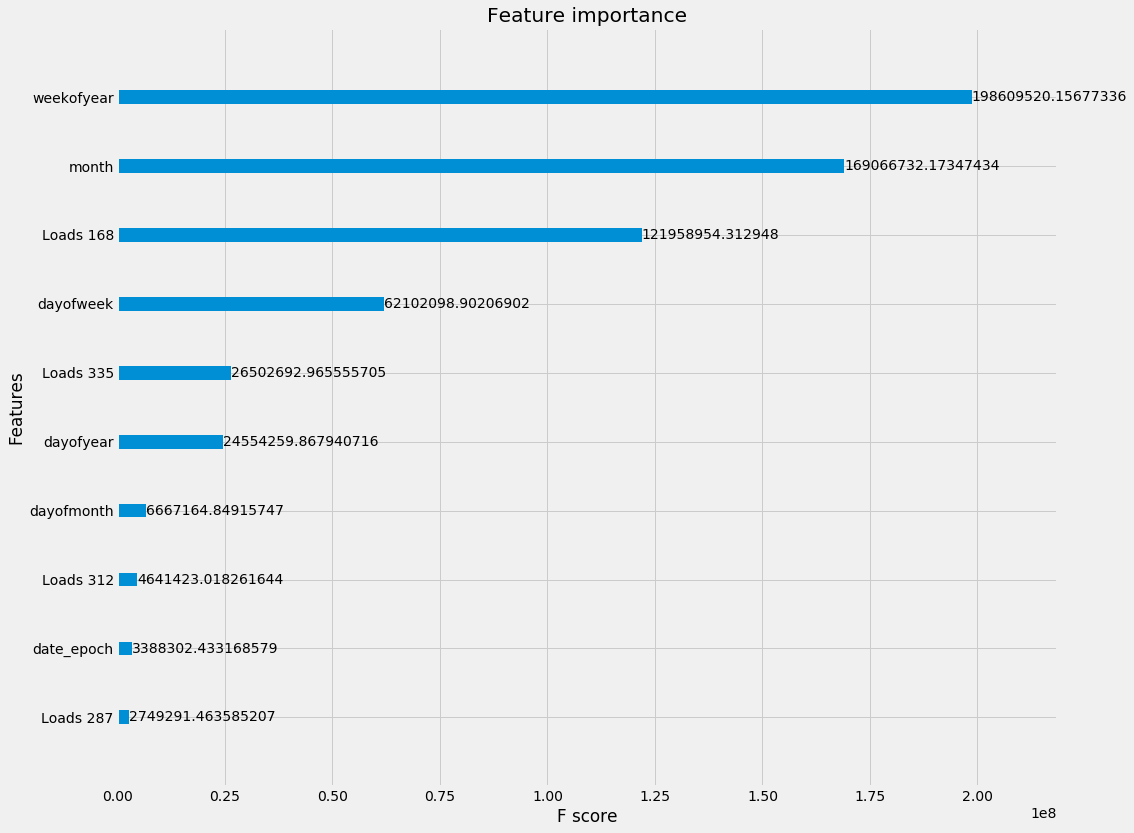

In [124]:
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10, importance_type='gain') # gain is how much each feature contributed to 'improvement' of tree

plt.show()

In [127]:
from sklearn.metrics import mean_absolute_error
print("MAE XGBoost: {:.2f}".format(mean_absolute_error(train_label, XGB_prediction_no_lag['Loads'])))

def MAPE(y_true, y_pred): 
    '''Function to calculate MAPE'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE XGBoost: {:.2f}%".format(MAPE(train['Loads'], XGB_prediction_no_lag['Loads'])))

MAE XGBoost: 0.00
MAPE XGBoost: 0.00%


Text(0.5, 1.0, 'XGBoost - Residual/Errors Distribution')

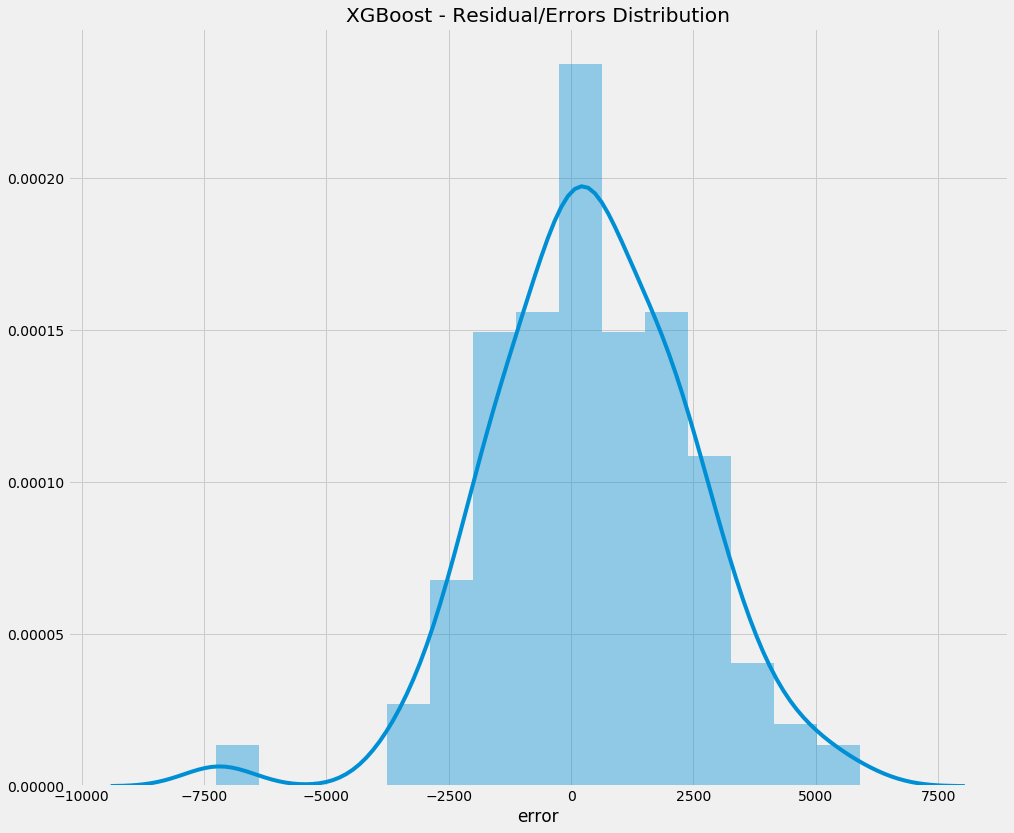

In [74]:
# First construct the residuals - basically the errors
xgboost_errors = XGB_prediction_no_lag.copy()
xgboost_errors['Loads_ACTUAL'] = test.copy()
xgboost_errors['error'] = xgboost_errors['Loads'] - xgboost_errors['Loads_ACTUAL']

# Plot Histogram with Kernel Density Estimation (KDE)
sns.distplot(xgboost_errors['error'], kde=True);

# Plot Labels, Legends etc
plt.title('XGBoost - Residual/Errors Distribution')